In [1]:
from importlib import reload
import os
import glob2
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)
import numpy as np
import sys
#sys.path.pop(0)

In [2]:
import hpfspec
import hpfspecmatch
hpfspecmatch

AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False


<module 'hpfspecmatch' from '/Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspecmatch/__init__.py'>

# Read in SpecMatch master 

In [17]:
#df_master = pd.read_csv('../lib/SPECMATCH_MASTER_with_ids.csv',comment='%')
df_master = pd.read_csv('../lib/SPECMATCH_MASTER_with_ids_using.csv')
df_master

Name  Teff  e_Teff      R*   e_R*  log(g)  e_log(g)  [Fe/H]  \
0       HD_100623  5140      60   0.720  0.040    4.56      0.05   -0.36   
1       HD_101904  5883      60   1.540  0.190    4.10      0.05    0.12   
2       HD_102195  5277      60   0.850  0.050    4.50      0.05    0.10   
3       HD_102444  5227      60   2.670  0.390    3.60      0.05    0.00   
4       HD_102956  4985      60   3.790  0.470    3.38      0.05    0.26   
5       HD_103459  5722      60   1.710  0.210    4.03      0.05    0.24   
6       HD_103890  6120      60   1.430  0.160    4.19      0.05    0.03   
7       HD_104437  5761      60   1.030  0.090    4.40      0.05    0.17   
8       HD_106088  5470      60   2.070  0.260    3.87      0.05    0.34   
9       HD_107181  5628      60   1.640  0.210    4.05      0.05    0.31   
10      HD_108189  5373      60   2.890  0.410    3.56      0.05    0.03   
11      HD_108863  4878      60   5.590  0.660    3.08      0.05    0.20   
12      HD_109159  5151      60   2.570  0.320    3.60      0.05   -0.08   
13      HD_109749  5825      60   1.310  0.150    4.24      0.05    0.24   
14       HD_10995  5688      60   2.870  0.340    3.67      0.05    0.10   
15      HD_110463  4906      60   0.760  0.030    4.55      0.05    0.06   
16      HD_110537  5718      60   1.140  0.110    4.30      0.05    0.08   
17      HD_110743  5198      60   0.840  0.050    4.47      0.05    0.01   
18      HD_110833  4999      60   0.800  0.040    4.51      0.05    0.18   
19      HD_111814  5646      60   1.940  0.240    3.93      0.05    0.22   
20      HD_112415  5574      60   1.230  0.130    4.25      0.05    0.28   
21      HD_112914  4816      60   0.700  0.030    4.51      0.05   -0.26   
22      HD_114659  4838      60   5.450  0.720    3.08      0.05    0.17   
23      HD_116442  5155      60   0.720  0.040    4.54      0.05   -0.38   
24      HD_122253  5007      60   3.780  0.520    3.36      0.05    0.03   
25      HD_122973  5989      60   1.070  0.060    4.46      0.05    0.20   
26      HD_123239  4795      60   5.960  0.890    2.94      0.05   -0.05   
27      HD_124257  5911      60   1.460  0.160    4.15      0.05    0.15   
28      HD_125607  4985      60   3.910  0.510    3.35      0.05    0.10   
29      HD_126583  5482      60   0.880  0.060    4.49      0.05    0.00   
30      HD_128311  4918      60   0.790  0.040    4.49      0.05    0.19   
31      HD_130048  4964      60   6.290  0.710    3.02      0.05    0.28   
32      HD_130307  4985      60   0.740  0.040    4.56      0.05   -0.13   
33      HD_131511  5259      60   0.860  0.060    4.47      0.05    0.13   
34      HD_131582  4728      60   0.670  0.030    4.52      0.05   -0.33   
35      HD_132254  6157      60   1.550  0.190    4.14      0.05    0.16   
36      HD_133125  5506      60   0.860  0.060    4.49      0.05   -0.13   
37     HD_135101A  5677      60   1.280  0.140    4.20      0.05    0.04   
38      HD_135872  4992      60   3.370  0.460    3.44      0.05    0.12   
39      HD_137778  5128      60   0.830  0.050    4.52      0.05    0.27   
40       HD_13871  6416      60   1.940  0.240    4.03      0.05    0.27   
41        HD_1388  5925      60   1.150  0.120    4.32      0.05    0.03   
42       HD_13931  5853      60   1.200  0.120    4.28      0.05    0.05   
43      HD_144872  4781      60   0.690  0.030    4.52      0.05   -0.25   
44       HD_14655  5755      60   1.970  0.230    3.92      0.05    0.12   
45       HD_14787  4946      60   4.450  0.590    3.23      0.05    0.03   
46      HD_148284  5572      60   1.800  0.240    3.97      0.05    0.16   
47       HD_14855  5023      60   3.430  0.480    3.43      0.05    0.03   
48      HD_149750  5802      60   1.450  0.180    4.14      0.05    0.19   
49        HD_1502  4947      60   4.910  0.610    3.18      0.05    0.10   
50      HD_150706  5949      60   1.000  0.050    4.53      0.05    0.02   
51      HD_152581  5027      60   3.710  0.410    3.29      0

In [18]:
#df_master['ID_NAME'] = [hpfspecmatch.filter_simbadnames(i.split('|')) for i in df_master.simbadnames.values]
#df_master.to_csv('../lib/SPECMATCH_MASTER_with_ids_using.csv',index=False)

# Query specmatch ids 

In [19]:
# List of fitsfiles
LIBRARY_DIR = '../library/20201008_specmatch_nir/'

library_fitsfiles = glob2.glob(LIBRARY_DIR+'FITS/*/*.fits')

# Read in all files as a HPFSpecList object
HLS = hpfspec.HPFSpecList(filelist=library_fitsfiles)

Reading from file /Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspec/hpfspec/data/target_files/GJ_3358.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -45.50000km/s
Second iteration: RVabs = -45.36884km/s, sigma=2.97354
RVabs it #1: -45.50000+- 0.00000km/s
RVabs it #2: -45.36884+- 0.00000km/s
berv=9.770838896949163,rv=-45.36884488242152
Reading from file /Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspec/hpfspec/data/target_files/GJ_411.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -84.66667km/s
Second iteration: RVabs = -84.72513km/s, sigma=2.88670
RVabs it #1: -84.66667+- 0.00000km/s
RVabs it #2: -84.72513+- 0.00000km/s
berv=-25.845614422514796,rv=-84.72512874476591
Reading from file /Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspec/hpfspec/data/target_files/GJ_434.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -5.33333k

Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -0.83333km/s
Second iteration: RVabs = -0.64851km/s, sigma=2.93943
RVabs it #1: -0.83333+- 0.00000km/s
RVabs it #2: -0.64851+- 0.00000km/s
berv=25.175974770530825,rv=-0.6485063364418017
Reading from file /Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspec/hpfspec/data/target_files/GJ_361.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 11.33333km/s
Second iteration: RVabs = 11.42983km/s, sigma=2.92728
RVabs it #1: 11.33333+- 0.00000km/s
RVabs it #2: 11.42983+- 0.00000km/s
berv=24.87020071861907,rv=11.429833869730187
Reading from file /Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspec/hpfspec/data/target_files/GJ_649.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 4.50000km/s
Second iteration: RVabs = 4.31880km/s, sigma=2.95639
RVabs it #1:  4.50000+- 0.00000km/s
RVabs it #2:  4.31880+- 

Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 26.00000km/s
Second iteration: RVabs = 26.18685km/s, sigma=2.90934
RVabs it #1: 26.00000+- 0.00000km/s
RVabs it #2: 26.18685+- 0.00000km/s
berv=-1.9760920234041115,rv=26.186852199151126
Reading from file /Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspec/hpfspec/data/target_files/BD+00_444.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 73.50000km/s
Second iteration: RVabs = 73.39585km/s, sigma=3.02821
RVabs it #1: 73.50000+- 0.00000km/s
RVabs it #2: 73.39585+- 0.00000km/s
berv=-8.15076585903598,rv=73.3958500957068
Reading from file /Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspec/hpfspec/data/target_files/GJ_382.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 8.00000km/s
Second iteration: RVabs = 7.90709km/s, sigma=2.97982
RVabs it #1:  8.00000+- 0.00000km/s
RVabs it #2:  7.90709+-

Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -35.83333km/s
Second iteration: RVabs = -35.76465km/s, sigma=2.96903
RVabs it #1: -35.83333+- 0.00000km/s
RVabs it #2: -35.76465+- 0.00000km/s
berv=-2.9559856300289846,rv=-35.764648421930566
Reading from file /Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspec/hpfspec/data/target_files/HD_173701.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -45.00000km/s
Second iteration: RVabs = -44.81863km/s, sigma=2.97589
RVabs it #1: -45.00000+- 0.00000km/s
RVabs it #2: -44.81863+- 0.00000km/s
berv=2.234234006399163,rv=-44.81863230043085
Reading from file /Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspec/hpfspec/data/target_files/GJ_250_B.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -7.50000km/s
Second iteration: RVabs = -7.27487km/s, sigma=2.93454
RVabs it #1: -7.50000+- 0.00000km/s
RVabs it

Reading from file /Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspec/hpfspec/data/target_files/GJ_4333.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -6.50000km/s
Second iteration: RVabs = -6.55386km/s, sigma=2.80496
RVabs it #1: -6.50000+- 0.00000km/s
RVabs it #2: -6.55386+- 0.00000km/s
berv=-28.53878933932639,rv=-6.5538553414741125
Reading from file /Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspec/hpfspec/data/target_files/GJ_15_A.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 11.83333km/s
Second iteration: RVabs = 11.80778km/s, sigma=2.89263
RVabs it #1: 11.83333+- 0.00000km/s
RVabs it #2: 11.80778+- 0.00000km/s
berv=15.309516512942762,rv=11.807779378475908
Reading from file /Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspec/hpfspec/data/target_files/GJ_96.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -37.83333km/s
Se

In [20]:
df_files = HLS.df
df_files['basenames'] = [i.split(os.sep)[-1] for i in df_files.filename.values]
df_files

OBJECT_ID                                           filename  \
0            GJ_3358  ../library/20201008_specmatch_nir/FITS/125_370...   
1             GJ_411  ../library/20201008_specmatch_nir/FITS/390_957...   
2             GJ_434  ../library/20201008_specmatch_nir/FITS/309_101...   
3         GJ_649.1_C  ../library/20201008_specmatch_nir/FITS/54_1535...   
4            HD_4628  ../library/20201008_specmatch_nir/FITS/378_462...   
5               GJ_5  ../library/20201008_specmatch_nir/FITS/334_166...   
6           GJ_105_B  ../library/20201008_specmatch_nir/FITS/264_GL1...   
7   LSPM_J2331+1956N  ../library/20201008_specmatch_nir/FITS/281_GL8...   
8             GJ_172  ../library/20201008_specmatch_nir/FITS/259_232...   
9            GJ_4183  ../library/20201008_specmatch_nir/FITS/82_2019...   
10          HD_85488  ../library/20201008_specmatch_nir/FITS/246_HIP...   
11           GJ_3494  ../library/20201008_specmatch_nir/FITS/243_HIP...   
12            GJ_686  ../library/20201008_specmatch_nir/FITS/274_GL6...   
13  LSPM_J0255+2652E  ../library/20201008_specmatch_nir/FITS/70_1814...   
14           GJ_3743  ../library/20201008_specmatch_nir/FITS/15_1104...   
15            GJ_273  ../library/20201008_specmatch_nir/FITS/269_GL2...   
16            GJ_694  ../library/20201008_specmatch_nir/FITS/275_GL6...   
17        NLTT_57303  ../library/20201008_specmatch_nir/FITS/99_2218...   
18       KIC_9955598  ../library/20201008_specmatch_nir/FITS/177_CK0...   
19            GJ_205  ../library/20201008_specmatch_nir/FITS/374_363...   
20        BD+29_2279  ../library/20201008_specmatch_nir/FITS/303_HIP...   
21            GJ_361  ../library/20201008_specmatch_nir/FITS/297_HIP...   
22            GJ_649  ../library/20201008_specmatch_nir/FITS/403_HIP...   
23            GJ_134  ../library/20201008_specmatch_nir/FITS/288_HIP...   
24          GJ_338_A  ../library/20201008_specmatch_nir/FITS/385_792...   
25            GJ_880  ../library/20201008_specmatch_nir/FITS/362_216...   
26         HD_260655  ../library/20201008_specmatch_nir/FITS/267_GL2...   
27          GJ_458.2  ../library/20201008_specmatch_nir/FITS/302_HIP...   
28          GJ_745_A  ../library/20201008_specmatch_nir/FITS/276_GL7...   
29          HD_35112  ../library/20201008_specmatch_nir/FITS/123_351...   
30          GJ_725_A  ../library/20201008_specmatch_nir/FITS/340_173...   
31           GJ_2066  ../library/20201008_specmatch_nir/FITS/266_GL2...   
32      V*_V2689_Ori  ../library/20201008_specmatch_nir/FITS/260_245...   
33           GJ_15_B  ../library/20201008_specmatch_nir/FITS/254_132...   
34            GJ_173  ../library/20201008_specmatch_nir/FITS/290_HIP...   
35          HD_24238  ../library/20201008_specmatch_nir/FITS/107_242...   
36            GJ_846  ../library/20201008_specmatch_nir/FITS/258_209...   
37           GJ_9066  ../library/20201008_specmatch_nir/FITS/278_GL8...   
38            GJ_840  ../library/20201008_specmatch_nir/FITS/89_2083...   
39           GJ_1148  ../library/20201008_specmatch_nir/FITS/300_HIP...   
40            GJ_176  ../library/20201008_specmatch_nir/FITS/391_GJ1...   
41         BD+00_444  ../library/20201008_specmatch_nir/FITS/236_HIP...   
42            GJ_382  ../library/20201008_specmatch_nir/FITS/270_GL3...   
43            GJ_109  ../library/20201008_specmatch_nir/FITS/265_GL1...   
44            GJ_436  ../library/20201008_specmatch_nir/FITS/401_HIP...   
45       *_111_Tau_B  ../library/20201008_specmatch_nir/FITS/240_HIP...   
46        NLTT_21526  ../library/20201008_specmatch_nir/FITS/244_HIP...   
47          HD_53927  ../library/20201008_specmatch_nir/FITS/144_539...   
48          HD_28343  ../library/20201008_specmatch_nir/FITS/262_283...   
49             GJ_70  ../library/20201008_specmatch_nir/FITS/307_HIP...   
50            GJ_849  ../library/20201008_specmatch_nir/FITS/284_HIP...   
51        NLTT_28458  ../library/20201008_specmatch_nir/FITS/2_10219...   
52             GJ_87  ../library/202

In [21]:
# Query simbad object_names
for i in range(len(df_files)):
    names = hpfspecmatch.get_simbad_object_names(df_files.loc[i,'OBJECT_ID'],as_str=True)
    df_files.loc[i,'simbadnames'] = names
    df_files.loc[i,'ID_NAME'] = hpfspecmatch.filter_simbadnames(names.split('|'))
    print(i,names[0:20],df_files.loc[i,'ID_NAME'])
df_files

# Merge
df_comb = pd.merge(df_master,df_files,on='ID_NAME',)
df_comb

0 2MASS_J05381191+5126 Gaia_DR2_215395053733297024
1 Karmn_J11033+359|PLX HD__95735
2 [ZEH2003]_RX_J1141.0 Gaia_DR2_4025850731201819392
3 PLX_3858.0|SPOCS_294 Gaia_DR2_1408029436569383296
4 PLX__156|LSPM_J0048+ Gaia_DR2_2552925644460225152
5 2MASS_J00063674+2901 Gaia_DR2_2860924621205256704
6 Karmn_J02362+068|LSP Gaia_DR2_18565464288396416
7 V*_EQ_Peg_A|Karmn_J2 Gaia_DR2_2824770686019003904
8 Karmn_J04376+528|2MA Gaia_DR2_272855565762295680
9 [SMM2006]_SPG_410|Cl Gaia_DR2_2164004914017788032
10 PLX_2336.1|LSPM_J095 Gaia_DR2_3847128380281953664
11 PLX_1982|LSPM_J0820+ Gaia_DR2_652005932802958976
12 Karmn_J17378+185|PLX Gaia_DR2_4550763526539955712
13 Gaia_DR1_11603740631 Gaia_DR1_116037406313944960
14 SPOCS_2843|V*_NP_UMa Gaia_DR2_1571411233756165248
15 Karmn_J07274+052|Gai Gaia_DR2_3139847906304421632
16 PLX_4053|LSPM_J1743+ Gaia_DR2_1349047857580994560
17 [SMM2006]_SPG_171|SP Gaia_DR2_2647148976301673472
18 KIC_9955598|SPOCS_30 Gaia_DR2_2128215909315876352
19 Karmn_J05314-036|PM_ Gaia

Name  Teff  e_Teff     R*   e_R*  log(g)  e_log(g)  [Fe/H]  \
0     HD_102195  5277      60  0.850  0.050    4.50      0.05    0.10   
1     HD_110463  4906      60  0.760  0.030    4.55      0.05    0.06   
2     HD_110743  5198      60  0.840  0.050    4.47      0.05    0.01   
3     HD_110833  4999      60  0.800  0.040    4.51      0.05    0.18   
4     HD_112914  4816      60  0.700  0.030    4.51      0.05   -0.26   
5     HD_153525  4826      60  0.740  0.030    4.54      0.05    0.03   
6     HD_155456  5225      60  0.910  0.070    4.43      0.05    0.26   
7     HD_155712  4911      60  0.750  0.040    4.52      0.05   -0.07   
8     HD_164922  5341      60  0.950  0.080    4.39      0.05    0.15   
9      HD_18143  5101      60  0.880  0.060    4.43      0.05    0.27   
10    HD_196124  4833      60  0.740  0.030    4.50      0.05   -0.06   
11    HD_201924  5401      60  0.890  0.070    4.47      0.05    0.05   
12    HD_208313  5016      60  0.780  0.040    4.51      0.05    0.02   
13    HD_221822  5420      60  0.760  0.040    4.57      0.05   -0.37   
14     HD_24238  4951      60  0.670  0.030    4.54      0.05   -0.45   
15     HD_35112  4895      60  0.760  0.040    4.46      0.05   -0.08   
16     HD_37008  4980      60  0.690  0.030    4.53      0.05   -0.42   
17     HD_53927  4899      60  0.700  0.030    4.56      0.05   -0.29   
18     HD_61606  4918      60  0.770  0.030    4.53      0.05    0.09   
19     HD_72760  5293      60  0.840  0.050    4.52      0.05    0.09   
20     HD_87883  4942      60  0.780  0.040    4.50      0.05    0.13   
21     HD_96612  4862      60  0.730  0.030    4.53      0.05   -0.11   
22     KOI-1925  5410      60  0.900  0.050    4.48      0.03    0.11   
23  KIC_7970740  5290      60  0.720  0.030    4.58      0.03   -0.49   
24    HIP_12493  4276     193  0.662  0.047    4.68      0.04   -0.29   
25    HIP_25220  4505     179  0.702  0.042    4.63      0.04    0.05   
26    HIP_36551  4395     193  0.669  0.046    4.66      0.04   -0.30   
27    HIP_40910  4159     228  0.633  0.053    4.67      0.05   -0.06   
28    HIP_45839  4426     198  0.714  0.050    4.63      0.04    0.05   
29    HIP_47201  4207     212  0.696  0.054    4.66      0.05    0.03   
30    HIP_48411  4357     199  0.742  0.072    4.63      0.04    0.20   
31    HIP_54810  4395     185  0.681  0.044    4.64      0.04    0.03   
32     HD_1326B  3218      60  0.192  0.008    5.07      0.05   -0.30   
33    HD_180617  3558      60  0.474  0.016    4.76      0.05    0.10   
34    HD_209290  3848      60  0.546  0.019    4.74      0.05    0.02   
35    HD_232979  3929      60  0.608  0.020    4.68      0.05   -0.11   
36    HD_245409  3966      60  0.601  0.020    4.69      0.05    0.05   
37    HD_265866  3448      60  0.358  0.013    4.88      0.05   -0.02   
38     HD_28343  4124      62  0.687  0.023    4.64      0.05    0.39   
39      GL_105B  3284      60  0.278  0.010    4.94      0.05   -0.12   
40       GL_109  3405      60  0.364  0.014    4.85      0.05   -0.10   
41      GL_2066  3500      60  0.461  0.017    4.77      0.05   -0.12   
42       GL_239  3801      60  0.423  0.015    4.86      0.05   -0.34   
43      GL_250B  3481      60  0.460  0.017    4.76      0.05    0.14   
44       GL_273  3317      60  0.315  0.012    4.89      0.05   -0.11   
45       GL_382  3623      60  0.522  0.019    4.72      0.05    0.13   
46       GL_393  3548      60  0.420  0.016    4.82      0.05   -0.18   
47       GL_686  3657      60  0.424  0.015    4.83      0.05   -0.25   
48       GL_694  3464      61  0.440  0.017    4.79      0.05    0.00   
49      GL_745A  3500      60  0.310  0.012    4.93      0.05   -0.33   
50       GL_806  3542      61  0.443  0.018    4.78      0.05   -0.15   
51      GL_83.1  3080      60  0.187  0.010    5.05      0.05   -0.16   
52        GL_87  3638      62  0.443  0.017    4.79      0.05   -0.36   
53      GL_896A  3353      60  0.409  0.016    4.79      0.05    0.03

In [26]:
len(df_files), len(df_comb)

(88, 88)

In [23]:
df_comb.to_csv('../library/20201008_specmatch_nir/20201008_specmatch_nir.csv',index=False)

In [25]:
df_comb

Name  Teff  e_Teff     R*   e_R*  log(g)  e_log(g)  [Fe/H]  \
0     HD_102195  5277      60  0.850  0.050    4.50      0.05    0.10   
1     HD_110463  4906      60  0.760  0.030    4.55      0.05    0.06   
2     HD_110743  5198      60  0.840  0.050    4.47      0.05    0.01   
3     HD_110833  4999      60  0.800  0.040    4.51      0.05    0.18   
4     HD_112914  4816      60  0.700  0.030    4.51      0.05   -0.26   
5     HD_153525  4826      60  0.740  0.030    4.54      0.05    0.03   
6     HD_155456  5225      60  0.910  0.070    4.43      0.05    0.26   
7     HD_155712  4911      60  0.750  0.040    4.52      0.05   -0.07   
8     HD_164922  5341      60  0.950  0.080    4.39      0.05    0.15   
9      HD_18143  5101      60  0.880  0.060    4.43      0.05    0.27   
10    HD_196124  4833      60  0.740  0.030    4.50      0.05   -0.06   
11    HD_201924  5401      60  0.890  0.070    4.47      0.05    0.05   
12    HD_208313  5016      60  0.780  0.040    4.51      0.05    0.02   
13    HD_221822  5420      60  0.760  0.040    4.57      0.05   -0.37   
14     HD_24238  4951      60  0.670  0.030    4.54      0.05   -0.45   
15     HD_35112  4895      60  0.760  0.040    4.46      0.05   -0.08   
16     HD_37008  4980      60  0.690  0.030    4.53      0.05   -0.42   
17     HD_53927  4899      60  0.700  0.030    4.56      0.05   -0.29   
18     HD_61606  4918      60  0.770  0.030    4.53      0.05    0.09   
19     HD_72760  5293      60  0.840  0.050    4.52      0.05    0.09   
20     HD_87883  4942      60  0.780  0.040    4.50      0.05    0.13   
21     HD_96612  4862      60  0.730  0.030    4.53      0.05   -0.11   
22     KOI-1925  5410      60  0.900  0.050    4.48      0.03    0.11   
23  KIC_7970740  5290      60  0.720  0.030    4.58      0.03   -0.49   
24    HIP_12493  4276     193  0.662  0.047    4.68      0.04   -0.29   
25    HIP_25220  4505     179  0.702  0.042    4.63      0.04    0.05   
26    HIP_36551  4395     193  0.669  0.046    4.66      0.04   -0.30   
27    HIP_40910  4159     228  0.633  0.053    4.67      0.05   -0.06   
28    HIP_45839  4426     198  0.714  0.050    4.63      0.04    0.05   
29    HIP_47201  4207     212  0.696  0.054    4.66      0.05    0.03   
30    HIP_48411  4357     199  0.742  0.072    4.63      0.04    0.20   
31    HIP_54810  4395     185  0.681  0.044    4.64      0.04    0.03   
32     HD_1326B  3218      60  0.192  0.008    5.07      0.05   -0.30   
33    HD_180617  3558      60  0.474  0.016    4.76      0.05    0.10   
34    HD_209290  3848      60  0.546  0.019    4.74      0.05    0.02   
35    HD_232979  3929      60  0.608  0.020    4.68      0.05   -0.11   
36    HD_245409  3966      60  0.601  0.020    4.69      0.05    0.05   
37    HD_265866  3448      60  0.358  0.013    4.88      0.05   -0.02   
38     HD_28343  4124      62  0.687  0.023    4.64      0.05    0.39   
39      GL_105B  3284      60  0.278  0.010    4.94      0.05   -0.12   
40       GL_109  3405      60  0.364  0.014    4.85      0.05   -0.10   
41      GL_2066  3500      60  0.461  0.017    4.77      0.05   -0.12   
42       GL_239  3801      60  0.423  0.015    4.86      0.05   -0.34   
43      GL_250B  3481      60  0.460  0.017    4.76      0.05    0.14   
44       GL_273  3317      60  0.315  0.012    4.89      0.05   -0.11   
45       GL_382  3623      60  0.522  0.019    4.72      0.05    0.13   
46       GL_393  3548      60  0.420  0.016    4.82      0.05   -0.18   
47       GL_686  3657      60  0.424  0.015    4.83      0.05   -0.25   
48       GL_694  3464      61  0.440  0.017    4.79      0.05    0.00   
49      GL_745A  3500      60  0.310  0.012    4.93      0.05   -0.33   
50       GL_806  3542      61  0.443  0.018    4.78      0.05   -0.15   
51      GL_83.1  3080      60  0.187  0.010    5.05      0.05   -0.16   
52        GL_87  3638      62  0.443  0.017    4.79      0.05   -0.36   
53      GL_896A  3353      60  0.409  0.016    4.79      0.05    0.03

# Cross validation 

0
##################
Saving results to ../library/20201008_specmatch_nir/crossval/o17_crossval/
##################
../library/20201008_specmatch_nir/crossval/o17_crossval/ already exists.
##################
Running Chi2 loop
##################
Performing first Chebfit
Found centers: [ 8.06448835e+06 -2.30835525e+03  7.35668036e-02  3.48047532e-06
 -2.49573329e-10  3.96858791e-15]
With CHI 5.759431724354225
7 6
Optimization terminated successfully.
         Current function value: 4.968367
         Iterations: 477
         Function evaluations: 936
0 GJ_3358 GJ_411 4.968366675325499
Performing first Chebfit
Found centers: [-1.00505416e+07  2.87269024e+03 -9.13380533e-02 -4.33060224e-06
  3.09804588e-10 -4.91925332e-15]
With CHI 1.1031602468863786
7 6
Optimization terminated successfully.
         Current function value: 1.091116
         Iterations: 465
         Function evaluations: 899
1 GJ_3358 GJ_434 1.0911164275540406
Performing first Chebfit
Found centers: [-8.23061090e+06  2.3482

Optimization terminated successfully.
         Current function value: 3.901827
         Iterations: 574
         Function evaluations: 1067
23 GJ_3358 GJ_338_A 3.901827026279295
Performing first Chebfit
Found centers: [ 1.36180149e+07 -3.89345200e+03  1.23850363e-01  5.86960141e-06
 -4.20097359e-10  6.67246729e-15]
With CHI 7.336383882758181
7 6
Optimization terminated successfully.
         Current function value: 5.389195
         Iterations: 610
         Function evaluations: 1113
24 GJ_3358 GJ_880 5.389195060368516
Performing first Chebfit
Found centers: [ 3.50489296e+06 -1.00524397e+03  3.21403950e-02  1.51605627e-06
 -1.09062370e-10  1.73766196e-15]
With CHI 4.3419454226605
7 6
Optimization terminated successfully.
         Current function value: 3.943178
         Iterations: 388
         Function evaluations: 758
25 GJ_3358 HD_260655 3.9431778366744954
Performing first Chebfit
Found centers: [-7.43362483e+06  2.11423466e+03 -6.66840851e-02 -3.18525501e-06
  2.26042092e-10 -3.5

Optimization terminated successfully.
         Current function value: 4.996555
         Iterations: 603
         Function evaluations: 1110
47 GJ_3358 HD_28343 4.996554937794334
Performing first Chebfit
Found centers: [ 9.28205595e+06 -2.65597586e+03  8.45991399e-02  4.00444773e-06
 -2.86987501e-10  4.56198029e-15]
With CHI 8.531938170774445
7 6
Optimization terminated successfully.
         Current function value: 5.952192
         Iterations: 701
         Function evaluations: 1290
48 GJ_3358 GJ_70 5.952192304494718
Performing first Chebfit
Found centers: [ 2.00913591e+06 -5.81004477e+02  1.88201566e-02  8.77133825e-07
 -6.39255629e-11  1.02649426e-15]
With CHI 10.112820181862489
7 6
Optimization terminated successfully.
         Current function value: 6.263298
         Iterations: 806
         Function evaluations: 1423
49 GJ_3358 GJ_849 6.263298382122187
Performing first Chebfit
Found centers: [ 1.61754724e+06 -4.60005910e+02  1.45062282e-02  6.93026227e-07
 -4.91715854e-11  7.76

Optimization terminated successfully.
         Current function value: 4.840694
         Iterations: 637
         Function evaluations: 1176
71 GJ_3358 GJ_809 4.840694031996032
Performing first Chebfit
Found centers: [-8.69357989e+06  2.48362891e+03 -7.89059637e-02 -3.74385632e-06
  2.67621396e-10 -4.24743139e-15]
With CHI 0.9662235567768523
7 6
Optimization terminated successfully.
         Current function value: 0.851089
         Iterations: 499
         Function evaluations: 944
72 GJ_3358 NLTT_31697 0.8510886663476921
Performing first Chebfit
Found centers: [ 4.83175857e+06 -1.38596210e+03  4.43207815e-02  2.09026943e-06
 -1.50395766e-10  2.39645349e-15]
With CHI 10.842950789645247
7 6
Optimization terminated successfully.
         Current function value: 6.612157
         Iterations: 511
         Function evaluations: 949
73 GJ_3358 GJ_251 6.612156837313338
Performing first Chebfit
Found centers: [ 1.60679543e+06 -4.66199002e+02  1.51797248e-02  7.04101513e-07
 -5.15801878e-11  8

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.647809    -0.147809
1     c2      0.5    0.0    1.0  0.350145     0.149855
2     c3      0.5    0.0    1.0  0.001601     0.498399
3     c4      0.5    0.0    1.0  0.000246     0.499754
LogLn value: -42221.538345545094
Log priors 0.0
[6.47809165e-01 3.50144650e-01 1.60079464e-03 2.45645000e-04]
Weights [0.6478091647224313, 0.35014464994984007, 0.0016007946403260869, 0.0002456449998833231, 0.00019974568751912614]
Teffs [4950 4899 4816 4862 4911]
Stellar parameters:
Teff [K]: 4931.898709528951
Fe/H [dex]: -0.2445171744789868
logg [dex]: 4.605251242621056
vsini [km/s]: 2.693552499570838
Weights [0.6478091647224313, 0.35014464994984007, 0.0016007946403260869, 0.0002456449998833231, 0.00019974568751912614]
Teffs [4950 4899 4816 4862 4911]
Stellar parameters:
Teff [K]: 4931.898709528951
Fe/H [dex]: -0.2445171744789868
logg [dex]: 4.605251242621056
vsini [km/s]: 2.69

Optimization terminated successfully.
         Current function value: 2.278813
         Iterations: 591
         Function evaluations: 1097
19 GJ_411 BD+29_2279 2.278813463775982
Performing first Chebfit
Found centers: [-3.10825226e+06  8.86704531e+02 -2.81056984e-02 -1.33638315e-06
  9.53084216e-11 -1.51051809e-15]
With CHI 0.925403121830152
7 6
Optimization terminated successfully.
         Current function value: 0.730378
         Iterations: 514
         Function evaluations: 973
20 GJ_411 GJ_361 0.7303778674144774
Performing first Chebfit
Found centers: [-1.03673278e+07  2.95863035e+03 -9.38345005e-02 -4.45928053e-06
  3.18211943e-10 -5.04501357e-15]
With CHI 0.7864962052738355
7 6
Optimization terminated successfully.
         Current function value: 0.691480
         Iterations: 508
         Function evaluations: 970
21 GJ_411 GJ_649 0.6914802999500648
Performing first Chebfit
Found centers: [-4.88266640e+06  1.39398912e+03 -4.42406140e-02 -2.10114302e-06
  1.50036714e-10 -2.37

Optimization terminated successfully.
         Current function value: 0.972889
         Iterations: 468
         Function evaluations: 901
43 GJ_411 GJ_436 0.9728885698097165
Performing first Chebfit
Found centers: [-1.48438623e+07  4.23962578e+03 -1.34641330e-01 -6.39066438e-06
  4.56643212e-10 -7.24567637e-15]
With CHI 4.715671194505376
7 6
Optimization terminated successfully.
         Current function value: 4.372718
         Iterations: 591
         Function evaluations: 1073
44 GJ_411 *_111_Tau_B 4.372717622850443
Performing first Chebfit
Found centers: [-1.66688545e+07  4.75933353e+03 -1.51066904e-01 -7.17376683e-06
  5.12330568e-10 -8.12665873e-15]
With CHI 5.172530116302614
7 6
Optimization terminated successfully.
         Current function value: 4.377572
         Iterations: 516
         Function evaluations: 1006
45 GJ_411 NLTT_21526 4.3775724614145215
Performing first Chebfit
Found centers: [-1.39431253e+07  3.98495366e+03 -1.26686864e-01 -6.00726759e-06
  4.29699977e-10 

Optimization terminated successfully.
         Current function value: 8.122540
         Iterations: 522
         Function evaluations: 1006
67 GJ_411 GJ_27 8.122539589013027
Performing first Chebfit
Found centers: [-3.33238627e+06  9.47078779e+02 -2.98346283e-02 -1.42672071e-06
  1.01121426e-10 -1.59646989e-15]
With CHI 4.413454651492755
7 6
Optimization terminated successfully.
         Current function value: 3.565769
         Iterations: 423
         Function evaluations: 798
68 GJ_411 GJ_699 3.565768844266751
Performing first Chebfit
Found centers: [-1.70692644e+07  4.87400820e+03 -1.54724868e-01 -7.34668044e-06
  5.24741118e-10 -8.32411946e-15]
With CHI 3.4555358928766498
7 6
Optimization terminated successfully.
         Current function value: 3.207266
         Iterations: 473
         Function evaluations: 952
69 GJ_411 HD_59582 3.2072656402362485
Performing first Chebfit
Found centers: [ 3.97980744e+06 -1.13411096e+03  3.58834603e-02  1.70904480e-06
 -1.21664813e-10  1.926040

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper            pv  center_dist
0     c1      0.5    0.0    1.0  2.545411e-01     0.245459
1     c2      0.5    0.0    1.0  2.859632e-01     0.214037
2     c3      0.5    0.0    1.0  1.306315e-10     0.500000
3     c4      0.5    0.0    1.0  9.808925e-02     0.401911
LogLn value: -36337.71739334181
Log priors 0.0
[2.54541135e-01 2.85963232e-01 1.30631526e-10 9.80892468e-02]
Weights [0.2545411352474434, 0.2859632318799524, 1.3063152586308032e-10, 0.09808924681318493, 0.36140638592878793]
Teffs [3657 3567 3801 3497 3638]
Stellar parameters:
Teff [K]: 3608.7023083268596
Fe/H [dex]: -0.335924044992696
logg [dex]: 4.830905843714493
vsini [km/s]: 1.6751227369927135
Weights [0.2545411352474434, 0.2859632318799524, 1.3063152586308032e-10, 0.09808924681318493, 0.36140638592878793]
Teffs [3657 3567 3801 3497 3638]
Stellar parameters:
Teff [K]: 3608.7023083268596
Fe/H [dex]: -0.335924044992696
logg [dex]: 4.830905843714493
vsini [k

Optimization terminated successfully.
         Current function value: 6.732163
         Iterations: 701
         Function evaluations: 1269
19 GJ_434 BD+29_2279 6.73216307043687
Performing first Chebfit
Found centers: [ 1.50067776e+07 -4.29434096e+03  1.36799159e-01  6.47469440e-06
 -4.64069495e-10  7.37732314e-15]
With CHI 11.398062944875166
7 6
Optimization terminated successfully.
         Current function value: 7.236953
         Iterations: 703
         Function evaluations: 1268
20 GJ_434 GJ_361 7.236953179111521
Performing first Chebfit
Found centers: [ 7.74770207e+06 -2.22241514e+03  7.10703564e-02  3.35179703e-06
 -2.41165974e-10  3.84282766e-15]
With CHI 10.022187642087008
7 6
Optimization terminated successfully.
         Current function value: 6.733282
         Iterations: 553
         Function evaluations: 1017
21 GJ_434 GJ_649 6.733281736117795
Performing first Chebfit
Found centers: [ 1.32323635e+07 -3.78705637e+03  1.20664243e-01  5.70993454e-06
 -4.09341203e-10  6.50

Optimization terminated successfully.
         Current function value: 7.862232
         Iterations: 809
         Function evaluations: 1452
43 GJ_434 GJ_436 7.862232234214875
Performing first Chebfit
Found centers: [ 3.27116759e+06 -9.41419707e+02  3.02635265e-02  1.42041318e-06
 -1.02734705e-10  1.64216486e-15]
With CHI 4.374490021923004
7 6
Optimization terminated successfully.
         Current function value: 3.571393
         Iterations: 570
         Function evaluations: 1062
44 GJ_434 *_111_Tau_B 3.5713928266288475
Performing first Chebfit
Found centers: [ 1.44617540e+06 -4.21711959e+02  1.38379527e-02  6.37310725e-07
 -4.70473494e-11  7.61182498e-16]
With CHI 5.748856917556547
7 6
Optimization terminated successfully.
         Current function value: 4.142063
         Iterations: 565
         Function evaluations: 1063
45 GJ_434 NLTT_21526 4.14206306882721
Performing first Chebfit
Found centers: [ 4.17190458e+06 -1.19609184e+03  3.82179934e-02  1.80380997e-06
 -1.29677940e-10  

Optimization terminated successfully.
         Current function value: 1.017816
         Iterations: 472
         Function evaluations: 915
67 GJ_434 GJ_27 1.0178157456281778
Performing first Chebfit
Found centers: [ 1.47826436e+07 -4.23396671e+03  1.35070229e-01  6.38435685e-06
 -4.58256491e-10  7.29137134e-15]
With CHI 21.285029487785227
7 6
Optimization terminated successfully.
         Current function value: 11.931154
         Iterations: 837
         Function evaluations: 1501
68 GJ_434 GJ_699 11.931153789083888
Performing first Chebfit
Found centers: [ 1.04576554e+06 -3.07037293e+02  1.01799886e-02  4.64397115e-07
 -3.46367985e-11  5.63721768e-16]
With CHI 4.035540047534312
7 6
Optimization terminated successfully.
         Current function value: 3.304483
         Iterations: 510
         Function evaluations: 959
69 GJ_434 HD_59582 3.304483192014065
Performing first Chebfit
Found centers: [ 2.20948374e+07 -6.31515645e+03  2.00788317e-01  9.52012236e-06
 -6.81042730e-10  1.0813

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper            pv  center_dist
0     c1      0.5    0.0    1.0  4.046490e-01     0.095351
1     c2      0.5    0.0    1.0  1.354434e-01     0.364557
2     c3      0.5    0.0    1.0  1.217206e-01     0.378279
3     c4      0.5    0.0    1.0  9.865612e-09     0.500000
LogLn value: -41955.28136285873
Log priors 0.0
[4.04648957e-01 1.35443381e-01 1.21720571e-01 9.86561168e-09]
Weights [0.40464895651889254, 0.13544338090691316, 0.12172057095056056, 9.865611684678684e-09, 0.33818708175802203]
Teffs [5327 5401 5410 5277 5420]
Stellar parameters:
Teff [K]: 5378.577015686224
Fe/H [dex]: -0.07259587089248826
logg [dex]: 4.496942935050899
vsini [km/s]: 2.0570412801457896
Weights [0.40464895651889254, 0.13544338090691316, 0.12172057095056056, 9.865611684678684e-09, 0.33818708175802203]
Teffs [5327 5401 5410 5277 5420]
Stellar parameters:
Teff [K]: 5378.577015686224
Fe/H [dex]: -0.07259587089248826
logg [dex]: 4.496942935050899
vsin

Optimization terminated successfully.
         Current function value: 3.586485
         Iterations: 516
         Function evaluations: 996
19 GJ_649.1_C BD+29_2279 3.586485221479342
Performing first Chebfit
Found centers: [ 1.31868470e+07 -3.76990899e+03  1.19906543e-01  5.68330317e-06
 -4.06716331e-10  6.45947292e-15]
With CHI 6.321093061187504
7 6
Optimization terminated successfully.
         Current function value: 5.460418
         Iterations: 509
         Function evaluations: 966
20 GJ_649.1_C GJ_361 5.460418156738778
Performing first Chebfit
Found centers: [ 5.92777141e+06 -1.69798317e+03  5.41777405e-02  2.56040579e-06
 -1.83812810e-10  2.92497743e-15]
With CHI 4.9129353810074035
7 6
Optimization terminated successfully.
         Current function value: 4.411163
         Iterations: 508
         Function evaluations: 968
21 GJ_649.1_C GJ_649 4.411163017129988
Performing first Chebfit
Found centers: [ 1.14124328e+07 -3.26262440e+03  1.03771627e-01  4.91854330e-06
 -3.51988039e

Optimization terminated successfully.
         Current function value: 6.658791
         Iterations: 504
         Function evaluations: 964
43 GJ_649.1_C GJ_436 6.658790620955958
Performing first Chebfit
Found centers: [ 1.45123693e+06 -4.16987733e+02  1.33709106e-02  6.29021941e-07
 -4.53815403e-11  7.24314637e-16]
With CHI 0.46432921951471595
7 6
Optimization terminated successfully.
         Current function value: 0.422299
         Iterations: 399
         Function evaluations: 745
44 GJ_649.1_C *_111_Tau_B 0.42229882889769044
Performing first Chebfit
Found centers: [-3.73755263e+05  1.02720014e+02 -3.05466326e-03 -1.54080515e-07
  1.03058149e-11 -1.56667726e-16]
With CHI 0.9975540600005415
7 6
Optimization terminated successfully.
         Current function value: 0.686678
         Iterations: 564
         Function evaluations: 1031
45 GJ_649.1_C NLTT_21526 0.6866784682719527
Performing first Chebfit
Found centers: [ 2.35197392e+06 -6.71659862e+02  2.13253774e-02  1.01241873e-06
 -

Optimization terminated successfully.
         Current function value: 0.971056
         Iterations: 554
         Function evaluations: 1035
67 GJ_649.1_C GJ_27 0.9710562378920039
Performing first Chebfit
Found centers: [ 1.29627130e+07 -3.70953474e+03  1.18177613e-01  5.59296561e-06
 -4.00903327e-10  6.37352111e-15]
With CHI 16.33808533214047
7 6
Optimization terminated successfully.
         Current function value: 11.478910
         Iterations: 685
         Function evaluations: 1243
68 GJ_649.1_C GJ_699 11.478910289145812
Performing first Chebfit
Found centers: [-7.74165122e+05  2.17394681e+02 -6.71262729e-03 -3.26994125e-07
  2.27163658e-11 -3.54128456e-16]
With CHI 0.7693426886956853
7 6
Optimization terminated successfully.
         Current function value: 0.677820
         Iterations: 449
         Function evaluations: 852
69 GJ_649.1_C HD_59582 0.6778199896212277
Performing first Chebfit
Found centers: [ 2.02749067e+07 -5.79072448e+03  1.83895701e-01  8.72873112e-06
 -6.236895

Second iteration: RVabs = 9.82649km/s, sigma=2.94098
RVabs it #1: 10.00000+- 0.00000km/s
RVabs it #2:  9.82649+- 0.00000km/s
berv=28.21631999785097,rv=9.826486104784786
Applying Chebychev polynomial [-3.23697301e+04  9.83518056e+00 -3.42604715e-04 -1.49374136e-08
  1.16972158e-12 -1.95543371e-17]
Applying vsini: 3.6672679905859944km/s
Target=GJ_649.1_C, rv=-6.696km/s, rvmed=9.826km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  upper            pv  center_dist
0     c1      0.5    0.0    1.0  5.437672e-01    -0.043767
1     c2      0.5    0.0    1.0  2.384253e-01     0.261575
2     c3      0.5    0.0    1.0  1.867974e-01     0.313203
3     c4      0.5    0.0    1.0  2.755942e-10     0.500000
LogLn value: -46477.794008806944
Log priors 0.0
[5.43767151e-01 2.38425286e-01 1.86797357e-01 2.75594164e-10]
Weights [0.5437671506542302, 0.2384252860509979, 0.1867973571772636, 2.7559416378710416e-10, 0.031010205841914162]
Teffs [4833 4906 4918 4911 4942

Optimization terminated successfully.
         Current function value: 5.986277
         Iterations: 613
         Function evaluations: 1136
18 HD_4628 GJ_205 5.986277023532688
Performing first Chebfit
Found centers: [ 7.16415997e+06 -2.04870637e+03  6.51917947e-02  3.08862525e-06
 -2.21134785e-10  3.51305957e-15]
With CHI 6.44460596400212
7 6
Optimization terminated successfully.
         Current function value: 5.033361
         Iterations: 558
         Function evaluations: 1059
19 HD_4628 BD+29_2279 5.033360717973216
Performing first Chebfit
Found centers: [ 7.26051167e+06 -2.07705192e+03  6.61344549e-02  3.13150834e-06
 -2.24342862e-10  3.56536232e-15]
With CHI 7.412638089708821
7 6
Optimization terminated successfully.
         Current function value: 5.901376
         Iterations: 611
         Function evaluations: 1137
20 HD_4628 GJ_361 5.901375997958623
Performing first Chebfit
Found centers: [ 1.43609356e+03 -5.12610427e+00  4.05652736e-04  8.61097026e-09
 -1.43934023e-12  3.0

Optimization terminated successfully.
         Current function value: 7.009710
         Iterations: 870
         Function evaluations: 1517
42 HD_4628 GJ_109 7.009709811674632
Performing first Chebfit
Found centers: [ 7.80272749e+06 -2.23158926e+03  7.10255805e-02  3.36438772e-06
 -2.40927370e-10  3.82797630e-15]
With CHI 9.152916905665805
7 6
Optimization terminated successfully.
         Current function value: 6.673677
         Iterations: 556
         Function evaluations: 1043
43 HD_4628 GJ_436 6.6736767367747
Performing first Chebfit
Found centers: [-4.47509839e+06  1.27586933e+03 -4.04011772e-02 -1.92277288e-06
  1.36991929e-10 -2.16979596e-15]
With CHI 1.7006564072188326
7 6
Optimization terminated successfully.
         Current function value: 1.526847
         Iterations: 496
         Function evaluations: 946
44 HD_4628 *_111_Tau_B 1.5268470018375029
Performing first Chebfit
Found centers: [-6.30009058e+06  1.79557708e+03 -5.68267510e-02 -2.70587534e-06
  1.92679284e-10 -3.

Optimization terminated successfully.
         Current function value: 5.401479
         Iterations: 581
         Function evaluations: 1062
66 HD_4628 GJ_895 5.4014785802938
Performing first Chebfit
Found centers: [-7.82181284e+05  2.28720515e+02 -7.53683305e-03 -3.45772679e-07
  2.56319642e-11 -4.15697882e-16]
With CHI 1.1886753095587863
7 6
Optimization terminated successfully.
         Current function value: 0.988366
         Iterations: 520
         Function evaluations: 983
67 HD_4628 GJ_27 0.9883664946795798
Performing first Chebfit
Found centers: [ 7.03637766e+06 -2.01667767e+03  6.44055250e-02  3.04117079e-06
 -2.18529857e-10  3.47941052e-15]
With CHI 17.125683720726155
7 6
Optimization terminated successfully.
         Current function value: 10.389685
         Iterations: 558
         Function evaluations: 1027
68 HD_4628 GJ_699 10.389684881541722
Performing first Chebfit
Found centers: [-6.70050044e+06  1.91025175e+03 -6.04847151e-02 -2.87878895e-06
  2.05089835e-10 -3.248

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.327841     0.172159
1     c2      0.5    0.0    1.0  0.043532     0.456468
2     c3      0.5    0.0    1.0  0.071207     0.428793
3     c4      0.5    0.0    1.0  0.282103     0.217897
LogLn value: -47133.601928033444
Log priors 0.0
[0.32784123 0.04353176 0.07120685 0.28210262]
Weights [0.327841229790551, 0.04353176463296145, 0.0712068503571586, 0.2821026194650579, 0.2753175357542711]
Teffs [4899 4816 4862 4911 4980]
Stellar parameters:
Teff [K]: 4918.438161901926
Fe/H [dex]: -0.24960551736246508
logg [dex]: 4.536143575406406
vsini [km/s]: 2.414615681456816
Weights [0.327841229790551, 0.04353176463296145, 0.0712068503571586, 0.2821026194650579, 0.2753175357542711]
Teffs [4899 4816 4862 4911 4980]
Stellar parameters:
Teff [K]: 4918.438161901926
Fe/H [dex]: -0.24960551736246508
logg [dex]: 4.536143575406406
vsini [km/s]: 2.414615681456816
Saved to ../library/20

Optimization terminated successfully.
         Current function value: 6.665799
         Iterations: 501
         Function evaluations: 905
19 GJ_5 BD+29_2279 6.6657994005091785
Performing first Chebfit
Found centers: [-6.48809901e+05  1.72917953e+02 -4.85397326e-03 -2.58318383e-07
  1.62966417e-11 -2.37543983e-16]
With CHI 11.24355877328301
7 6
Optimization terminated successfully.
         Current function value: 7.514256
         Iterations: 825
         Function evaluations: 1455
20 GJ_5 GJ_361 7.514256252928263
Performing first Chebfit
Found centers: [-7.90788548e+06  2.24484377e+03 -7.05827754e-02 -3.38121576e-06
  2.39200163e-10 -3.77203947e-15]
With CHI 9.804007343190555
7 6
Optimization terminated successfully.
         Current function value: 6.972811
         Iterations: 978
         Function evaluations: 1715
21 GJ_5 GJ_649 6.972811467318523
Performing first Chebfit
Found centers: [-2.42322404e+06  6.80202540e+02 -2.09888889e-02 -1.02307825e-06
  7.10249341e-11 -1.10672478e

Optimization terminated successfully.
         Current function value: 8.194773
         Iterations: 543
         Function evaluations: 983
43 GJ_5 GJ_436 8.194772697719003
Performing first Chebfit
Found centers: [-1.23844200e+07  3.52583921e+03 -1.11389605e-01 -5.31259961e-06
  3.77631433e-10 -5.97270226e-15]
With CHI 3.7598275448706553
7 6
Optimization terminated successfully.
         Current function value: 2.938316
         Iterations: 533
         Function evaluations: 994
44 GJ_5 *_111_Tau_B 2.9383156642470616
Performing first Chebfit
Found centers: [-1.42094121e+07  4.04554695e+03 -1.27815179e-01 -6.09570206e-06
  4.33318788e-10 -6.85368462e-15]
With CHI 5.073672043493496
7 6
Optimization terminated successfully.
         Current function value: 3.434190
         Iterations: 491
         Function evaluations: 951
45 GJ_5 NLTT_21526 3.434190496303813
Performing first Chebfit
Found centers: [-1.14836830e+07  3.27116708e+03 -1.03435138e-01 -4.92920282e-06
  3.50688197e-10 -5.54959

Optimization terminated successfully.
         Current function value: 0.498334
         Iterations: 489
         Function evaluations: 941
67 GJ_5 GJ_27 0.4983340962161616
Performing first Chebfit
Found centers: [-8.72943910e+05  2.33292201e+02 -6.58290319e-03 -3.48655939e-07
  2.21096458e-11 -3.23495785e-16]
With CHI 21.35356685642804
7 6
Optimization terminated successfully.
         Current function value: 12.393473
         Iterations: 579
         Function evaluations: 1039
68 GJ_5 GJ_699 12.393472742298092
Performing first Chebfit
Found centers: [-1.46098220e+07  4.16022162e+03 -1.31473143e-01 -6.26861567e-06
  4.45729339e-10 -7.05114536e-15]
With CHI 3.803717965155576
7 6
Optimization terminated successfully.
         Current function value: 3.015184
         Iterations: 474
         Function evaluations: 913
69 GJ_5 HD_59582 3.0151843916036047
Performing first Chebfit
Found centers: [ 6.43924980e+06 -1.84789754e+03  5.91351854e-02  2.78710957e-06
 -2.00676593e-10  3.19901412e-

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.149250     0.350750
1     c2      0.5    0.0    1.0  0.232508     0.267492
2     c3      0.5    0.0    1.0  0.312839     0.187161
3     c4      0.5    0.0    1.0  0.305314     0.194686
LogLn value: -45823.86115990291
Log priors 0.0
[0.14924993 0.23250753 0.31283884 0.30531389]
Weights [0.14924992728678715, 0.23250752839314168, 0.3128388377803127, 0.3053138908854055, 8.981565435306482e-05]
Teffs [5401 5410 5277 5309 5198]
Stellar parameters:
Teff [K]: 5336.193441331489
Fe/H [dex]: 0.05516368969559758
logg [dex]: 4.466444545873071
vsini [km/s]: 3.9728660753727594
Weights [0.14924992728678715, 0.23250752839314168, 0.3128388377803127, 0.3053138908854055, 8.981565435306482e-05]
Teffs [5401 5410 5277 5309 5198]
Stellar parameters:
Teff [K]: 5336.193441331489
Fe/H [dex]: 0.05516368969559758
logg [dex]: 4.466444545873071
vsini [km/s]: 3.9728660753727594
Saved to ../l

Optimization terminated successfully.
         Current function value: 5.006334
         Iterations: 367
         Function evaluations: 730
19 GJ_105_B BD+29_2279 5.006334438726377
Performing first Chebfit
Found centers: [ 2.26041830e+06 -6.43348721e+02  2.03148337e-02  9.69340503e-07
 -6.88680799e-11  1.08888530e-15]
With CHI 1.64920820622681
7 6
Optimization terminated successfully.
         Current function value: 1.648375
         Iterations: 431
         Function evaluations: 842
20 GJ_105_B GJ_361 1.6483752614874758
Performing first Chebfit
Found centers: [-4.99865727e+06  1.42857710e+03 -4.54139684e-02 -2.15355687e-06
  1.54035441e-10 -2.44561018e-15]
With CHI 2.4311909705134442
7 6
Optimization terminated successfully.
         Current function value: 2.426736
         Iterations: 477
         Function evaluations: 931
21 GJ_105_B GJ_649 2.426736108478118
Performing first Chebfit
Found centers: [ 4.86004162e+05 -1.36064134e+02  4.17991810e-03  2.04580634e-07
 -1.41397875e-11  2

Optimization terminated successfully.
         Current function value: 0.823566
         Iterations: 362
         Function evaluations: 741
43 GJ_105_B GJ_436 0.8235658319287888
Performing first Chebfit
Found centers: [-9.47519175e+06  2.70957253e+03 -8.62207984e-02 -4.08494072e-06
  2.92466711e-10 -4.64627298e-15]
With CHI 10.096136438870921
7 6
Optimization terminated successfully.
         Current function value: 9.811190
         Iterations: 525
         Function evaluations: 1006
44 GJ_105_B *_111_Tau_B 9.811190194591164
Performing first Chebfit
Found centers: [-1.13001839e+07  3.22928028e+03 -1.02646372e-01 -4.86804318e-06
  3.48154066e-10 -5.52725534e-15]
With CHI 10.354114942176196
7 6
Optimization terminated successfully.
         Current function value: 9.678839
         Iterations: 509
         Function evaluations: 983
45 GJ_105_B NLTT_21526 9.678839466028942
Performing first Chebfit
Found centers: [-8.57445477e+06  2.45490040e+03 -7.82663315e-02 -3.70154394e-06
  2.6552347

Optimization terminated successfully.
         Current function value: 14.416737
         Iterations: 443
         Function evaluations: 841
67 GJ_105_B GJ_27 14.416737396072556
Performing first Chebfit
Found centers: [ 2.03628429e+06 -5.82974473e+02  1.85859038e-02  8.79002948e-07
 -6.30550758e-11  1.00293350e-15]
With CHI 1.0377760350761112
7 6
Optimization terminated successfully.
         Current function value: 1.034374
         Iterations: 573
         Function evaluations: 1060
68 GJ_105_B GJ_699 1.0343739414119397
Performing first Chebfit
Found centers: [-1.17005938e+07  3.34395495e+03 -1.06304336e-01 -5.04095679e-06
  3.60564617e-10 -5.72471607e-15]
With CHI 8.844734501815498
7 6
Optimization terminated successfully.
         Current function value: 8.633084
         Iterations: 484
         Function evaluations: 984
69 GJ_105_B HD_59582 8.633083643594425
Performing first Chebfit
Found centers: [ 9.34847801e+06 -2.66416421e+03  8.43039924e-02  4.01476845e-06
 -2.85841315e-10  

First iteration:  RVabs = 30.50000km/s
Second iteration: RVabs = 30.51588km/s, sigma=2.84619
RVabs it #1: 30.50000+- 0.00000km/s
RVabs it #2: 30.51588+- 0.00000km/s
berv=-20.558423139348356,rv=30.51588230330673
Applying Chebychev polynomial [-2.11323854e+06  6.04016540e+02 -1.92050616e-02 -9.10557675e-07
  6.51408138e-11 -1.03435545e-15]
Applying vsini: 1.0877817855449883km/s
Target=GJ_105_B, rv=26.169km/s, rvmed=30.516km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  upper            pv  center_dist
0     c1      0.5    0.0    1.0  5.399636e-01    -0.039964
1     c2      0.5    0.0    1.0  2.540835e-01     0.245916
2     c3      0.5    0.0    1.0  1.675409e-01     0.332459
3     c4      0.5    0.0    1.0  1.799960e-11     0.500000
LogLn value: -33030.06934168917
Log priors 0.0
[5.39963591e-01 2.54083536e-01 1.67540931e-01 1.79996025e-11]
Weights [0.5399635910924909, 0.25408353578691323, 0.1675409312857813, 1.7999602522753428e-11, 0.0384119418

Optimization terminated successfully.
         Current function value: 10.250851
         Iterations: 799
         Function evaluations: 1407
17 LSPM_J2331+1956N KIC_9955598 10.250850557929542
Performing first Chebfit
Found centers: [ 2.64313486e+06 -7.52528566e+02  2.37756051e-02  1.13388800e-06
 -8.06039718e-11  1.27489369e-15]
With CHI 9.547927276421877
7 6
Optimization terminated successfully.
         Current function value: 2.557935
         Iterations: 515
         Function evaluations: 972
18 LSPM_J2331+1956N GJ_205 2.5579352685451076
Performing first Chebfit
Found centers: [ 4.57209328e+06 -1.30221261e+03  4.11676373e-02  1.96222934e-06
 -1.39572831e-10  2.20841997e-15]
With CHI 9.79347261730878
7 6
Optimization terminated successfully.
         Current function value: 3.227685
         Iterations: 588
         Function evaluations: 1080
19 LSPM_J2331+1956N BD+29_2279 3.227685402485092
Performing first Chebfit
Found centers: [ 4.66844498e+06 -1.33055817e+03  4.21102975e-02  2.

Optimization terminated successfully.
         Current function value: 5.411116
         Iterations: 654
         Function evaluations: 1179
40 LSPM_J2331+1956N BD+00_444 5.4111157835835515
Performing first Chebfit
Found centers: [ 8.21572661e+06 -2.34248660e+03  7.41838812e-02  3.53022594e-06
 -2.51543882e-10  3.98441643e-15]
With CHI 7.052737243854022
7 6
Optimization terminated successfully.
         Current function value: 1.811027
         Iterations: 581
         Function evaluations: 1070
41 LSPM_J2331+1956N GJ_382 1.811027052629141
Performing first Chebfit
Found centers: [ 2.94786643e+05 -8.31927535e+01  2.59040674e-03  1.25213919e-07
 -8.77200222e-12  1.37481622e-16]
With CHI 6.905226998509866
7 6
Optimization terminated successfully.
         Current function value: 1.229815
         Iterations: 414
         Function evaluations: 776
42 LSPM_J2331+1956N GJ_109 1.2298151666327075
Performing first Chebfit
Found centers: [ 5.21066080e+06 -1.48509550e+03  4.70014231e-02  2.237991

Optimization terminated successfully.
         Current function value: 7.830049
         Iterations: 423
         Function evaluations: 841
63 LSPM_J2331+1956N NLTT_26380 7.830048512028367
Performing first Chebfit
Found centers: [-8.55077115e+06  2.44918593e+03 -7.81388509e-02 -3.69312802e-06
  2.65105138e-10 -4.21830434e-15]
With CHI 13.79009138094036
7 6
Optimization terminated successfully.
         Current function value: 8.292953
         Iterations: 724
         Function evaluations: 1307
64 LSPM_J2331+1956N HD_87883 8.292952835771803
Performing first Chebfit
Found centers: [-7.31817272e+06  2.09668448e+03 -6.69208178e-02 -3.16169483e-06
  2.27052454e-10 -3.61373990e-15]
With CHI 12.065467424106107
7 6
Optimization terminated successfully.
         Current function value: 7.792887
         Iterations: 563
         Function evaluations: 1075
65 LSPM_J2331+1956N HD_196124 7.792886643223229
Performing first Chebfit
Found centers: [-1.19645572e+06  3.42913878e+02 -1.09513790e-02 -5.1

Optimization terminated successfully.
         Current function value: 7.528415
         Iterations: 601
         Function evaluations: 1097
86 LSPM_J2331+1956N NLTT_32537 7.528414978823237
Saved to: ../library/20201008_specmatch_nir/crossval/o17_crossval/LSPM_J2331+1956N_chi2_3panel.png
Saved to: ../library/20201008_specmatch_nir/crossval/o17_crossval/LSPM_J2331+1956N_chi2_corrpanel.png
##################
Performing Linear Combination Optimization
##################
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 0.16667km/s
Second iteration: RVabs = 0.25936km/s, sigma=618.69428
RVabs it #1:  0.16667+- 0.00000km/s
RVabs it #2:  0.25936+- 0.00000km/s
berv=26.675837723603287,rv=0.2593557208441255
Target=LSPM_J2331+1956N, rv=0.259km/s, rvmed=0.259km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -110.50000km/s
Second iteration: RVabs = -110.59250km/s, sigma=3.01013
RVabs it #1: -110.50000+- 0.00000km/s
RVabs it #2: -110.59250+- 0

Optimization terminated successfully.
         Current function value: 0.421567
         Iterations: 400
         Function evaluations: 818
10 GJ_172 GJ_3494 0.4215668170903554
Performing first Chebfit
Found centers: [-2.17349336e+06  6.18811027e+02 -1.95510982e-02 -9.32396946e-07
  6.62829566e-11 -1.04842073e-15]
With CHI 0.9123788694432217
7 6
Optimization terminated successfully.
         Current function value: 0.902630
         Iterations: 411
         Function evaluations: 804
11 GJ_172 GJ_686 0.9026296448560409
Performing first Chebfit
Found centers: [ 1.56851743e+07 -4.46224340e+03  1.40801883e-01  6.72290583e-06
 -4.77300343e-10  7.54343533e-15]
With CHI 28.900664138587103
7 6
Optimization terminated successfully.
         Current function value: 17.841052
         Iterations: 811
         Function evaluations: 1425
12 GJ_172 LSPM_J0255+2652E 17.841051601508678
Performing first Chebfit
Found centers: [-5.73017370e+06  1.63992315e+03 -5.22505970e-02 -2.47257849e-06
  1.77255545

Optimization terminated successfully.
         Current function value: 14.126868
         Iterations: 767
         Function evaluations: 1394
34 GJ_172 HD_24238 14.126867828315184
Performing first Chebfit
Found centers: [-1.99979503e+06  5.69253258e+02 -1.79798686e-02 -8.57707012e-07
  6.09545506e-11 -9.63953059e-16]
With CHI 0.2132323863777182
7 6
Optimization terminated successfully.
         Current function value: 0.183371
         Iterations: 411
         Function evaluations: 819
35 GJ_172 GJ_846 0.18337085491026767
Performing first Chebfit
Found centers: [ 1.13067245e+07 -3.23233648e+03  1.02804474e-01  4.87287552e-06
 -3.48705978e-10  5.53802007e-15]
With CHI 20.65199974927649
7 6
Optimization terminated successfully.
         Current function value: 14.000254
         Iterations: 810
         Function evaluations: 1464
36 GJ_172 GJ_9066 14.00025441886525
Performing first Chebfit
Found centers: [ 1.18069549e+06 -3.29248765e+02  1.00454583e-02  4.94804932e-07
 -3.39620525e-11  5

Optimization terminated successfully.
         Current function value: 1.353049
         Iterations: 452
         Function evaluations: 870
58 GJ_172 LSPM_J1105+4331W 1.3530494165715767
Performing first Chebfit
Found centers: [-3.44776572e+06  9.84960751e+02 -3.12921470e-02 -1.48473519e-06
  1.06132411e-10 -1.68443691e-15]
With CHI 1.0390310217847856
7 6
Optimization terminated successfully.
         Current function value: 0.857545
         Iterations: 461
         Function evaluations: 892
59 GJ_172 GJ_9304 0.8575451257941558
Performing first Chebfit
Found centers: [-1.18293734e+06  3.47476547e+02 -1.15298373e-02 -5.25579316e-07
  3.92331436e-11 -6.38863622e-16]
With CHI 8.317399534574625
7 6
Optimization terminated successfully.
         Current function value: 7.587263
         Iterations: 534
         Function evaluations: 1021
60 GJ_172 HD_173701 7.587262918346168
Performing first Chebfit
Found centers: [ 5.83241149e+06 -1.66516849e+03  5.28481390e-02  2.50989986e-06
 -1.79227821

Optimization terminated successfully.
         Current function value: 0.439702
         Iterations: 500
         Function evaluations: 944
82 GJ_172 HD_88230 0.4397024340314795
Performing first Chebfit
Found centers: [ 5.19404269e+06 -1.48482111e+03  4.72222812e-02  2.23842769e-06
 -1.60173389e-10  2.54370204e-15]
With CHI 2.3260059223372114
7 6
Optimization terminated successfully.
         Current function value: 2.042388
         Iterations: 469
         Function evaluations: 913
83 GJ_172 GJ_4070 2.042387511628618
Performing first Chebfit
Found centers: [-2.21970950e+06  6.39529381e+02 -2.05958898e-02 -9.65041559e-07
  6.99271066e-11 -1.11901061e-15]
With CHI 3.3338454845007655
7 6
Optimization terminated successfully.
         Current function value: 3.057053
         Iterations: 389
         Function evaluations: 756
84 GJ_172 GJ_892 3.0570531762990196
Performing first Chebfit
Found centers: [-3.35674426e+06  9.63533189e+02 -3.08466588e-02 -1.45329725e-06
  1.04682525e-10 -1.669

Optimization terminated successfully.
         Current function value: 9.969836
         Iterations: 906
         Function evaluations: 1599
6 GJ_4183 GJ_105_B 9.969836281462623
Performing first Chebfit
Found centers: [ 7.59895605e+05 -2.28539413e+02  7.84983956e-03  3.46654519e-07
 -2.67774113e-11  4.44428154e-16]
With CHI 14.121401517047232
7 6
Optimization terminated successfully.
         Current function value: 12.375210
         Iterations: 1014
         Function evaluations: 1777
7 GJ_4183 LSPM_J2331+1956N 12.375209868051403
Performing first Chebfit
Found centers: [ 8.30900281e+04 -3.20764602e+01  1.44839113e-03  4.99153397e-08
 -5.02472143e-12  9.39335307e-17]
With CHI 6.93196030068838
7 6
Optimization terminated successfully.
         Current function value: 6.243747
         Iterations: 575
         Function evaluations: 1072
8 GJ_4183 GJ_172 6.243747414346161
Performing first Chebfit
Found centers: [-2.09473052e+06  5.92162198e+02 -1.84906454e-02 -8.91453518e-07
  6.26298751

Optimization terminated successfully.
         Current function value: 8.399957
         Iterations: 713
         Function evaluations: 1289
30 GJ_4183 GJ_2066 8.399957318906361
Performing first Chebfit
Found centers: [-3.56307041e+06  1.00734229e+03 -3.14596973e-02 -1.51649317e-06
  1.06558663e-10 -1.67324728e-15]
With CHI 8.202495275179325
7 6
Optimization terminated successfully.
         Current function value: 7.279486
         Iterations: 409
         Function evaluations: 800
31 GJ_4183 V*_V2689_Ori 7.279485998911273
Performing first Chebfit
Found centers: [ 5.48328963e+06 -1.57624044e+03  5.05794487e-02  2.37787407e-06
 -1.71678845e-10  2.74129285e-15]
With CHI 24.127808743098875
7 6
Optimization terminated successfully.
         Current function value: 13.523564
         Iterations: 572
         Function evaluations: 1048
32 GJ_4183 GJ_15_B 13.523563706626001
Performing first Chebfit
Found centers: [-8.66203071e+04  1.39336020e+01  1.13514348e-04 -1.89699090e-08
 -5.29719272e-

Optimization terminated successfully.
         Current function value: 6.403019
         Iterations: 413
         Function evaluations: 757
54 GJ_4183 GJ_338_B 6.403019225568656
Performing first Chebfit
Found centers: [-2.50491808e+04 -2.57123395e+00  5.82052551e-04  5.70578655e-09
 -2.10429270e-12  4.99044433e-17]
With CHI 10.552059997541837
7 6
Optimization terminated successfully.
         Current function value: 8.312119
         Iterations: 517
         Function evaluations: 935
55 GJ_4183 GJ_806 8.312119440538723
Performing first Chebfit
Found centers: [ 1.26127731e+07 -3.59625900e+03  1.13893875e-01  5.41972016e-06
 -3.86195141e-10  6.11745034e-15]
With CHI 18.3244793506117
7 6
Optimization terminated successfully.
         Current function value: 11.735003
         Iterations: 761
         Function evaluations: 1374
56 GJ_4183 GJ_3507 11.735002735219263
Performing first Chebfit
Found centers: [ 1.11903207e+07 -3.19812237e+03  1.01667748e-01  4.82112642e-06
 -3.44837033e-10  5.4

Optimization terminated successfully.
         Current function value: 12.068034
         Iterations: 815
         Function evaluations: 1478
78 GJ_4183 LHS_3353 12.068033727781392
Performing first Chebfit
Found centers: [ 4.55504690e+06 -1.31218388e+03  4.22480757e-02  1.98004774e-06
 -1.43436395e-10  2.29494809e-15]
With CHI 16.082290944252122
7 6
Optimization terminated successfully.
         Current function value: 9.791268
         Iterations: 593
         Function evaluations: 1073
79 GJ_4183 GJ_4333 9.791268322428996
Performing first Chebfit
Found centers: [ 1.15827852e+07 -3.31390855e+03  1.05535405e-01  4.99634437e-06
 -3.58004894e-10  5.69021241e-15]
With CHI 9.933791861479223
7 6
Optimization terminated successfully.
         Current function value: 8.227769
         Iterations: 737
         Function evaluations: 1315
80 GJ_4183 GJ_15_A 8.227768715347855
Performing first Chebfit
Found centers: [-2.15942186e+06  6.06788298e+02 -1.87568837e-02 -9.12778050e-07
  6.34810160e-11 

Optimization terminated successfully.
         Current function value: 7.829077
         Iterations: 581
         Function evaluations: 1050
2 HD_85488 GJ_434 7.829077156994931
Performing first Chebfit
Found centers: [-5.66377488e+06  1.61864921e+03 -5.14557604e-02 -2.44008269e-06
  1.74528137e-10 -2.77096285e-15]
With CHI 2.1023605640025096
7 6
Optimization terminated successfully.
         Current function value: 2.080284
         Iterations: 443
         Function evaluations: 883
3 HD_85488 GJ_649.1_C 2.0802838441577505
Performing first Chebfit
Found centers: [ 2.62560432e+05 -7.42078555e+01  2.31632737e-03  1.11712136e-07
 -7.84533283e-12  1.23147739e-16]
With CHI 4.350372012567982
7 6
Optimization terminated successfully.
         Current function value: 4.327653
         Iterations: 595
         Function evaluations: 1100
4 HD_85488 HD_4628 4.327653173656579
Performing first Chebfit
Found centers: [ 8.17188200e+06 -2.32417773e+03  7.33047555e-02  3.50153886e-06
 -2.48484836e-10  

Optimization terminated successfully.
         Current function value: 2.558533
         Iterations: 499
         Function evaluations: 954
26 HD_85488 GJ_458.2 2.5585329893571602
Performing first Chebfit
Found centers: [ 1.43310437e+07 -4.09460110e+03  1.30109341e-01  6.17234103e-06
 -4.41290880e-10  7.00446928e-15]
With CHI 7.537315524180071
7 6
Optimization terminated successfully.
         Current function value: 7.493217
         Iterations: 423
         Function evaluations: 857
27 HD_85488 GJ_745_A 7.493216547884434
Performing first Chebfit
Found centers: [-4.56520822e+06  1.30422979e+03 -4.14368750e-02 -1.96601543e-06
  1.40539764e-10 -2.23054968e-15]
With CHI 2.733760965721163
7 6
Optimization terminated successfully.
         Current function value: 2.716565
         Iterations: 438
         Function evaluations: 869
28 HD_85488 HD_35112 2.7165647733363376
Performing first Chebfit
Found centers: [ 1.42663897e+07 -4.07414140e+03  1.29357440e-01  6.14111897e-06
 -4.38714873e-10

Optimization terminated successfully.
         Current function value: 5.022398
         Iterations: 571
         Function evaluations: 1075
50 HD_85488 NLTT_28458 5.022397688938155
Performing first Chebfit
Found centers: [ 6.74658641e+06 -1.92901747e+03  6.13691627e-02  2.90812700e-06
 -2.08164884e-10  3.30656511e-15]
With CHI 5.755906117045815
7 6
Optimization terminated successfully.
         Current function value: 5.744109
         Iterations: 430
         Function evaluations: 841
51 HD_85488 GJ_87 5.7441090879107986
Performing first Chebfit
Found centers: [-1.42691890e+06  4.09846587e+02 -1.31340693e-02 -6.18220138e-07
  4.45757205e-11 -7.11198865e-16]
With CHI 2.2107841344991925
7 6
Optimization terminated successfully.
         Current function value: 2.196546
         Iterations: 810
         Function evaluations: 1455
52 HD_85488 HD_61606 2.1965462087082708
Performing first Chebfit
Found centers: [ 1.19908474e+07 -3.42814087e+03  1.09043988e-01  5.16809866e-06
 -3.69873389e-

Optimization terminated successfully.
         Current function value: 6.170313
         Iterations: 476
         Function evaluations: 893
74 HD_85488 GJ_393 6.170312902194015
Performing first Chebfit
Found centers: [ 1.05979251e+06 -3.02850308e+02  9.62577527e-03  4.56539558e-07
 -3.26480014e-11  5.18280449e-16]
With CHI 0.7321807691195219
7 6
Optimization terminated successfully.
         Current function value: 0.722937
         Iterations: 540
         Function evaluations: 1020
75 HD_85488 GJ_418 0.7229371734053704
Performing first Chebfit
Found centers: [ 1.07114465e+07 -3.05035873e+03  9.64100156e-02  4.59631917e-06
 -3.26858668e-10  5.17105589e-15]
With CHI 3.7906035510694482
7 6
Optimization terminated successfully.
         Current function value: 3.789917
         Iterations: 400
         Function evaluations: 812
76 HD_85488 GJ_658 3.789917107211449
Performing first Chebfit
Found centers: [-1.29666752e+07  3.70493742e+03 -1.17735474e-01 -5.58497910e-06
  3.99324526e-10 -6.

Saved to ../library/20201008_specmatch_nir/crossval/o17_crossval/HD_85488_compositecomparison.png
Saved results to ../library/20201008_specmatch_nir/crossval/o17_crossval/HD_85488_results.pkl
##################
Saving Chi2 dataframe to ../library/20201008_specmatch_nir/crossval/o17_crossval/HD_85488_chi2results.csv
##################
11
##################
Saving results to ../library/20201008_specmatch_nir/crossval/o17_crossval/
##################
../library/20201008_specmatch_nir/crossval/o17_crossval/ already exists.
##################
Running Chi2 loop
##################
Performing first Chebfit
Found centers: [ 6.41863628e+06 -1.82673554e+03  5.76775287e-02  2.75233257e-06
 -1.95528848e-10  3.09142201e-15]
With CHI 3.457836737404632
7 6
Optimization terminated successfully.
         Current function value: 3.451643
         Iterations: 443
         Function evaluations: 870
0 GJ_3494 GJ_3358 3.451643095955781
Performing first Chebfit
Found centers: [ 1.44831236e+07 -4.13509079e+03 

Optimization terminated successfully.
         Current function value: 1.357646
         Iterations: 564
         Function evaluations: 1059
22 GJ_3494 GJ_134 1.3576460541719009
Performing first Chebfit
Found centers: [ 8.04616946e+06 -2.29699850e+03  7.28907751e-02  3.46220815e-06
 -2.47198059e-10  3.92047499e-15]
With CHI 0.5417156998446679
7 6
Optimization terminated successfully.
         Current function value: 0.511696
         Iterations: 441
         Function evaluations: 868
23 GJ_3494 GJ_338_A 0.5116961512851101
Performing first Chebfit
Found centers: [ 2.00366502e+07 -5.72018755e+03  1.81527892e-01  8.62193398e-06
 -6.15626207e-10  9.76388930e-15]
With CHI 1.6748891923473335
7 6
Optimization terminated successfully.
         Current function value: 1.499368
         Iterations: 452
         Function evaluations: 886
24 GJ_3494 GJ_880 1.4993676894209176
Performing first Chebfit
Found centers: [ 9.92352825e+06 -2.83197951e+03  8.98179239e-02  4.26838883e-06
 -3.04591218e-10  4

Optimization terminated successfully.
         Current function value: 2.797511
         Iterations: 479
         Function evaluations: 911
46 GJ_3494 HD_53927 2.7975114520358306
Performing first Chebfit
Found centers: [ 8.41719162e+06 -2.40289758e+03  7.62504171e-02  3.62182137e-06
 -2.58591775e-10  4.10115553e-15]
With CHI 1.1555264950205015
7 6
Optimization terminated successfully.
         Current function value: 0.831284
         Iterations: 539
         Function evaluations: 1022
47 GJ_3494 HD_28343 0.8312837413050468
Performing first Chebfit
Found centers: [ 1.57006912e+07 -4.48271140e+03  1.42276669e-01  6.75678030e-06
 -4.82516349e-10  7.65340230e-15]
With CHI 3.4299665265853014
7 6
Optimization terminated successfully.
         Current function value: 3.142713
         Iterations: 557
         Function evaluations: 1040
48 GJ_3494 GJ_70 3.142713444250611
Performing first Chebfit
Found centers: [ 8.42777120e+06 -2.40774002e+03  7.64976855e-02  3.62946639e-06
 -2.59454411e-10  

Optimization terminated successfully.
         Current function value: 3.434457
         Iterations: 456
         Function evaluations: 931
70 GJ_3494 GJ_725_B 3.434457308902715
Performing first Chebfit
Found centers: [-4.71129326e+06  1.34218370e+03 -4.24478765e-02 -2.02252223e-06
  1.43917465e-10 -2.27770811e-15]
With CHI 1.2741931489546383
7 6
Optimization terminated successfully.
         Current function value: 1.160609
         Iterations: 466
         Function evaluations: 899
71 GJ_3494 GJ_809 1.1606091619775842
Performing first Chebfit
Found centers: [-2.27494461e+06  6.56893368e+02 -2.12284348e-02 -9.91523757e-07
  7.20925478e-11 -1.15600938e-15]
With CHI 4.322568187176289
7 6
Optimization terminated successfully.
         Current function value: 4.259697
         Iterations: 603
         Function evaluations: 1140
72 GJ_3494 NLTT_31697 4.259696524846488
Performing first Chebfit
Found centers: [ 1.12503939e+07 -3.21269764e+03  1.01998310e-01  4.84260199e-06
 -3.45924614e-10  

AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 34.66667km/s
Second iteration: RVabs = 34.42472km/s, sigma=3.09214
RVabs it #1: 34.66667+- 0.00000km/s
RVabs it #2: 34.42472+- 0.00000km/s
berv=17.529476076277103,rv=34.42472164264387
Applying Chebychev polynomial [ 6.02962225e+06 -1.72136531e+03  5.46268856e-02  2.59457344e-06
 -1.85260173e-10  2.93827492e-15]
Applying vsini: 1.767581839140151km/s
Target=GJ_3494, rv=7.644km/s, rvmed=34.425km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  upper            pv  center_dist
0     c1      0.5    0.0    1.0  1.109336e-01     0.389066
1     c2      0.5    0.0    1.0  6.691466e-09     0.500000
2     c3      0.5    0.0    1.0  3.776941e-01     0.122306
3     c4      0.5    0.0    1.0  1.007721e-01     0.399228
LogLn value: -46314.926509293444
Log priors 0.0
[1.10933597e-01 6.69146607e-09 3.77694057e-01 1.00772138e-01]
Weights [0.11093359746606421, 6.69146606662871e-09, 0.37769

Optimization terminated successfully.
         Current function value: 1.745515
         Iterations: 560
         Function evaluations: 1065
18 GJ_686 GJ_205 1.7455152745051352
Performing first Chebfit
Found centers: [ 7.42239322e+06 -2.11748659e+03  6.71201838e-02  3.19136547e-06
 -2.27608478e-10  3.60733532e-15]
With CHI 2.1175063476447535
7 6
Optimization terminated successfully.
         Current function value: 1.812251
         Iterations: 469
         Function evaluations: 920
19 GJ_686 BD+29_2279 1.8122509092649093
Performing first Chebfit
Found centers: [ 7.51874492e+06 -2.14583215e+03  6.80628440e-02  3.23424857e-06
 -2.30816555e-10  3.65963807e-15]
With CHI 0.6208977955472461
7 6
Optimization terminated successfully.
         Current function value: 0.510629
         Iterations: 494
         Function evaluations: 941
20 GJ_686 GJ_361 0.5106293163521314
Performing first Chebfit
Found centers: [ 2.59669341e+05 -7.39063281e+01  2.33404178e-03  1.11351195e-07
 -7.91303317e-12  1.

Optimization terminated successfully.
         Current function value: 1.077726
         Iterations: 470
         Function evaluations: 906
42 GJ_686 GJ_109 1.077725504704935
Performing first Chebfit
Found centers: [ 8.06096074e+06 -2.30036948e+03  7.29539695e-02  3.46712794e-06
 -2.47401063e-10  3.92225205e-15]
With CHI 0.9711838031592389
7 6
Optimization terminated successfully.
         Current function value: 0.777271
         Iterations: 464
         Function evaluations: 895
43 GJ_686 GJ_436 0.7772711129887206
Performing first Chebfit
Found centers: [-4.21686514e+06  1.20708911e+03 -3.84727881e-02 -1.82003266e-06
  1.30518236e-10 -2.07552021e-15]
With CHI 4.077087073920006
7 6
Optimization terminated successfully.
         Current function value: 3.903328
         Iterations: 607
         Function evaluations: 1117
44 GJ_686 *_111_Tau_B 3.9033276149561686
Performing first Chebfit
Found centers: [-6.04185733e+06  1.72679685e+03 -5.48983620e-02 -2.60313511e-06
  1.86205591e-10 -2.9

Optimization terminated successfully.
         Current function value: 0.901594
         Iterations: 470
         Function evaluations: 890
66 GJ_686 GJ_895 0.901594418707215
Performing first Chebfit
Found centers: [-5.23948037e+05  1.59940291e+02 -5.60844400e-03 -2.43032454e-07
  1.91582713e-11 -3.21422133e-16]
With CHI 8.684998168471907
7 6
Optimization terminated successfully.
         Current function value: 7.852689
         Iterations: 614
         Function evaluations: 1121
67 GJ_686 GJ_27 7.852689450665509
Performing first Chebfit
Found centers: [ 7.29461091e+06 -2.08545790e+03  6.63339140e-02  3.14391101e-06
 -2.25003550e-10  3.57368627e-15]
With CHI 4.359796160121267
7 6
Optimization terminated successfully.
         Current function value: 3.702726
         Iterations: 524
         Function evaluations: 1006
68 GJ_686 GJ_699 3.7027264161355564
Performing first Chebfit
Found centers: [-6.44226719e+06  1.84147152e+03 -5.85563260e-02 -2.77604872e-06
  1.98616142e-10 -3.15396330

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.104817     0.395183
1     c2      0.5    0.0    1.0  0.171275     0.328725
2     c3      0.5    0.0    1.0  0.378059     0.121941
3     c4      0.5    0.0    1.0  0.047046     0.452954
LogLn value: -46907.83892370851
Log priors 0.0
[0.10481748 0.17127469 0.37805929 0.0470463 ]
Weights [0.10481747699655067, 0.17127469284748553, 0.378059293114605, 0.04704630044517226, 0.29880223659618665]
Teffs [3567 3464 3542 3497 3801]
Stellar parameters:
Teff [K]: 3606.5337066411903
Fe/H [dex]: -0.28507709037419043
logg [dex]: 4.83127389432525
vsini [km/s]: 1.349502224267889
Weights [0.10481747699655067, 0.17127469284748553, 0.378059293114605, 0.04704630044517226, 0.29880223659618665]
Teffs [3567 3464 3542 3497 3801]
Stellar parameters:
Teff [K]: 3606.5337066411903
Fe/H [dex]: -0.28507709037419043
logg [dex]: 4.83127389432525
vsini [km/s]: 1.349502224267889
Saved to ../libra

Optimization terminated successfully.
         Current function value: 23.717592
         Iterations: 603
         Function evaluations: 1105
18 LSPM_J0255+2652E GJ_205 23.717591886084033
Performing first Chebfit
Found centers: [-1.04362744e+07  2.96356784e+03 -9.32327975e-02 -4.46393731e-06
  3.15974822e-10 -4.98452074e-15]
With CHI 34.1861628032855
7 6
Optimization terminated successfully.
         Current function value: 23.289104
         Iterations: 1093
         Function evaluations: 1850
19 LSPM_J0255+2652E BD+29_2279 23.28910400135856
Performing first Chebfit
Found centers: [-1.03399228e+07  2.93522228e+03 -9.22901373e-02 -4.42105421e-06
  3.12766746e-10 -4.93221799e-15]
With CHI 30.460079511510756
7 6
Optimization terminated successfully.
         Current function value: 21.804125
         Iterations: 558
         Function evaluations: 1016
20 LSPM_J0255+2652E GJ_361 21.80412473187767
Performing first Chebfit
Found centers: [-1.75989983e+07  5.00714810e+03 -1.58018939e-01 -7.5

Optimization terminated successfully.
         Current function value: 21.937191
         Iterations: 871
         Function evaluations: 1525
42 LSPM_J0255+2652E GJ_109 21.937191031060745
Performing first Chebfit
Found centers: [-9.79770693e+06  2.78068495e+03 -8.73990117e-02 -4.18817484e-06
  2.96182237e-10 -4.66960401e-15]
With CHI 31.526220352318333
7 6
Optimization terminated successfully.
         Current function value: 21.994426
         Iterations: 608
         Function evaluations: 1108
43 LSPM_J0255+2652E GJ_436 21.9944257231169
Performing first Chebfit
Found centers: [-2.20755328e+07  6.28814354e+03 -1.98825769e-01 -9.47533543e-06
  6.74101536e-10 -1.06673763e-14]
With CHI 29.0022441407004
7 6
Optimization terminated successfully.
         Current function value: 21.249316
         Iterations: 794
         Function evaluations: 1416
44 LSPM_J0255+2652E *_111_Tau_B 21.24931552344798
Performing first Chebfit
Found centers: [-2.39005250e+07  6.80785128e+03 -2.15251343e-01 -1.02

Optimization terminated successfully.
         Current function value: 19.610158
         Iterations: 906
         Function evaluations: 1605
65 LSPM_J0255+2652E HD_196124 19.61015823323005
Performing first Chebfit
Found centers: [-1.62048235e+07  4.60869433e+03 -1.45351814e-01 -6.94328599e-06
  4.92705825e-10 -7.78456076e-15]
With CHI 32.25820566621653
7 6
Optimization terminated successfully.
         Current function value: 22.515611
         Iterations: 889
         Function evaluations: 1582
66 LSPM_J0255+2652E GJ_895 22.515610794043223
Performing first Chebfit
Found centers: [-1.83826157e+07  5.24099472e+03 -1.65961425e-01 -7.89833523e-06
  5.62741571e-10 -8.91327819e-15]
With CHI 26.90958155919384
7 6
Optimization terminated successfully.
         Current function value: 20.073671
         Iterations: 719
         Function evaluations: 1297
67 LSPM_J0255+2652E GJ_27 20.07367116983792
Performing first Chebfit
Found centers: [-1.05640568e+07  2.99559653e+03 -9.40190672e-02 -4.5113

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.998939    -0.498939
1     c2      0.5    0.0    1.0  0.000675     0.499325
2     c3      0.5    0.0    1.0  0.000351     0.499649
3     c4      0.5    0.0    1.0  0.000003     0.499997
LogLn value: 398692.95400463394
Log priors 0.0
[9.98938663e-01 6.75076719e-04 3.50696929e-04 3.11098657e-06]
Weights [0.9989386626650669, 0.0006750767190144371, 0.00035069692941239725, 3.1109865675272056e-06, 3.245269993867872e-05]
Teffs [5293 4951 5341 5290 5420]
Stellar parameters:
Teff [K]: 5292.7900693746415
Fe/H [dex]: 0.08963976777331599
logg [dex]: 4.519969720227748
vsini [km/s]: 0.040012051208288
Weights [0.9989386626650669, 0.0006750767190144371, 0.00035069692941239725, 3.1109865675272056e-06, 3.245269993867872e-05]
Teffs [5293 4951 5341 5290 5420]
Stellar parameters:
Teff [K]: 5292.7900693746415
Fe/H [dex]: 0.08963976777331599
logg [dex]: 4.519969720227748
vsini [km/s

Optimization terminated successfully.
         Current function value: 4.175859
         Iterations: 510
         Function evaluations: 989
19 GJ_3743 BD+29_2279 4.175858855991182
Performing first Chebfit
Found centers: [ 1.10754253e+07 -3.16694427e+03  1.00762343e-01  4.77443011e-06
 -3.41789143e-10  5.42941647e-15]
With CHI 7.037550510587328
7 6
Optimization terminated successfully.
         Current function value: 6.142836
         Iterations: 566
         Function evaluations: 1062
20 GJ_3743 GJ_361 6.142836464237777
Performing first Chebfit
Found centers: [ 3.81634968e+06 -1.09501845e+03  3.50335406e-02  1.65153273e-06
 -1.18885621e-10  1.89492099e-15]
With CHI 5.593563881783344
7 6
Optimization terminated successfully.
         Current function value: 5.078924
         Iterations: 413
         Function evaluations: 803
21 GJ_3743 GJ_649 5.078924012542715
Performing first Chebfit
Found centers: [ 9.30101111e+06 -2.65965968e+03  8.46274271e-02  4.00967024e-06
 -2.87060850e-10  4.56

Optimization terminated successfully.
         Current function value: 7.345542
         Iterations: 623
         Function evaluations: 1169
43 GJ_3743 GJ_436 7.345541545131577
Performing first Chebfit
Found centers: [-6.60184804e+05  1.85976983e+02 -5.77328932e-03 -2.79851117e-07
  1.95456480e-11 -3.05741811e-16]
With CHI 0.6680585717084234
7 6
Optimization terminated successfully.
         Current function value: 0.642158
         Iterations: 587
         Function evaluations: 1082
44 GJ_3743 *_111_Tau_B 0.6421576119315257
Performing first Chebfit
Found centers: [-2.48517700e+06  7.05684731e+02 -2.21988632e-02 -1.06295357e-06
  7.52330032e-11 -1.18672417e-15]
With CHI 1.2031797276077012
7 6
Optimization terminated successfully.
         Current function value: 0.944121
         Iterations: 594
         Function evaluations: 1108
45 GJ_3743 NLTT_21526 0.9441206243680118
Performing first Chebfit
Found centers: [ 2.40552184e+05 -6.86951455e+01  2.18117755e-03  1.03545668e-07
 -7.3975874

Optimization terminated successfully.
         Current function value: 0.704617
         Iterations: 401
         Function evaluations: 770
67 GJ_3743 GJ_27 0.7046172878899091
Performing first Chebfit
Found centers: [ 1.08512912e+07 -3.10657002e+03  9.90334128e-02  4.68409255e-06
 -3.35976139e-10  5.34346467e-15]
With CHI 17.33256449754589
7 6
Optimization terminated successfully.
         Current function value: 12.053091
         Iterations: 934
         Function evaluations: 1638
68 GJ_3743 GJ_699 12.053091280931717
Performing first Chebfit
Found centers: [-2.88558686e+06  8.20359398e+02 -2.58568272e-02 -1.23586718e-06
  8.76435541e-11 -1.38418490e-15]
With CHI 1.0007691126828853
7 6
Optimization terminated successfully.
         Current function value: 0.923682
         Iterations: 384
         Function evaluations: 729
69 GJ_3743 HD_59582 0.9236815792755486
Performing first Chebfit
Found centers: [ 1.81634850e+07 -5.18775976e+03  1.64751501e-01  7.81985806e-06
 -5.58762377e-10  8.

AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 10.00000km/s
Second iteration: RVabs = 9.82649km/s, sigma=2.94098
RVabs it #1: 10.00000+- 0.00000km/s
RVabs it #2:  9.82649+- 0.00000km/s
berv=28.21631999785097,rv=9.826486104784786
Applying Chebychev polynomial [-2.14379075e+06  6.12799821e+02 -1.94868060e-02 -9.23810339e-07
  6.60969030e-11 -1.04961057e-15]
Applying vsini: 3.3074156277425057km/s
Target=GJ_3743, rv=-9.189km/s, rvmed=9.826km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.461251     0.038749
1     c2      0.5    0.0    1.0  0.195209     0.304791
2     c3      0.5    0.0    1.0  0.163002     0.336998
3     c4      0.5    0.0    1.0  0.108788     0.391212
LogLn value: -49149.480869133775
Log priors 0.0
[0.46125117 0.19520889 0.16300164 0.10878825]
Weights [0.46125116995050774, 0.19520889300958774, 0.16300163788637806, 0.10878825299522486, 0.0

Optimization terminated successfully.
         Current function value: 3.684553
         Iterations: 476
         Function evaluations: 937
18 GJ_273 GJ_205 3.6845526397152177
Performing first Chebfit
Found centers: [-7.34308335e+06  2.09572705e+03 -6.64750819e-02 -3.15873301e-06
  2.25432604e-10 -3.57432889e-15]
With CHI 4.768820303383102
7 6
Optimization terminated successfully.
         Current function value: 4.733420
         Iterations: 491
         Function evaluations: 945
19 GJ_273 BD+29_2279 4.733419832740185
Performing first Chebfit
Found centers: [-7.24673166e+06  2.06738150e+03 -6.55324217e-02 -3.11584991e-06
  2.22224527e-10 -3.52202614e-15]
With CHI 1.487202145159888
7 6
Optimization terminated successfully.
         Current function value: 1.485785
         Iterations: 409
         Function evaluations: 835
20 GJ_273 GJ_361 1.4857848213439797
Performing first Chebfit
Found centers: [-1.45058072e+07  4.13930732e+03 -1.31261224e-01 -6.23874729e-06
  4.45128048e-10 -7.0565

Optimization terminated successfully.
         Current function value: 0.378706
         Iterations: 547
         Function evaluations: 1025
42 GJ_273 GJ_109 0.3787058629542076
Performing first Chebfit
Found centers: [-6.70451584e+06  1.91284416e+03 -6.06412961e-02 -2.88297054e-06
  2.05640018e-10 -3.25941216e-15]
With CHI 0.6238719696446624
7 6
Optimization terminated successfully.
         Current function value: 0.615591
         Iterations: 433
         Function evaluations: 865
43 GJ_273 GJ_436 0.6155914049797737
Performing first Chebfit
Found centers: [-1.89823417e+07  5.42030275e+03 -1.72068054e-01 -8.17013114e-06
  5.83559318e-10 -9.25718442e-15]
With CHI 10.048098277496056
7 6
Optimization terminated successfully.
         Current function value: 9.890327
         Iterations: 520
         Function evaluations: 1017
44 GJ_273 *_111_Tau_B 9.890327242752633
Performing first Chebfit
Found centers: [-2.08073339e+07  5.94001050e+03 -1.88493628e-01 -8.95323359e-06
  6.39246673e-10 -1

Optimization terminated successfully.
         Current function value: 2.777129
         Iterations: 478
         Function evaluations: 923
66 GJ_273 GJ_895 2.7771294287888466
Performing first Chebfit
Found centers: [-1.52894246e+07  4.37315393e+03 -1.39203710e-01 -6.59313093e-06
  4.72199353e-10 -7.50308634e-15]
With CHI 15.908817705562761
7 6
Optimization terminated successfully.
         Current function value: 14.803742
         Iterations: 549
         Function evaluations: 1070
67 GJ_273 GJ_27 14.803742455273945
Performing first Chebfit
Found centers: [-7.47086567e+06  2.12775575e+03 -6.72613516e-02 -3.20618747e-06
  2.28037531e-10 -3.60797794e-15]
With CHI 1.0333106637172633
7 6
Optimization terminated successfully.
         Current function value: 1.032410
         Iterations: 452
         Function evaluations: 886
68 GJ_273 GJ_699 1.032410339942622
Performing first Chebfit
Found centers: [-2.12077438e+07  6.05468517e+03 -1.92151592e-01 -9.12614720e-06
  6.51657224e-10 -1.03356

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.386484     0.113516
1     c2      0.5    0.0    1.0  0.357572     0.142428
2     c3      0.5    0.0    1.0  0.082755     0.417245
3     c4      0.5    0.0    1.0  0.173181     0.326819
LogLn value: -27011.49334032012
Log priors 0.0
[0.38648429 0.35757186 0.08275464 0.17318145]
Weights [0.3864842917011871, 0.35757186445879496, 0.08275464064556896, 0.17318145314117495, 7.750053274024893e-06]
Teffs [3284 3448 3304 3324 3405]
Stellar parameters:
Teff [K]: 3351.225074466247
Fe/H [dex]: -0.006173953699573936
logg [dex]: 4.881809669372577
vsini [km/s]: 0.8454297097306751
Weights [0.3864842917011871, 0.35757186445879496, 0.08275464064556896, 0.17318145314117495, 7.750053274024893e-06]
Teffs [3284 3448 3304 3324 3405]
Stellar parameters:
Teff [K]: 3351.225074466247
Fe/H [dex]: -0.006173953699573936
logg [dex]: 4.881809669372577
vsini [km/s]: 0.8454297097306751
Saved t

Optimization terminated successfully.
         Current function value: 2.177234
         Iterations: 518
         Function evaluations: 953
19 GJ_694 BD+29_2279 2.1772344402417554
Performing first Chebfit
Found centers: [ 1.54248726e+06 -4.39121864e+02  1.38714686e-02  6.61651233e-07
 -4.70261109e-11  7.43713729e-16]
With CHI 0.3636744538100295
7 6
Optimization terminated successfully.
         Current function value: 0.361316
         Iterations: 432
         Function evaluations: 848
20 GJ_694 GJ_361 0.36131636997346317
Performing first Chebfit
Found centers: [-5.71658832e+06  1.63280395e+03 -5.18573335e-02 -2.46124614e-06
  1.75877410e-10 -2.79078175e-15]
With CHI 0.6662016489301502
7 6
Optimization terminated successfully.
         Current function value: 0.660412
         Iterations: 474
         Function evaluations: 926
21 GJ_694 GJ_649 0.6604121307536807
Performing first Chebfit
Found centers: [-2.31926883e+05  6.81627233e+01 -2.26344699e-03 -1.03108636e-07
  7.70218152e-12 -1.

Optimization terminated successfully.
         Current function value: 0.115294
         Iterations: 448
         Function evaluations: 861
43 GJ_694 GJ_436 0.1152944756590343
Performing first Chebfit
Found centers: [-1.01931228e+07  2.91379939e+03 -9.26641635e-02 -4.39262999e-06
  3.14308680e-10 -4.99144455e-15]
With CHI 6.387126533240385
7 6
Optimization terminated successfully.
         Current function value: 6.326812
         Iterations: 506
         Function evaluations: 972
44 GJ_694 *_111_Tau_B 6.3268118285608095
Performing first Chebfit
Found centers: [-1.20181150e+07  3.43350714e+03 -1.09089737e-01 -5.17573245e-06
  3.69996035e-10 -5.87242691e-15]
With CHI 6.423050009353095
7 6
Optimization terminated successfully.
         Current function value: 6.131474
         Iterations: 489
         Function evaluations: 976
45 GJ_694 NLTT_21526 6.131473676128784
Performing first Chebfit
Found centers: [-9.29238581e+06  2.65912726e+03 -8.47096966e-02 -4.00923321e-06
  2.87365444e-10 -4

Optimization terminated successfully.
         Current function value: 11.397878
         Iterations: 617
         Function evaluations: 1145
67 GJ_694 GJ_27 11.397878150327516
Performing first Chebfit
Found centers: [ 1.31835325e+06 -3.78747616e+02  1.21425387e-02  5.71313677e-07
 -4.12131068e-11  6.57761927e-16]
With CHI 2.195242192271688
7 6
Optimization terminated successfully.
         Current function value: 2.128603
         Iterations: 518
         Function evaluations: 934
68 GJ_694 GJ_699 2.1286026866052907
Performing first Chebfit
Found centers: [-1.24185249e+07  3.54818180e+03 -1.12747701e-01 -5.34864606e-06
  3.82406586e-10 -6.06988764e-15]
With CHI 5.673770326342364
7 6
Optimization terminated successfully.
         Current function value: 5.595935
         Iterations: 468
         Function evaluations: 912
69 GJ_694 HD_59582 5.595934561597594
Performing first Chebfit
Found centers: [ 8.63054696e+06 -2.45993735e+03  7.78606273e-02  3.70707918e-06
 -2.63999346e-10  4.18027

Second iteration: RVabs = -15.28024km/s, sigma=2.80789
RVabs it #1: -15.33333+- 0.00000km/s
RVabs it #2: -15.28024+- 0.00000km/s
berv=-15.015821204041485,rv=-15.280235766186031
Applying Chebychev polynomial [-1.40461270e+06  4.01524456e+02 -1.27694795e-02 -6.05307086e-07
  4.33132333e-11 -6.87861964e-16]
Applying vsini: 2.066758703968334km/s
Target=GJ_694, rv=-14.305km/s, rvmed=-15.280km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -26.00000km/s
Second iteration: RVabs = -25.91816km/s, sigma=2.90288
RVabs it #1: -26.00000+- 0.00000km/s
RVabs it #2: -25.91816+- 0.00000km/s
berv=29.07417391851752,rv=-25.918159111633415
Applying Chebychev polynomial [ 5.86830784e+06 -1.67344696e+03  5.30095004e-02  2.52200691e-06
 -1.79748701e-10  2.84762401e-15]
Applying vsini: 0.5809212353721207km/s
Target=GJ_694, rv=-14.305km/s, rvmed=-25.918km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 30.50000km/s
Second iteration: RVabs = 30.51588km

Optimization terminated successfully.
         Current function value: 7.222589
         Iterations: 499
         Function evaluations: 940
15 NLTT_57303 GJ_273 7.222588723754282
Performing first Chebfit
Found centers: [ 2.66697369e+05 -8.63413074e+01  3.26526081e-03  1.32060218e-07
 -1.12105855e-11  1.95154562e-16]
With CHI 12.355210592782031
7 6
Optimization terminated successfully.
         Current function value: 6.386956
         Iterations: 1058
         Function evaluations: 1807
16 NLTT_57303 GJ_694 6.386956214878176
Performing first Chebfit
Found centers: [-3.78008043e+06  1.08044152e+03 -3.43533805e-02 -1.62876921e-06
  1.16521980e-10 -1.85023527e-15]
With CHI 1.231595833724962
7 6
Optimization terminated successfully.
         Current function value: 0.881153
         Iterations: 453
         Function evaluations: 876
17 NLTT_57303 KIC_9955598 0.8811530035628474
Performing first Chebfit
Found centers: [-2.16126495e+05  5.25664292e+01 -1.19796277e-03 -7.75129886e-08
  3.94023

Optimization terminated successfully.
         Current function value: 5.800991
         Iterations: 810
         Function evaluations: 1456
39 NLTT_57303 GJ_176 5.80099116510658
Performing first Chebfit
Found centers: [-3.42825419e+06  9.71271226e+02 -3.04396768e-02 -1.46257473e-06
  1.03132309e-10 -1.62303969e-15]
With CHI 5.545850629441199
7 6
Optimization terminated successfully.
         Current function value: 3.661761
         Iterations: 544
         Function evaluations: 1000
40 NLTT_57303 BD+00_444 3.661760637689567
Performing first Chebfit
Found centers: [ 5.35646526e+06 -1.53739160e+03  4.92103133e-02  2.31882495e-06
 -1.66999670e-10  2.66256200e-15]
With CHI 11.146140090449352
7 6
Optimization terminated successfully.
         Current function value: 6.064026
         Iterations: 550
         Function evaluations: 1016
41 NLTT_57303 GJ_382 6.0640257499384465
Performing first Chebfit
Found centers: [-2.56447471e+06  7.21902242e+02 -2.23831612e-02 -1.08618707e-06
  7.5772209

Optimization terminated successfully.
         Current function value: 1.470786
         Iterations: 496
         Function evaluations: 934
63 NLTT_57303 NLTT_26380 1.470785518760991
Performing first Chebfit
Found centers: [-1.14100325e+07  3.25428093e+03 -1.03112419e-01 -4.90452901e-06
  3.49649350e-10 -5.54015877e-15]
With CHI 3.512710060624231
7 6
Optimization terminated successfully.
         Current function value: 2.286872
         Iterations: 586
         Function evaluations: 1092
64 NLTT_57303 HD_87883 2.286871607959971
Performing first Chebfit
Found centers: [-1.01774341e+07  2.90177948e+03 -9.18943857e-02 -4.37309582e-06
  3.11596666e-10 -4.93559433e-15]
With CHI 2.642183869092842
7 6
Optimization terminated successfully.
         Current function value: 1.852191
         Iterations: 567
         Function evaluations: 1047
65 NLTT_57303 HD_196124 1.8521907913167
Performing first Chebfit
Found centers: [-4.05571707e+06  1.14800887e+03 -3.59249469e-02 -1.72852034e-06
  1.21702

Saved to: ../library/20201008_specmatch_nir/crossval/o17_crossval/NLTT_57303_chi2_3panel.png
Saved to: ../library/20201008_specmatch_nir/crossval/o17_crossval/NLTT_57303_chi2_corrpanel.png
##################
Performing Linear Combination Optimization
##################
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -12.16667km/s
Second iteration: RVabs = -12.14204km/s, sigma=3.17382
RVabs it #1: -12.16667+- 0.00000km/s
RVabs it #2: -12.14204+- 0.00000km/s
berv=20.682710445523522,rv=-12.142036538376402
Target=NLTT_57303, rv=-12.142km/s, rvmed=-12.142km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -59.50000km/s
Second iteration: RVabs = -59.83688km/s, sigma=3.29758
RVabs it #1: -59.50000+- 0.00000km/s
RVabs it #2: -59.83688+- 0.00000km/s
berv=10.193881539403215,rv=-59.836881998330526
Applying Chebychev polynomial [-1.86805620e+07  5.33073397e+03 -1.69049531e-01 -8.03448788e-06
  5.73276015e-10 -9.08825341e-15]
Applying vsini: 

Optimization terminated successfully.
         Current function value: 4.777894
         Iterations: 386
         Function evaluations: 753
10 KIC_9955598 HD_85488 4.777894379014171
Performing first Chebfit
Found centers: [-5.78560433e+06  1.64248158e+03 -5.16485246e-02 -2.47394405e-06
  1.75035079e-10 -2.76038827e-15]
With CHI 5.423114149813523
7 6
Optimization terminated successfully.
         Current function value: 4.887384
         Iterations: 419
         Function evaluations: 805
11 KIC_9955598 GJ_3494 4.887384207233119
Performing first Chebfit
Found centers: [-1.92947887e+06  5.39927460e+02 -1.65727342e-02 -8.11767898e-07
  5.60578783e-11 -8.70534511e-16]
With CHI 9.075940726707731
7 6
Optimization terminated successfully.
         Current function value: 7.871732
         Iterations: 567
         Function evaluations: 1062
12 KIC_9955598 GJ_686 7.8717323763358324
Performing first Chebfit
Found centers: [ 1.59291888e+07 -4.54112697e+03  1.43780247e-01  6.84353488e-06
 -4.875254

Optimization terminated successfully.
         Current function value: 9.967703
         Iterations: 715
         Function evaluations: 1293
34 KIC_9955598 HD_24238 9.967703270164048
Performing first Chebfit
Found centers: [-1.75578054e+06  4.90369691e+02 -1.50015046e-02 -7.37077964e-07
  5.07294724e-11 -7.86066844e-16]
With CHI 8.51427626537036
7 6
Optimization terminated successfully.
         Current function value: 7.287306
         Iterations: 626
         Function evaluations: 1147
35 KIC_9955598 GJ_846 7.287306434157619
Performing first Chebfit
Found centers: [ 1.15507390e+07 -3.31122005e+03  1.05782838e-01  4.99350456e-06
 -3.58931056e-10  5.71590628e-15]
With CHI 38.83406298476653
7 6
36 KIC_9955598 GJ_9066 21.75546623847248
Performing first Chebfit
Found centers: [ 1.42470998e+06 -4.08132332e+02  1.30238223e-02  6.15433980e-07
 -4.41871308e-11  7.03185033e-16]
With CHI 0.7730187887693896
7 6
Optimization terminated successfully.
         Current function value: 0.712016
     

Optimization terminated successfully.
         Current function value: 7.889279
         Iterations: 631
         Function evaluations: 1141
58 KIC_9955598 LSPM_J1105+4331W 7.889278622019027
Performing first Chebfit
Found centers: [-3.20375123e+06  9.06077184e+02 -2.83137831e-02 -1.36410614e-06
  9.59073331e-11 -1.50655070e-15]
With CHI 6.159140466442631
7 6
Optimization terminated successfully.
         Current function value: 5.080872
         Iterations: 564
         Function evaluations: 1062
59 KIC_9955598 GJ_9304 5.080872239514456
Performing first Chebfit
Found centers: [-9.38922847e+05  2.68592980e+02 -8.55147331e-03 -4.04950268e-07
  2.90080654e-11 -4.60977408e-16]
With CHI 1.2813008881959165
7 6
Optimization terminated successfully.
         Current function value: 1.026110
         Iterations: 551
         Function evaluations: 1019
60 KIC_9955598 HD_173701 1.026109546050976
Performing first Chebfit
Found centers: [ 6.07642598e+06 -1.74405206e+03  5.58265030e-02  2.63052891e-

Optimization terminated successfully.
         Current function value: 6.153636
         Iterations: 614
         Function evaluations: 1135
82 KIC_9955598 HD_88230 6.153636302323341
Performing first Chebfit
Found centers: [ 5.43805718e+06 -1.56370468e+03  5.02006451e-02  2.35905674e-06
 -1.70398467e-10  2.72158825e-15]
With CHI 13.026155561905789
7 6
Optimization terminated successfully.
         Current function value: 9.194397
         Iterations: 940
         Function evaluations: 1668
83 KIC_9955598 GJ_4070 9.194397488803311
Performing first Chebfit
Found centers: [-1.97569500e+06  5.60645814e+02 -1.76175259e-02 -8.44412511e-07
  5.97020283e-11 -9.41124400e-16]
With CHI 2.2205307062269455
7 6
Optimization terminated successfully.
         Current function value: 1.818785
         Iterations: 538
         Function evaluations: 1015
84 KIC_9955598 GJ_892 1.818785474631574
Performing first Chebfit
Found centers: [-3.11272976e+06  8.84649622e+02 -2.78682949e-02 -1.33266821e-06
  9.445

Optimization terminated successfully.
         Current function value: 3.936313
         Iterations: 531
         Function evaluations: 973
6 GJ_205 GJ_105_B 3.93631254408721
Performing first Chebfit
Found centers: [-2.64313287e+06  7.52528570e+02 -2.37756055e-02 -1.13388798e-06
  8.06039714e-11 -1.27489369e-15]
With CHI 9.650889492886817
7 6
Optimization terminated successfully.
         Current function value: 9.574030
         Iterations: 446
         Function evaluations: 866
7 GJ_205 LSPM_J2331+1956N 9.574029979618263
Performing first Chebfit
Found centers: [-3.31993844e+06  9.48991522e+02 -3.01770539e-02 -1.43062716e-06
  1.02356661e-10 -1.62538831e-15]
With CHI 1.1314044175370699
7 6
Optimization terminated successfully.
         Current function value: 1.110474
         Iterations: 435
         Function evaluations: 850
8 GJ_205 GJ_172 1.1104741036466612
Performing first Chebfit
Found centers: [-3.40302748e+06  9.81067985e+02 -3.16254452e-02 -1.48054250e-06
  1.07381383e-10 -1.

Optimization terminated successfully.
         Current function value: 1.628248
         Iterations: 425
         Function evaluations: 844
30 GJ_205 GJ_2066 1.6282477550811336
Performing first Chebfit
Found centers: [-6.96609888e+06  1.98841027e+03 -6.30851423e-02 -2.99703567e-06
  2.13940046e-10 -3.39256913e-15]
With CHI 0.9082365299841059
7 6
Optimization terminated successfully.
         Current function value: 0.894333
         Iterations: 392
         Function evaluations: 795
31 GJ_205 V*_V2689_Ori 0.894332983222324
Performing first Chebfit
Found centers: [ 2.08026116e+06 -5.95172456e+02  1.89540037e-02  8.97331569e-07
 -6.42974625e-11  1.02197101e-15]
With CHI 7.923712267642549
7 6
Optimization terminated successfully.
         Current function value: 7.114468
         Iterations: 508
         Function evaluations: 955
32 GJ_205 GJ_15_B 7.1144677473333715
Performing first Chebfit
Found centers: [-3.48964878e+06  9.95001585e+02 -3.15119307e-02 -1.49951241e-06
  1.06851663e-10 -1

Optimization terminated successfully.
         Current function value: 1.015054
         Iterations: 589
         Function evaluations: 1094
54 GJ_205 GJ_338_B 1.0150537664714347
Performing first Chebfit
Found centers: [-3.42807765e+06  9.78496749e+02 -3.10433925e-02 -1.47483672e-06
  1.05277090e-10 -1.66941740e-15]
With CHI 1.741263057676723
7 6
Optimization terminated successfully.
         Current function value: 1.734816
         Iterations: 403
         Function evaluations: 803
55 GJ_205 GJ_806 1.7348163871585622
Performing first Chebfit
Found centers: [ 9.20974461e+06 -2.61519102e+03  8.22684300e-02  3.93917766e-06
 -2.78813759e-10  4.39812849e-15]
With CHI 28.766127524128663
7 6
Optimization terminated successfully.
         Current function value: 21.968126
         Iterations: 858
         Function evaluations: 1562
56 GJ_205 GJ_3507 21.96812585773432
Performing first Chebfit
Found centers: [ 7.78729226e+06 -2.21705439e+03  7.00423031e-02  3.34058391e-06
 -2.37455651e-10  3.7

Optimization terminated successfully.
         Current function value: 22.202076
         Iterations: 571
         Function evaluations: 1053
78 GJ_205 LHS_3353 22.202075516878505
Performing first Chebfit
Found centers: [ 1.15201842e+06 -3.31115895e+02  1.06226307e-02  4.99505232e-07
 -3.60550123e-11  5.75626243e-16]
With CHI 3.0222825758040095
7 6
Optimization terminated successfully.
         Current function value: 2.847207
         Iterations: 476
         Function evaluations: 918
79 GJ_205 GJ_4333 2.8472071579297626
Performing first Chebfit
Found centers: [ 8.17975675e+06 -2.33284057e+03  7.39099600e-02  3.51580186e-06
 -2.50623511e-10  3.97089057e-15]
With CHI 2.348622942060745
7 6
Optimization terminated successfully.
         Current function value: 2.333758
         Iterations: 394
         Function evaluations: 806
80 GJ_205 GJ_15_A 2.3337575622142026
Performing first Chebfit
Found centers: [-5.56245033e+06  1.58785628e+03 -5.03823287e-02 -2.39332055e-06
  1.70862399e-10 -2.

Optimization terminated successfully.
         Current function value: 10.659030
         Iterations: 433
         Function evaluations: 958
2 BD+29_2279 GJ_434 10.659029610524435
Performing first Chebfit
Found centers: [-1.30904933e+07  3.74156344e+03 -1.18963883e-01 -5.64042005e-06
  4.03508254e-10 -6.40717016e-15]
With CHI 4.343978807916402
7 6
Optimization terminated successfully.
         Current function value: 4.338638
         Iterations: 437
         Function evaluations: 857
3 BD+29_2279 GJ_649.1_C 4.33863841915864
Performing first Chebfit
Found centers: [-7.16415798e+06  2.04870637e+03 -6.51917951e-02 -3.08862523e-06
  2.21134784e-10 -3.51305957e-15]
With CHI 6.431994816804341
7 6
Optimization terminated successfully.
         Current function value: 6.427380
         Iterations: 412
         Function evaluations: 831
4 BD+29_2279 HD_4628 6.427380106071268
Performing first Chebfit
Found centers: [ 7.45163591e+05 -2.01263503e+02  5.79663310e-03  3.01201496e-07
 -1.95047189e-1

Optimization terminated successfully.
         Current function value: 0.445040
         Iterations: 460
         Function evaluations: 905
26 BD+29_2279 GJ_458.2 0.44504017080317887
Performing first Chebfit
Found centers: [ 6.90432530e+06 -1.97168688e+03  6.26012186e-02  2.97200367e-06
 -2.12310763e-10  3.36826197e-15]
With CHI 3.2537390150952246
7 6
Optimization terminated successfully.
         Current function value: 3.253269
         Iterations: 435
         Function evaluations: 855
27 BD+29_2279 GJ_745_A 3.253269078450629
Performing first Chebfit
Found centers: [-1.19919266e+07  3.42714401e+03 -1.08944997e-01 -5.16635280e-06
  3.69519881e-10 -5.86675699e-15]
With CHI 4.602983535377524
7 6
Optimization terminated successfully.
         Current function value: 4.601012
         Iterations: 456
         Function evaluations: 887
28 BD+29_2279 HD_35112 4.6010121660302215
Performing first Chebfit
Found centers: [ 6.83967133e+06 -1.95122717e+03  6.18493178e-02  2.94078161e-06
 -2.0973

Optimization terminated successfully.
         Current function value: 8.220173
         Iterations: 483
         Function evaluations: 920
50 BD+29_2279 NLTT_28458 8.220173234872881
Performing first Chebfit
Found centers: [-6.80132001e+05  1.93896762e+02 -6.13895972e-03 -2.92210367e-07
  2.08152335e-11 -3.29642193e-16]
With CHI 3.0004720750171963
7 6
Optimization terminated successfully.
         Current function value: 2.981778
         Iterations: 575
         Function evaluations: 1070
51 BD+29_2279 GJ_87 2.981777827147195
Performing first Chebfit
Found centers: [-8.85363731e+06  2.53276082e+03 -8.06421917e-02 -3.81855750e-06
  2.73555838e-10 -4.34740617e-15]
With CHI 4.928099897372914
7 6
Optimization terminated successfully.
         Current function value: 4.925629
         Iterations: 449
         Function evaluations: 888
52 BD+29_2279 HD_61606 4.925629282320793
Performing first Chebfit
Found centers: [ 4.56412895e+06 -1.30522664e+03  4.15358653e-02  1.96776130e-06
 -1.4089327

Optimization terminated successfully.
         Current function value: 2.072442
         Iterations: 423
         Function evaluations: 849
74 BD+29_2279 GJ_393 2.072442417932734
Performing first Chebfit
Found centers: [-6.36692590e+06  1.82006392e+03 -5.78823472e-02 -2.74379781e-06
  1.96332116e-10 -3.11792686e-15]
With CHI 1.753268870693954
7 6
Optimization terminated successfully.
         Current function value: 1.752814
         Iterations: 433
         Function evaluations: 856
75 BD+29_2279 GJ_418 1.7528136898773843
Performing first Chebfit
Found centers: [ 3.28472806e+06 -9.27444507e+02  2.89018932e-02  1.39598181e-06
 -9.78785511e-11  1.53484858e-15]
With CHI 8.200089267283282
7 6
Optimization terminated successfully.
         Current function value: 8.035731
         Iterations: 521
         Function evaluations: 1001
76 BD+29_2279 GJ_658 8.035731450829559
Performing first Chebfit
Found centers: [-2.03933937e+07  5.82785165e+03 -1.85243597e-01 -8.78531646e-06
  6.28304643e-10

Saved to ../library/20201008_specmatch_nir/crossval/o17_crossval/BD+29_2279_compositecomparison.png
Saved results to ../library/20201008_specmatch_nir/crossval/o17_crossval/BD+29_2279_results.pkl
##################
Saving Chi2 dataframe to ../library/20201008_specmatch_nir/crossval/o17_crossval/BD+29_2279_chi2results.csv
##################
21
##################
Saving results to ../library/20201008_specmatch_nir/crossval/o17_crossval/
##################
../library/20201008_specmatch_nir/crossval/o17_crossval/ already exists.
##################
Running Chi2 loop
##################
Performing first Chebfit
Found centers: [-4.95623310e+06  1.42165072e+03 -4.54611058e-02 -2.14409214e-06
  1.54264906e-10 -2.45806982e-15]
With CHI 7.572548177577038
7 6
Optimization terminated successfully.
         Current function value: 7.528565
         Iterations: 503
         Function evaluations: 974
0 GJ_361 GJ_3358 7.528564729759459
Performing first Chebfit
Found centers: [ 3.10825425e+06 -8.86704528

Optimization terminated successfully.
         Current function value: 0.861454
         Iterations: 463
         Function evaluations: 902
22 GJ_361 GJ_134 0.8614538136218423
Performing first Chebfit
Found centers: [-3.32869993e+06  9.51387769e+02 -3.02478594e-02 -1.43421656e-06
  1.02595696e-10 -1.62901683e-15]
With CHI 1.060774156576823
7 6
Optimization terminated successfully.
         Current function value: 1.060462
         Iterations: 398
         Function evaluations: 814
23 GJ_361 GJ_338_A 1.0604620556932676
Performing first Chebfit
Found centers: [ 8.66178082e+06 -2.47180128e+03  7.83892571e-02  3.72550927e-06
 -2.65832453e-10  4.21439747e-15]
With CHI 0.48362231472673484
7 6
Optimization terminated successfully.
         Current function value: 0.474333
         Iterations: 399
         Function evaluations: 795
24 GJ_361 GJ_880 0.4743331330749103
Performing first Chebfit
Found centers: [-1.45134113e+06  4.16406755e+02 -1.33207107e-02 -6.28035877e-07
  4.52025362e-11 -7.204

Optimization terminated successfully.
         Current function value: 7.093479
         Iterations: 448
         Function evaluations: 885
46 GJ_361 HD_53927 7.093479333183165
Performing first Chebfit
Found centers: [-2.95767776e+06  8.45488688e+02 -2.68882174e-02 -1.27460334e-06
  9.12019795e-11 -1.44833630e-15]
With CHI 3.0798083513115335
7 6
Optimization terminated successfully.
         Current function value: 2.828351
         Iterations: 516
         Function evaluations: 984
47 GJ_361 HD_28343 2.8283505693831046
Performing first Chebfit
Found centers: [ 4.32582185e+06 -1.23432514e+03  3.91380343e-02  1.86035559e-06
 -1.32722594e-10  2.10391047e-15]
With CHI 0.35239264645597307
7 6
Optimization terminated successfully.
         Current function value: 0.349365
         Iterations: 398
         Function evaluations: 801
48 GJ_361 GJ_70 0.3493646277276629
Performing first Chebfit
Found centers: [-2.94709818e+06  8.40646244e+02 -2.66409490e-02 -1.26695832e-06
  9.03393437e-11 -1.43

Optimization terminated successfully.
         Current function value: 0.715480
         Iterations: 543
         Function evaluations: 1029
70 GJ_361 GJ_725_B 0.7154795861066857
Performing first Chebfit
Found centers: [-1.60861626e+07  4.59056997e+03 -1.45586511e-01 -6.91894693e-06
  4.93711220e-10 -7.82719994e-15]
With CHI 0.5135208836239874
7 6
Optimization terminated successfully.
         Current function value: 0.510900
         Iterations: 401
         Function evaluations: 814
71 GJ_361 GJ_809 0.5109004458963923
Performing first Chebfit
Found centers: [-1.36498140e+07  3.90527963e+03 -1.24367069e-01 -5.88794846e-06
  4.21886302e-10 -6.70550121e-15]
With CHI 9.703467523550806
7 6
Optimization terminated successfully.
         Current function value: 9.400524
         Iterations: 510
         Function evaluations: 975
72 GJ_361 NLTT_31697 9.400523715350884
Performing first Chebfit
Found centers: [-1.24475525e+05  3.56886246e+01 -1.14032410e-03 -5.38227113e-08
  3.86914049e-12 -6.

First iteration:  RVabs = 62.33333km/s
Second iteration: RVabs = 62.18578km/s, sigma=2.92195
RVabs it #1: 62.33333+- 0.00000km/s
RVabs it #2: 62.18578+- 0.00000km/s
berv=9.937567952324834,rv=62.18577776910301
Applying Chebychev polynomial [ 3.89246710e+06 -1.11162848e+03  3.52968342e-02  1.67560897e-06
 -1.19709428e-10  1.89925677e-15]
Applying vsini: 0.8947782931858639km/s
Target=GJ_361, rv=11.430km/s, rvmed=62.186km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.291796     0.208204
1     c2      0.5    0.0    1.0  0.110453     0.389547
2     c3      0.5    0.0    1.0  0.084591     0.415409
3     c4      0.5    0.0    1.0  0.355048     0.144952
LogLn value: -45149.52538556423
Log priors 0.0
[0.2917964  0.11045348 0.08459075 0.35504811]
Weights [0.29179640239533533, 0.11045347862937738, 0.08459074730087487, 0.3550481089480618, 0.15811126272635057]
Teffs [3548 3558 3481 3623 3500]


Optimization terminated successfully.
         Current function value: 9.090801
         Iterations: 587
         Function evaluations: 1078
18 GJ_649 KIC_9955598 9.090801164415339
Performing first Chebfit
Found centers: [ 5.23376645e+06 -1.49389621e+03  4.73941096e-02  2.25167295e-06
 -1.60726586e-10  2.54866646e-15]
With CHI 0.8991927482082172
7 6
Optimization terminated successfully.
         Current function value: 0.750843
         Iterations: 510
         Function evaluations: 968
19 GJ_649 GJ_205 0.7508433148482054
Performing first Chebfit
Found centers: [ 7.16272487e+06 -2.04358026e+03  6.47861418e-02  3.08001429e-06
 -2.19695445e-10  3.48219273e-15]
With CHI 0.9943143749655171
7 6
Optimization terminated successfully.
         Current function value: 0.886721
         Iterations: 479
         Function evaluations: 914
20 GJ_649 BD+29_2279 0.886721157384337
Performing first Chebfit
Found centers: [ 7.25907657e+06 -2.07192582e+03  6.57288020e-02  3.12289738e-06
 -2.22903522e-10 

Optimization terminated successfully.
         Current function value: 1.034398
         Iterations: 448
         Function evaluations: 879
42 GJ_649 GJ_109 1.0343982399798615
Performing first Chebfit
Found centers: [ 7.80129239e+06 -2.22646315e+03  7.06199275e-02  3.35577675e-06
 -2.39488030e-10  3.79710946e-15]
With CHI 0.6680035752000453
7 6
Optimization terminated successfully.
         Current function value: 0.582187
         Iterations: 467
         Function evaluations: 915
43 GJ_649 GJ_436 0.5821866860300455
Performing first Chebfit
Found centers: [-4.47653348e+06  1.28099544e+03 -4.08068301e-02 -1.93138384e-06
  1.38431269e-10 -2.20066279e-15]
With CHI 3.5366432460917565
7 6
Optimization terminated successfully.
         Current function value: 3.491492
         Iterations: 441
         Function evaluations: 873
44 GJ_649 *_111_Tau_B 3.4914921289869976
Performing first Chebfit
Found centers: [-6.30152568e+06  1.80070318e+03 -5.72324039e-02 -2.71448630e-06
  1.94118624e-10 -3.

Optimization terminated successfully.
         Current function value: 0.258275
         Iterations: 428
         Function evaluations: 833
66 GJ_649 GJ_895 0.2582749367606749
Performing first Chebfit
Found centers: [-7.83616381e+05  2.33846621e+02 -7.94248596e-03 -3.54383640e-07
  2.70713042e-11 -4.46564721e-16]
With CHI 8.642105779918335
7 6
Optimization terminated successfully.
         Current function value: 8.138753
         Iterations: 591
         Function evaluations: 1067
67 GJ_649 GJ_27 8.138752635398903
Performing first Chebfit
Found centers: [ 7.03494256e+06 -2.01155157e+03  6.39998721e-02  3.03255983e-06
 -2.17090517e-10  3.44854368e-15]
With CHI 4.486393215068674
7 6
Optimization terminated successfully.
         Current function value: 4.034831
         Iterations: 553
         Function evaluations: 1046
68 GJ_649 GJ_699 4.034830942992447
Performing first Chebfit
Found centers: [-6.70193554e+06  1.91537785e+03 -6.08903680e-02 -2.88739991e-06
  2.06529175e-10 -3.27910589

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper            pv  center_dist
0     c1      0.5    0.0    1.0  5.076961e-01    -0.007696
1     c2      0.5    0.0    1.0  1.739553e-01     0.326045
2     c3      0.5    0.0    1.0  2.554305e-12     0.500000
3     c4      0.5    0.0    1.0  2.752687e-01     0.224731
LogLn value: -45737.331968335944
Log priors 0.0
[5.07696093e-01 1.73955271e-01 2.55430526e-12 2.75268685e-01]
Weights [0.5076960934964554, 0.17395527146962508, 2.5543052564288242e-12, 0.27526868533206383, 0.0430799496993014]
Teffs [3692 3623 3713 3679 3764]
Stellar parameters:
Teff [K]: 3679.5203497376824
Fe/H [dex]: -0.029356907136458096
logg [dex]: 4.74288309382055
vsini [km/s]: 2.229511734451548
Weights [0.5076960934964554, 0.17395527146962508, 2.5543052564288242e-12, 0.27526868533206383, 0.0430799496993014]
Teffs [3692 3623 3713 3679 3764]
Stellar parameters:
Teff [K]: 3679.5203497376824
Fe/H [dex]: -0.029356907136458096
logg [dex]: 4.74288309382055
vsin

Optimization terminated successfully.
         Current function value: 0.144189
         Iterations: 333
         Function evaluations: 663
19 GJ_134 GJ_205 0.14418925096567764
Performing first Chebfit
Found centers: [ 1.67806344e+06 -4.78939032e+02  1.51922552e-02  7.21876782e-07
 -5.15202158e-11  8.16878050e-16]
With CHI 0.31050057636998135
7 6
Optimization terminated successfully.
         Current function value: 0.310316
         Iterations: 400
         Function evaluations: 787
20 GJ_134 BD+29_2279 0.3103162306115523
Performing first Chebfit
Found centers: [ 1.77441514e+06 -5.07284585e+02  1.61349154e-02  7.64759877e-07
 -5.47282926e-11  8.69180803e-16]
With CHI 0.950901777767642
7 6
Optimization terminated successfully.
         Current function value: 0.949755
         Iterations: 462
         Function evaluations: 880
21 GJ_134 GJ_361 0.9497553995665482
Performing first Chebfit
Found centers: [-5.48466044e+06  1.56464123e+03 -4.95938867e-02 -2.35813750e-06
  1.68175229e-10 -2.

Optimization terminated successfully.
         Current function value: 1.348568
         Iterations: 409
         Function evaluations: 819
43 GJ_134 GJ_436 1.3485679979552365
Performing first Chebfit
Found centers: [-9.96119492e+06  2.84563667e+03 -9.04007166e-02 -4.28952135e-06
  3.06606498e-10 -4.86597748e-15]
With CHI 3.579572284031465
7 6
Optimization terminated successfully.
         Current function value: 3.576696
         Iterations: 397
         Function evaluations: 825
44 GJ_134 *_111_Tau_B 3.5766964105057584
Performing first Chebfit
Found centers: [-1.17861871e+07  3.36534442e+03 -1.06826290e-01 -5.07262380e-06
  3.62293853e-10 -5.74695984e-15]
With CHI 3.158834281918116
7 6
Optimization terminated successfully.
         Current function value: 3.128897
         Iterations: 416
         Function evaluations: 819
45 GJ_134 NLTT_21526 3.1288974630021325
Performing first Chebfit
Found centers: [-9.06045793e+06  2.59096454e+03 -8.24462498e-02 -3.90612456e-06
  2.79663263e-10 -

Optimization terminated successfully.
         Current function value: 9.064180
         Iterations: 456
         Function evaluations: 898
67 GJ_134 GJ_27 9.064180137202275
Performing first Chebfit
Found centers: [ 1.55028113e+06 -4.46910338e+02  1.44059855e-02  6.74422322e-07
 -4.89152885e-11  7.83229001e-16]
With CHI 6.026957359926874
7 6
Optimization terminated successfully.
         Current function value: 5.771653
         Iterations: 550
         Function evaluations: 1016
68 GJ_134 GJ_699 5.771652896216949
Performing first Chebfit
Found centers: [-1.21865970e+07  3.48001908e+03 -1.10484255e-01 -5.24553741e-06
  3.74704404e-10 -5.94442057e-15]
With CHI 3.7325777115325938
7 6
Optimization terminated successfully.
         Current function value: 3.724100
         Iterations: 451
         Function evaluations: 899
69 GJ_134 HD_59582 3.7240996040832424
Performing first Chebfit
Found centers: [ 8.86247484e+06 -2.52810007e+03  8.01240741e-02  3.81018783e-06
 -2.71701527e-10  4.305738

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.537303    -0.037303
1     c2      0.5    0.0    1.0  0.190619     0.309381
2     c3      0.5    0.0    1.0  0.140318     0.359682
3     c4      0.5    0.0    1.0  0.104660     0.395340
LogLn value: -46717.11075986515
Log priors 0.0
[0.53730282 0.19061891 0.14031754 0.1046604 ]
Weights [0.5373028204509376, 0.1906189118074243, 0.14031753910318967, 0.10466040335149271, 0.027100325286955718]
Teffs [3801 3764 3713 3993 3785]
Stellar parameters:
Teff [K]: 3801.2603490609395
Fe/H [dex]: 0.3075047332461815
logg [dex]: 4.706478285395207
vsini [km/s]: 1.1574931145978808
Weights [0.5373028204509376, 0.1906189118074243, 0.14031753910318967, 0.10466040335149271, 0.027100325286955718]
Teffs [3801 3764 3713 3993 3785]
Stellar parameters:
Teff [K]: 3801.2603490609395
Fe/H [dex]: 0.3075047332461815
logg [dex]: 4.706478285395207
vsini [km/s]: 1.1574931145978808
Saved to ../lib

Optimization terminated successfully.
         Current function value: 0.742747
         Iterations: 484
         Function evaluations: 920
19 GJ_338_A GJ_205 0.7427468504191596
Performing first Chebfit
Found centers: [ 3.23235022e+06 -9.23042212e+02  2.93051988e-02  1.39133348e-06
 -9.93876192e-11  1.57671408e-15]
With CHI 0.6103012872110394
7 6
Optimization terminated successfully.
         Current function value: 0.490305
         Iterations: 544
         Function evaluations: 1011
20 GJ_338_A BD+29_2279 0.4903046126104862
Performing first Chebfit
Found centers: [ 3.32870192e+06 -9.51387765e+02  3.02478590e-02  1.43421658e-06
 -1.02595696e-10  1.62901684e-15]
With CHI 1.0325798860862423
7 6
Optimization terminated successfully.
         Current function value: 0.943355
         Iterations: 509
         Function evaluations: 954
21 GJ_338_A GJ_361 0.9433546395207707
Performing first Chebfit
Found centers: [-3.93037366e+06  1.12053805e+03 -3.54809431e-02 -1.68868080e-06
  1.20307825e-

Optimization terminated successfully.
         Current function value: 1.631501
         Iterations: 431
         Function evaluations: 832
43 GJ_338_A GJ_436 1.6315007513215602
Performing first Chebfit
Found centers: [-8.40690814e+06  2.40153349e+03 -7.62877731e-02 -3.62006465e-06
  2.58739095e-10 -4.10614144e-15]
With CHI 1.8579123857012831
7 6
Optimization terminated successfully.
         Current function value: 1.847194
         Iterations: 421
         Function evaluations: 846
44 GJ_338_A *_111_Tau_B 1.8471938895989977
Performing first Chebfit
Found centers: [-1.02319003e+07  2.92124124e+03 -9.27133469e-02 -4.40316710e-06
  3.14426450e-10 -4.98712381e-15]
With CHI 1.885287491974199
7 6
Optimization terminated successfully.
         Current function value: 1.716890
         Iterations: 482
         Function evaluations: 939
45 GJ_338_A NLTT_21526 1.7168899106882363
Performing first Chebfit
Found centers: [-7.50617115e+06  2.14686136e+03 -6.83333062e-02 -3.23666786e-06
  2.3179585

Optimization terminated successfully.
         Current function value: 6.133624
         Iterations: 492
         Function evaluations: 958
67 GJ_338_A GJ_27 6.133624129367847
Performing first Chebfit
Found centers: [ 3.10456791e+06 -8.91013518e+02  2.85189291e-02  1.34387902e-06
 -9.67826919e-11  1.54306503e-15]
With CHI 7.1438695976629365
7 6
Optimization terminated successfully.
         Current function value: 6.221859
         Iterations: 408
         Function evaluations: 799
68 GJ_338_A GJ_699 6.221858917008653
Performing first Chebfit
Found centers: [-1.06323102e+07  3.03591590e+03 -9.63713109e-02 -4.57608071e-06
  3.26837001e-10 -5.18458454e-15]
With CHI 1.6529376549277093
7 6
Optimization terminated successfully.
         Current function value: 1.612606
         Iterations: 438
         Function evaluations: 866
69 GJ_338_A HD_59582 1.6126056131969255
Performing first Chebfit
Found centers: [ 1.04167616e+07 -2.97220325e+03  9.42370177e-02  4.47964453e-06
 -3.19568931e-10  5.

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.420612     0.079388
1     c2      0.5    0.0    1.0  0.266682     0.233318
2     c3      0.5    0.0    1.0  0.145045     0.354955
3     c4      0.5    0.0    1.0  0.118677     0.381323
LogLn value: -49009.951417192286
Log priors 0.0
[0.42061228 0.26668214 0.14504541 0.11867726]
Weights [0.42061227524181954, 0.2666821368457161, 0.1450454121735129, 0.11867725665719338, 0.04898291908175789]
Teffs [3929 3867 3848 3785 3900]
Stellar parameters:
Teff [K]: 3882.206999517504
Fe/H [dex]: -0.05989633795653413
logg [dex]: 4.6930672703151215
vsini [km/s]: 1.3920127117362644
Weights [0.42061227524181954, 0.2666821368457161, 0.1450454121735129, 0.11867725665719338, 0.04898291908175789]
Teffs [3929 3867 3848 3785 3900]
Stellar parameters:
Teff [K]: 3882.206999517504
Fe/H [dex]: -0.05989633795653413
logg [dex]: 4.6930672703151215
vsini [km/s]: 1.3920127117362644
Saved to ../

Optimization terminated successfully.
         Current function value: 0.395614
         Iterations: 408
         Function evaluations: 815
19 GJ_880 GJ_205 0.39561439334510723
Performing first Chebfit
Found centers: [-8.75813052e+06  2.50014684e+03 -7.93319176e-02 -3.76839235e-06
  2.69040529e-10 -4.26670022e-15]
With CHI 0.6169911901296565
7 6
Optimization terminated successfully.
         Current function value: 0.583444
         Iterations: 453
         Function evaluations: 887
20 GJ_880 BD+29_2279 0.5834437666563692
Performing first Chebfit
Found centers: [-8.66177882e+06  2.47180128e+03 -7.83892574e-02 -3.72550925e-06
  2.65832453e-10 -4.21439747e-15]
With CHI 0.47522301308535436
7 6
Optimization terminated successfully.
         Current function value: 0.460193
         Iterations: 408
         Function evaluations: 828
21 GJ_880 GJ_361 0.46019336569169017
Performing first Chebfit
Found centers: [-1.59208544e+07  4.54372710e+03 -1.44118060e-01 -6.84840663e-06
  4.88735974e-10 -

Optimization terminated successfully.
         Current function value: 0.734347
         Iterations: 435
         Function evaluations: 858
43 GJ_880 GJ_436 0.7343465568045939
Performing first Chebfit
Found centers: [-2.03973889e+07  5.82472254e+03 -1.84924890e-01 -8.77979048e-06
  6.27167243e-10 -9.94955574e-15]
With CHI 3.7385146003594913
7 6
Optimization terminated successfully.
         Current function value: 3.730690
         Iterations: 399
         Function evaluations: 823
44 GJ_880 *_111_Tau_B 3.730689951878584
Performing first Chebfit
Found centers: [-2.22223811e+07  6.34443028e+03 -2.01350463e-01 -9.56289293e-06
  6.82854599e-10 -1.08305381e-14]
With CHI 3.5858702341160216
7 6
Optimization terminated successfully.
         Current function value: 3.440150
         Iterations: 560
         Function evaluations: 1059
45 GJ_880 NLTT_21526 3.4401497038641997
Performing first Chebfit
Found centers: [-1.94966519e+07  5.57005041e+03 -1.76970423e-01 -8.39639369e-06
  6.00224008e-10

Optimization terminated successfully.
         Current function value: 8.802578
         Iterations: 499
         Function evaluations: 958
67 GJ_880 GJ_27 8.802577907600384
Performing first Chebfit
Found centers: [-8.88591283e+06  2.53217553e+03 -8.01181874e-02 -3.81584681e-06
  2.71645457e-10 -4.30034927e-15]
With CHI 4.781095790413183
7 6
Optimization terminated successfully.
         Current function value: 4.458658
         Iterations: 495
         Function evaluations: 955
68 GJ_880 GJ_699 4.45865840723514
Performing first Chebfit
Found centers: [-2.26227909e+07  6.45910495e+03 -2.05008427e-01 -9.73580654e-06
  6.95265149e-10 -1.10279988e-14]
With CHI 3.563896963311694
7 6
Optimization terminated successfully.
         Current function value: 3.524257
         Iterations: 464
         Function evaluations: 919
69 GJ_880 HD_59582 3.524256834716909
Performing first Chebfit
Found centers: [-1.57371912e+06  4.50985794e+02 -1.44000988e-02 -6.80081302e-07
  4.88592179e-11 -7.77839367e-

First iteration:  RVabs = -37.83333km/s
Second iteration: RVabs = -37.91472km/s, sigma=2.94734
RVabs it #1: -37.83333+- 0.00000km/s
RVabs it #2: -37.91472+- 0.00000km/s
berv=-10.99434575822362,rv=-37.91471736276737
Applying Chebychev polynomial [-1.62495398e+07  4.63768712e+03 -1.47106279e-01 -6.99005415e-06
  4.98871783e-10 -7.90986083e-15]
Applying vsini: 1.2319625770140261km/s
Target=GJ_880, rv=-27.350km/s, rvmed=-37.915km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.053431     0.446569
1     c2      0.5    0.0    1.0  0.290612     0.209388
2     c3      0.5    0.0    1.0  0.328908     0.171092
3     c4      0.5    0.0    1.0  0.327043     0.172957
LogLn value: -44848.67384280126
Log priors 0.0
[0.05343108 0.29061224 0.32890776 0.32704329]
Weights [0.0534310807663666, 0.2906122420142532, 0.3289077603230647, 0.327043294662097, 5.622234218627398e-06]
Teffs [3764 3692 3623 3700 

Optimization terminated successfully.
         Current function value: 7.074590
         Iterations: 580
         Function evaluations: 1066
18 HD_260655 KIC_9955598 7.074589567553017
Performing first Chebfit
Found centers: [-5.73967003e+05  1.61622851e+02 -5.01398210e-03 -2.43188538e-07
  1.69743994e-11 -2.65421169e-16]
With CHI 2.87719762611948
7 6
Optimization terminated successfully.
         Current function value: 2.087745
         Iterations: 578
         Function evaluations: 1062
19 HD_260655 GJ_205 2.0877445962508667
Performing first Chebfit
Found centers: [ 1.35499142e+06 -3.88061198e+02  1.23780501e-02  5.85152798e-07
 -4.19944598e-11  6.68105104e-16]
With CHI 2.5941152525900852
7 6
Optimization terminated successfully.
         Current function value: 1.937091
         Iterations: 404
         Function evaluations: 763
20 HD_260655 BD+29_2279 1.9370907507876076
Performing first Chebfit
Found centers: [ 1.45134312e+06 -4.16406752e+02  1.33207103e-02  6.28035894e-07
 -4.5202

Optimization terminated successfully.
         Current function value: 1.679325
         Iterations: 531
         Function evaluations: 998
42 HD_260655 GJ_109 1.6793250745481767
Performing first Chebfit
Found centers: [ 1.99355894e+06 -5.70944086e+02  1.82118358e-02  8.60915267e-07
 -6.17870455e-11  9.83021836e-16]
With CHI 1.8570231996878501
7 6


KeyboardInterrupt: 

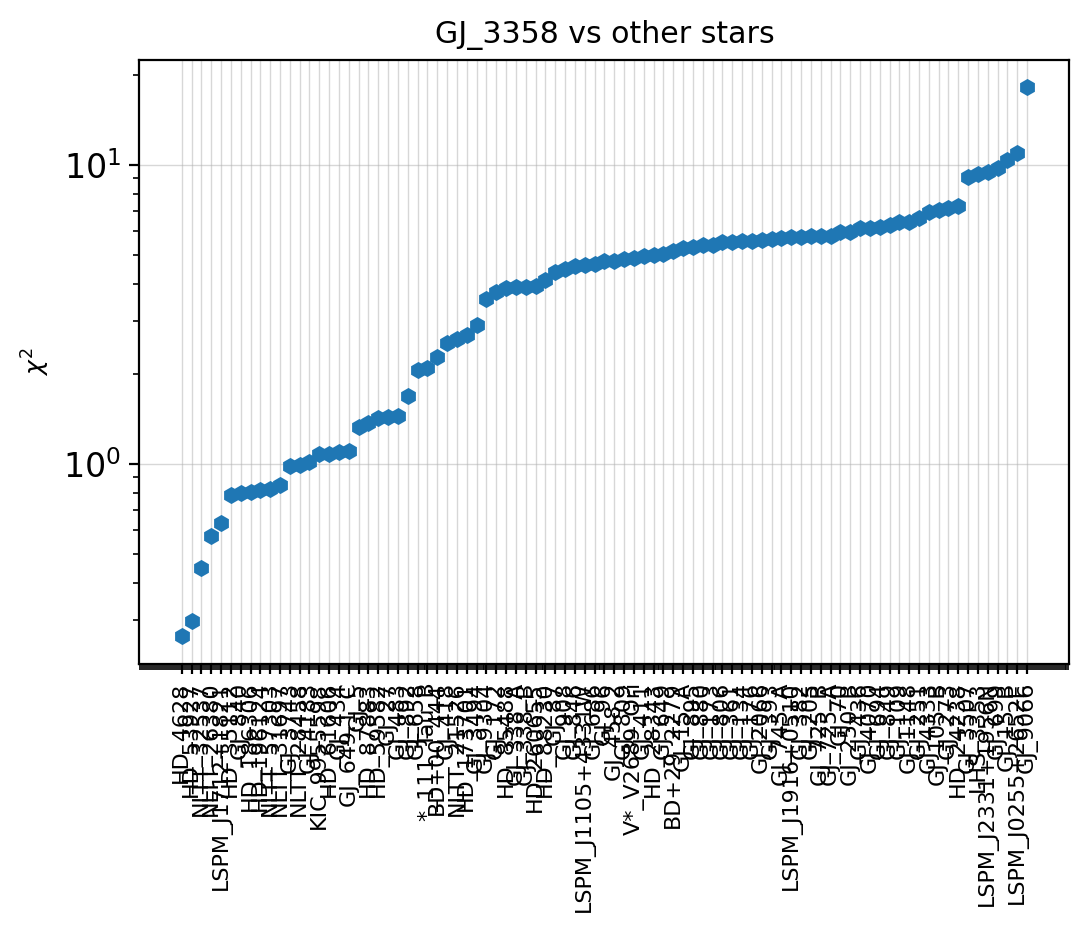

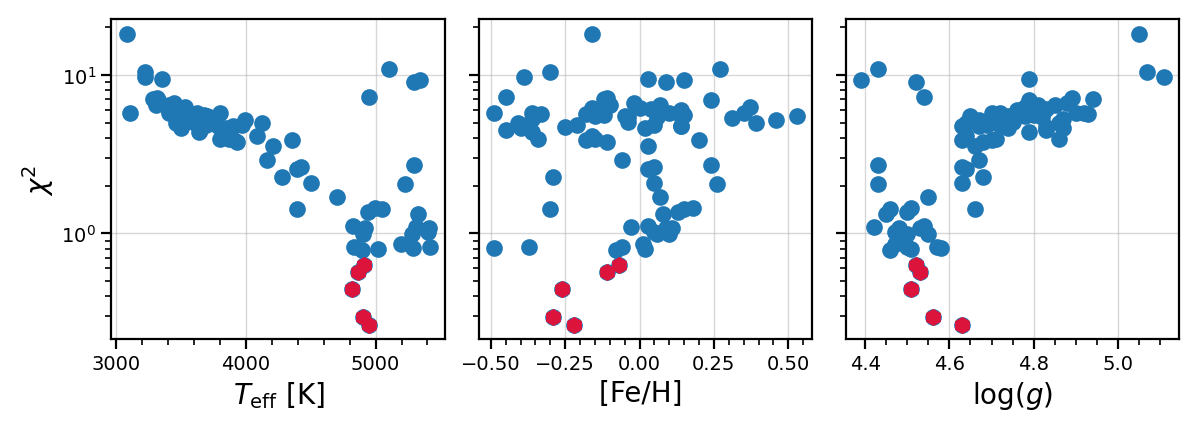

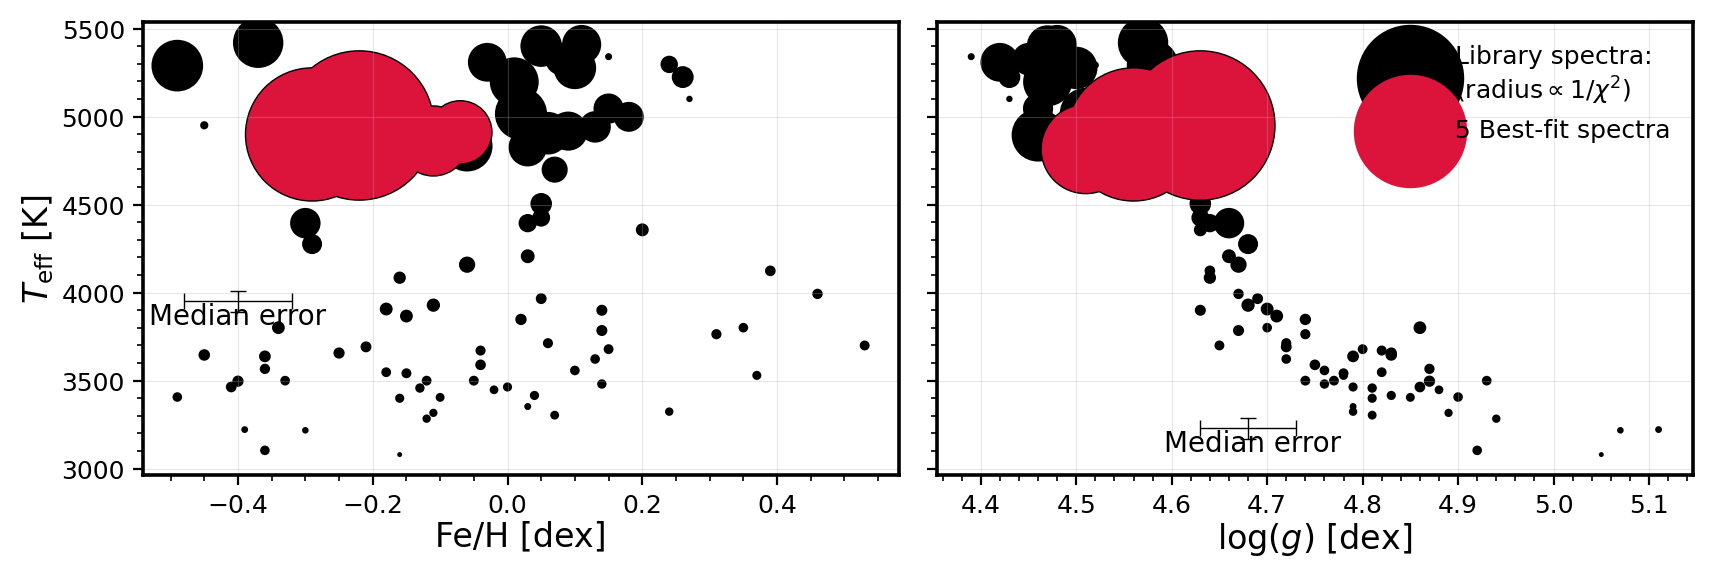

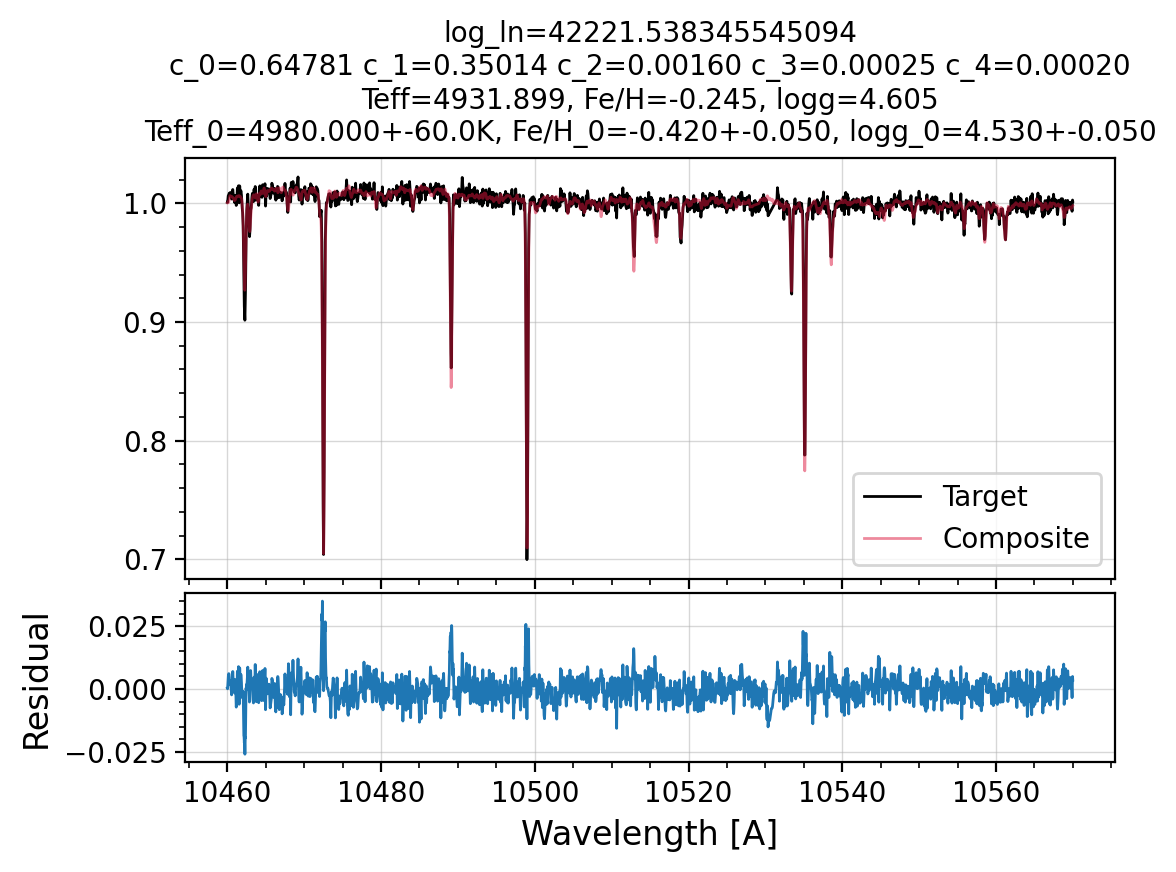

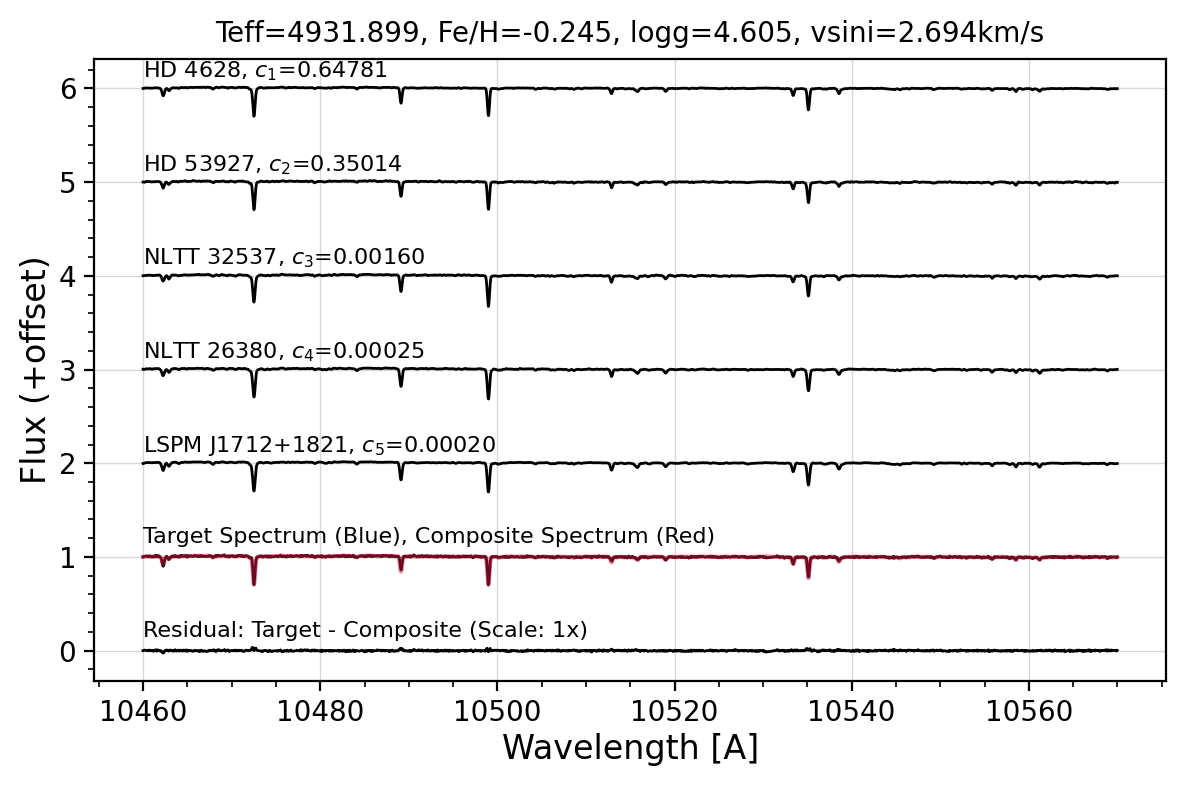

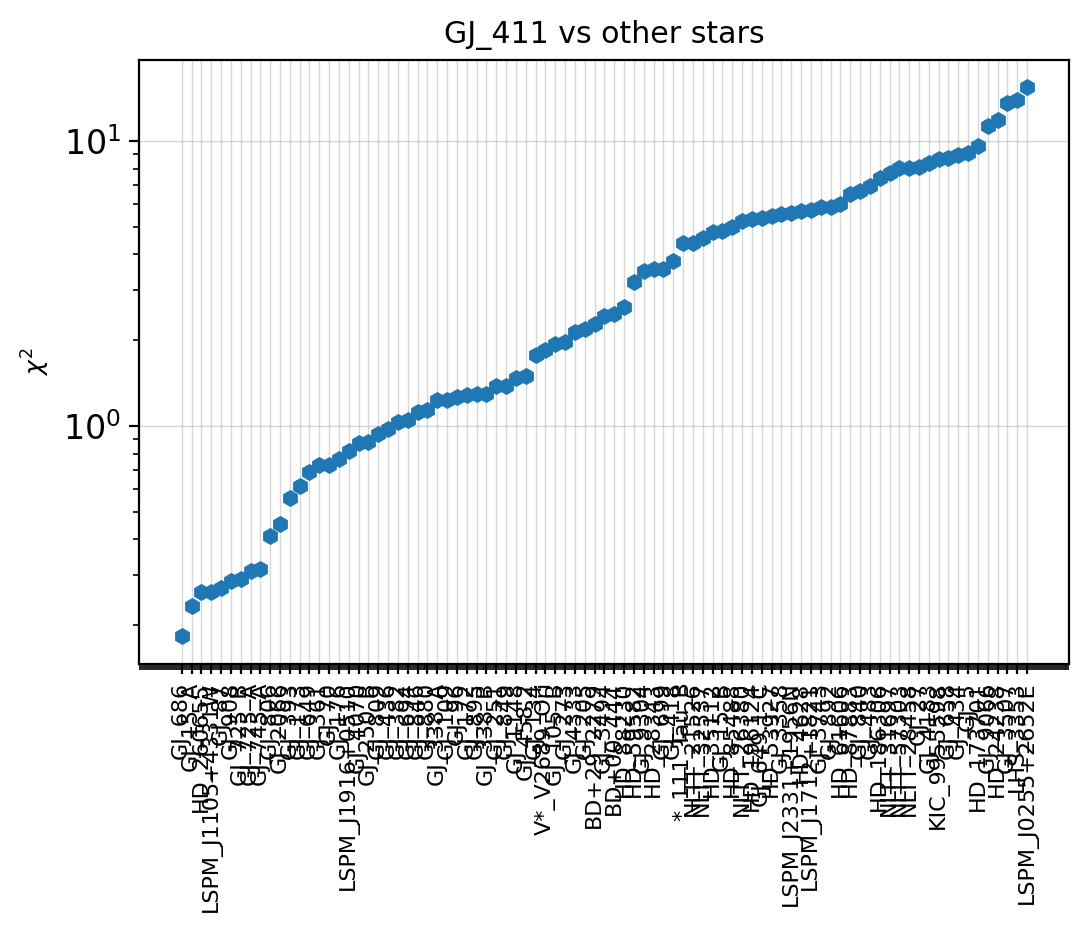

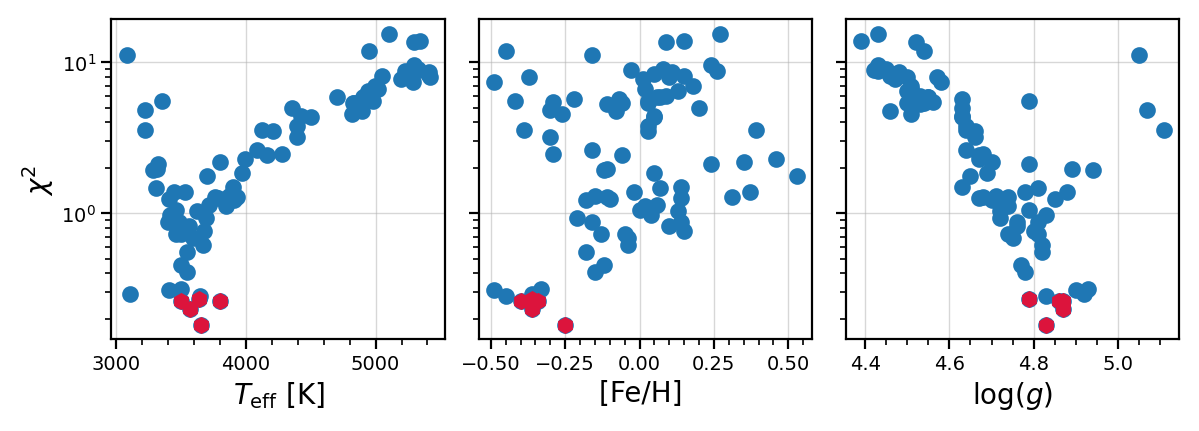

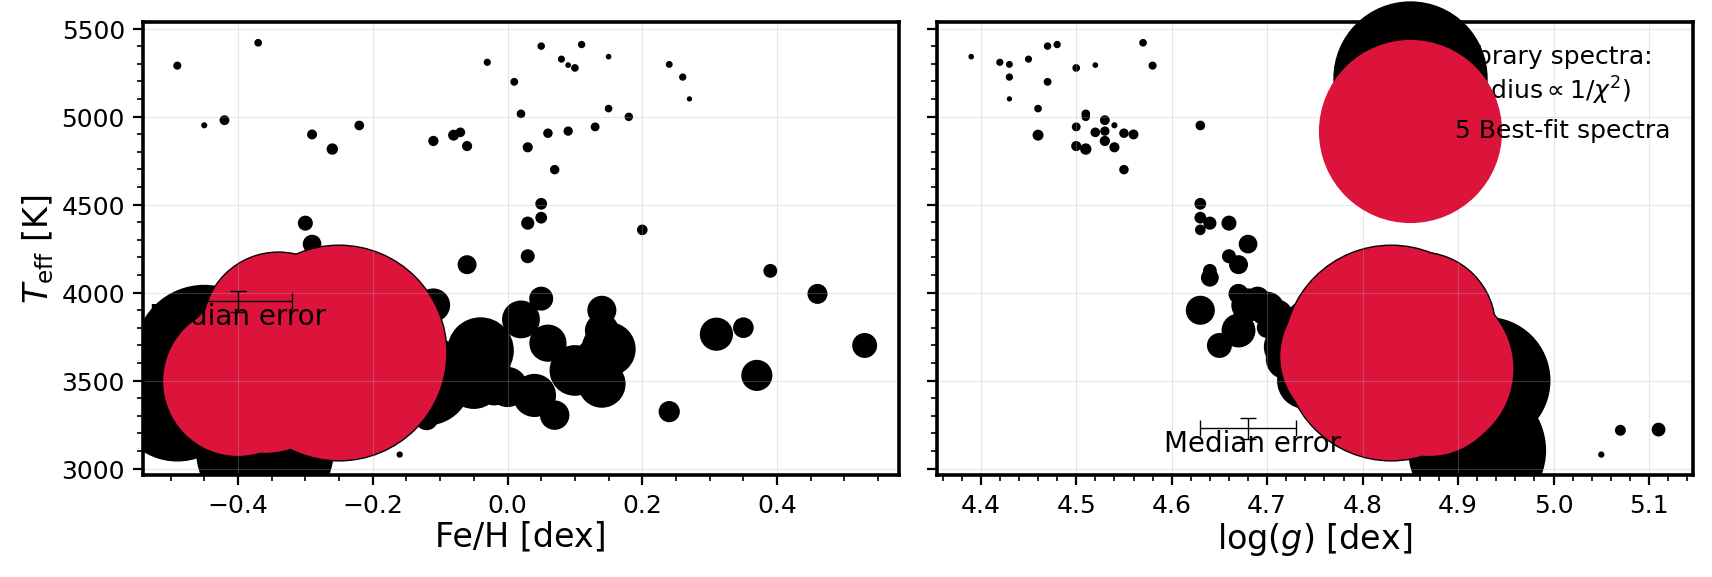

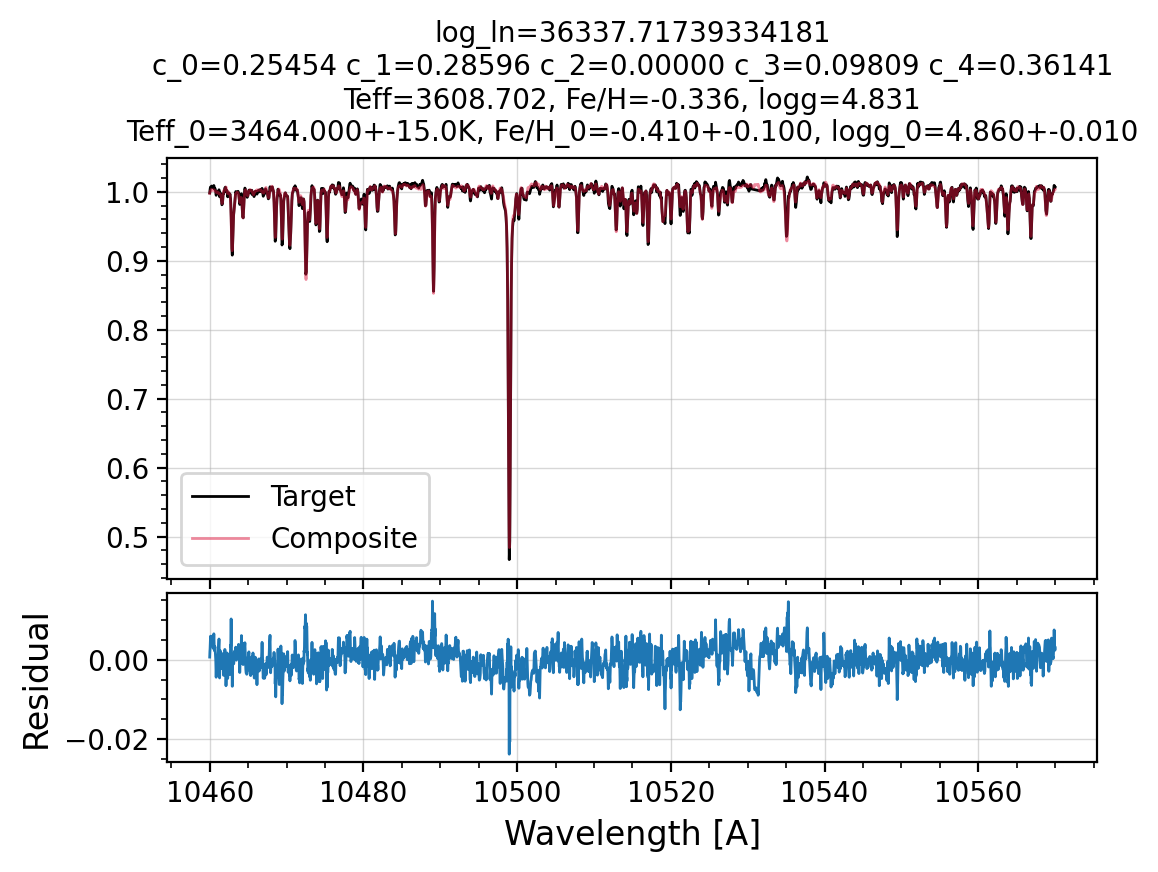

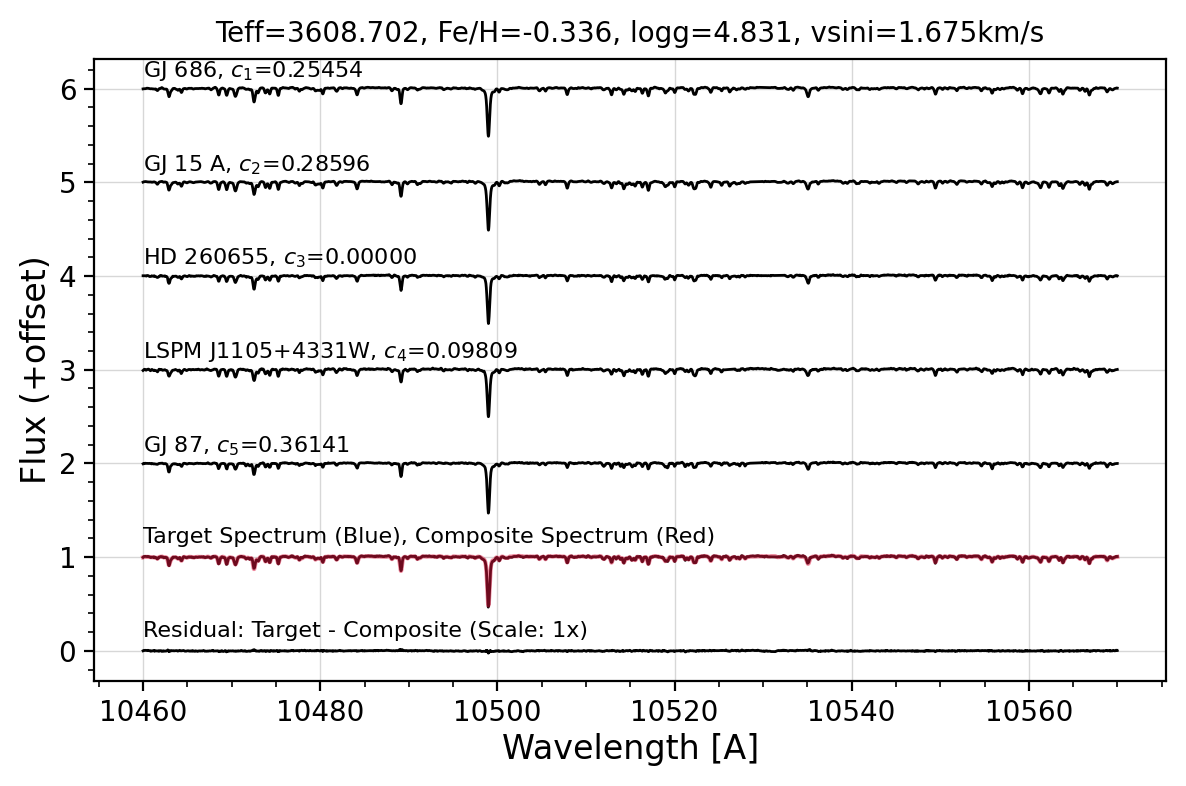

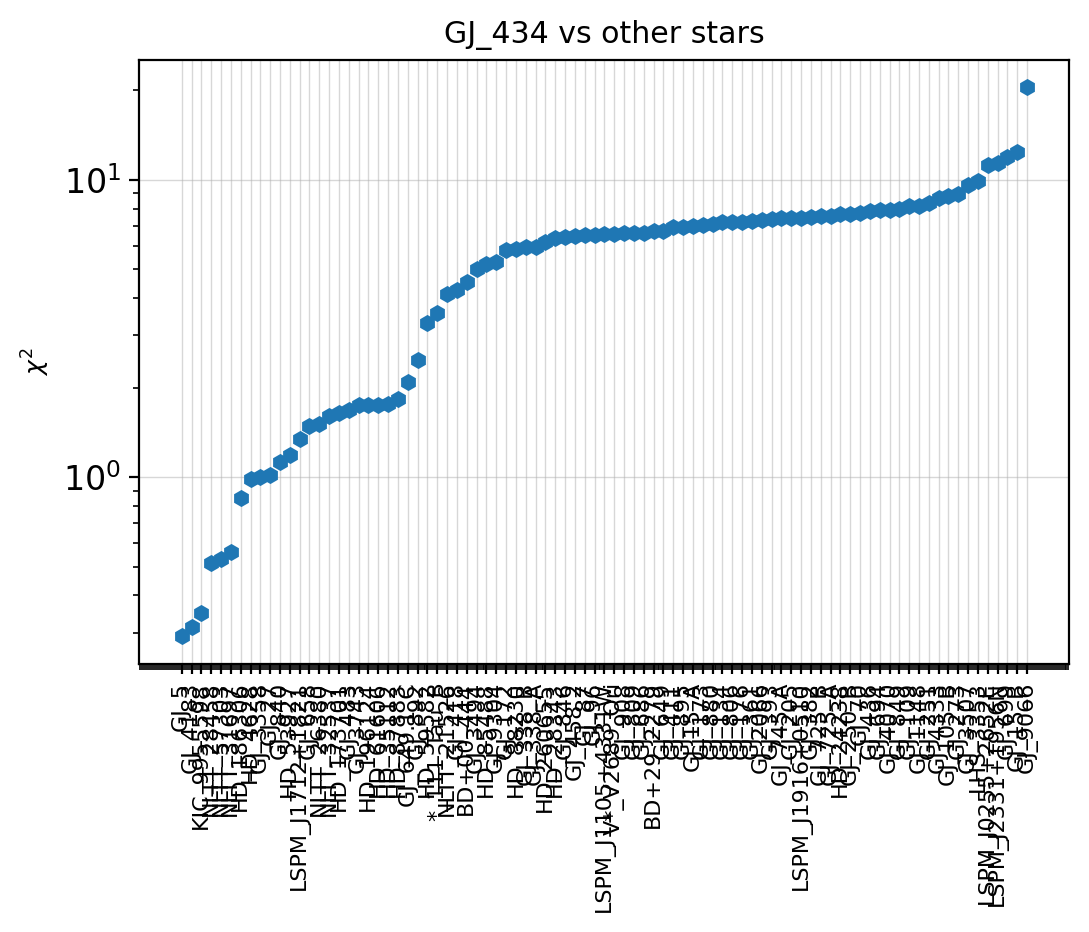

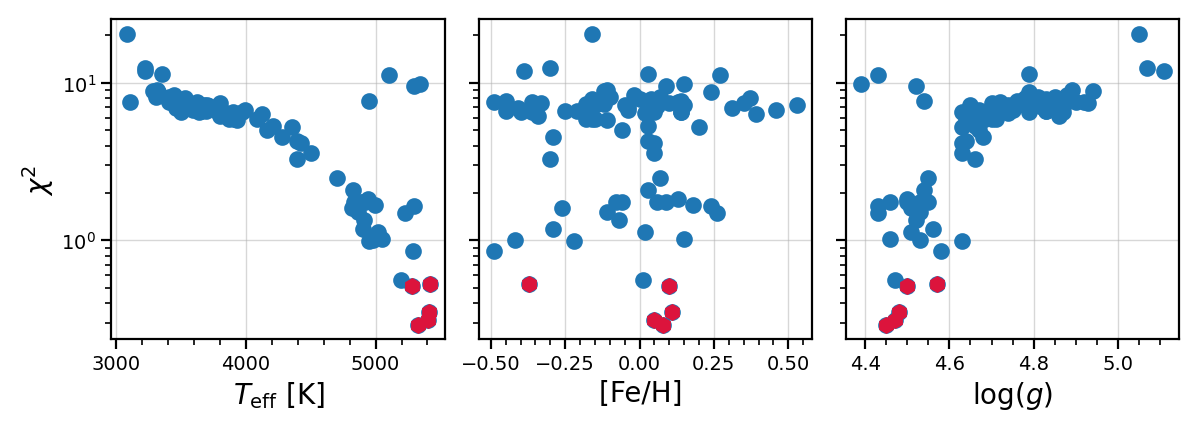

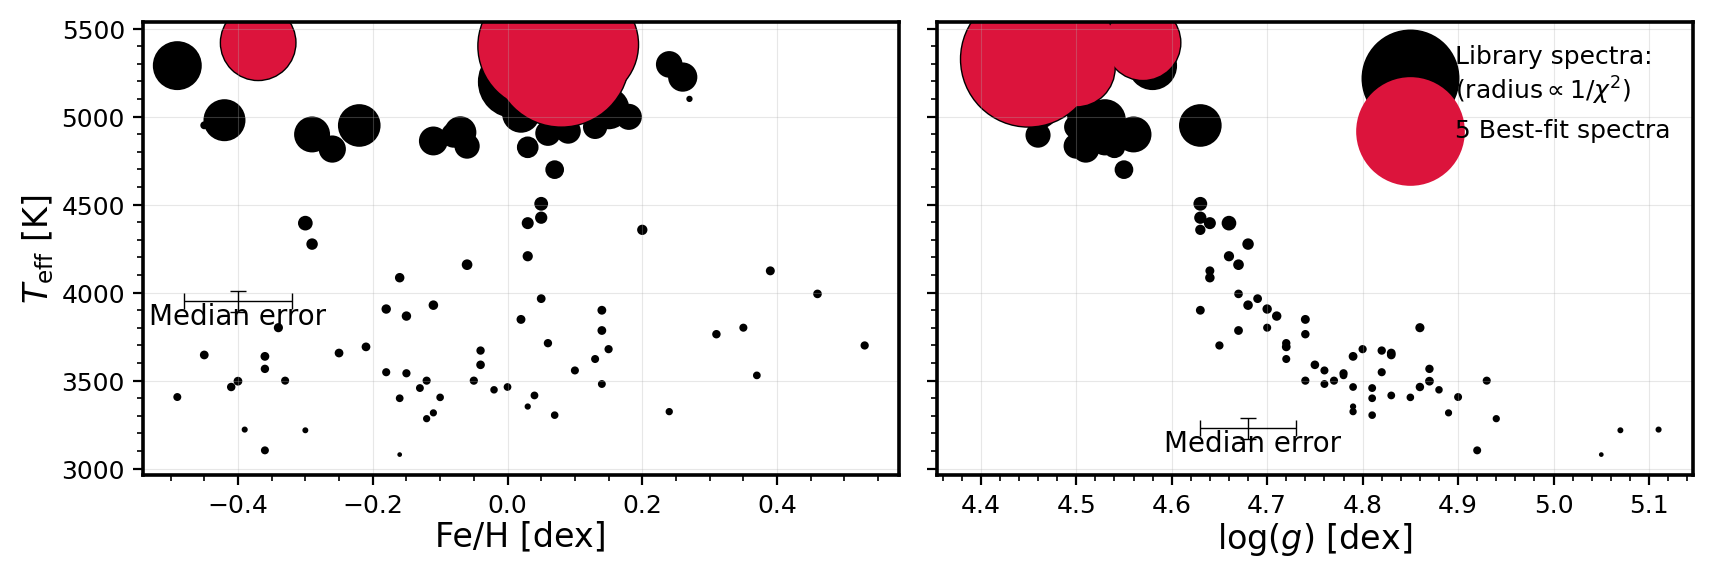

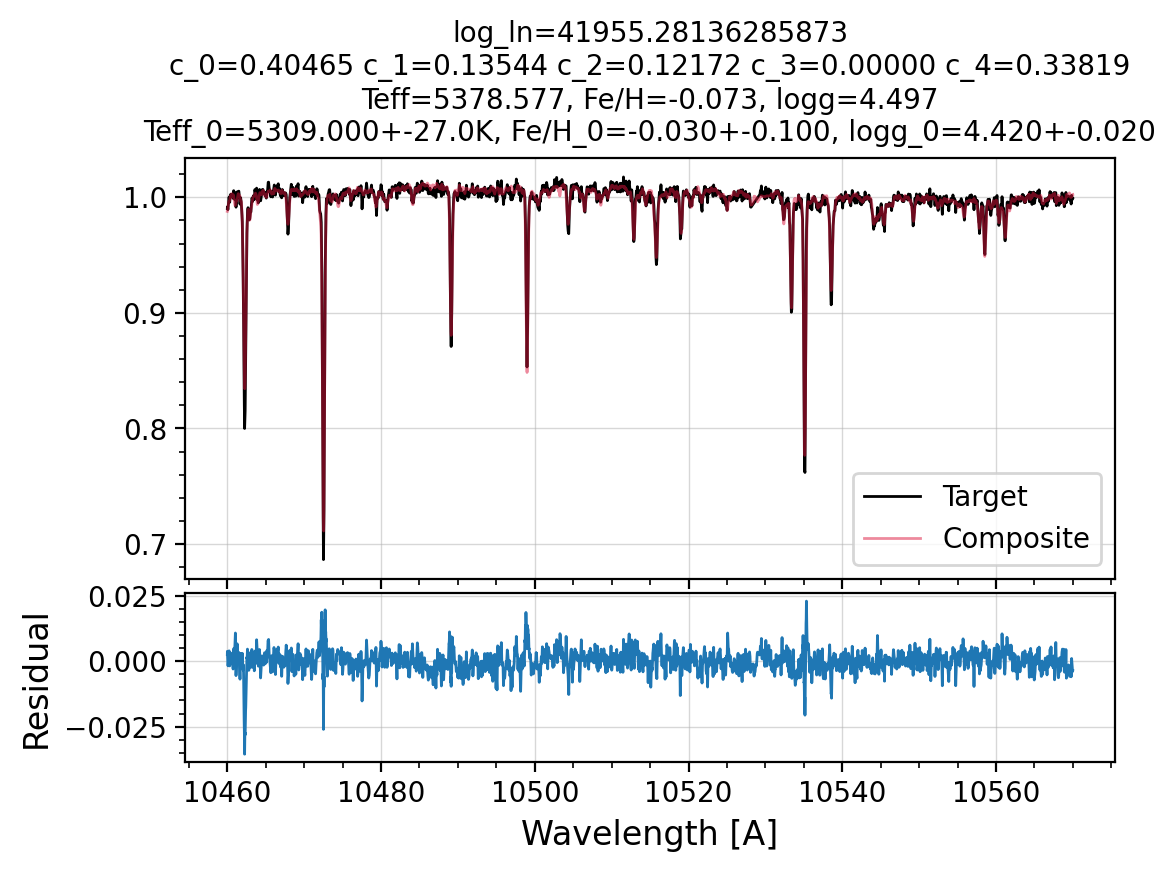

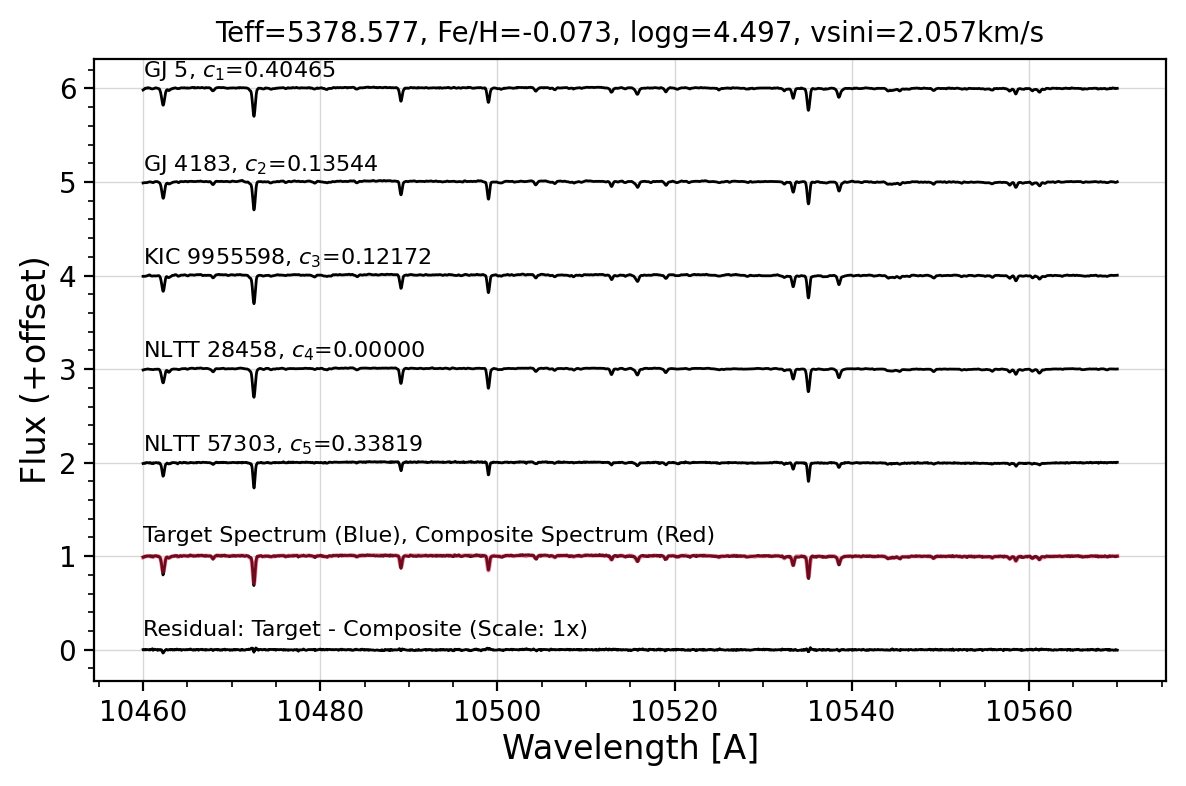

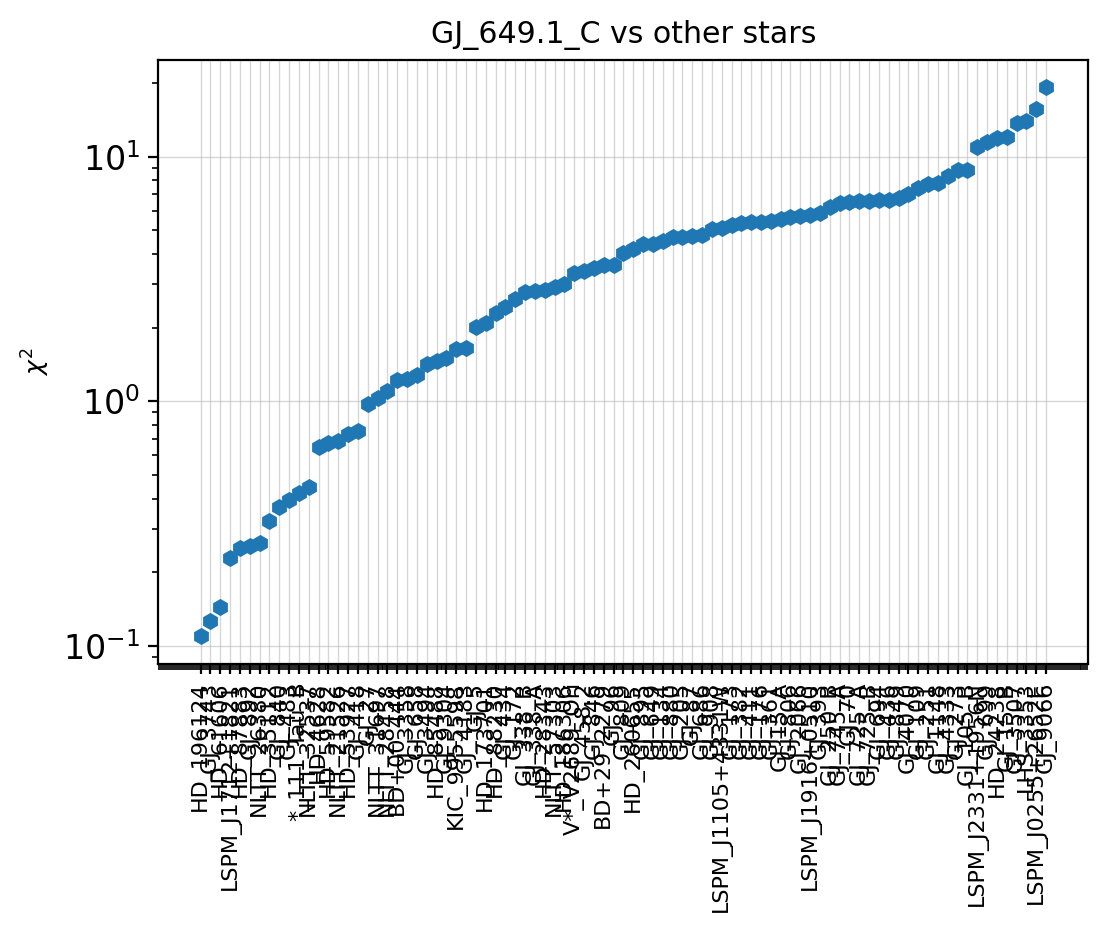

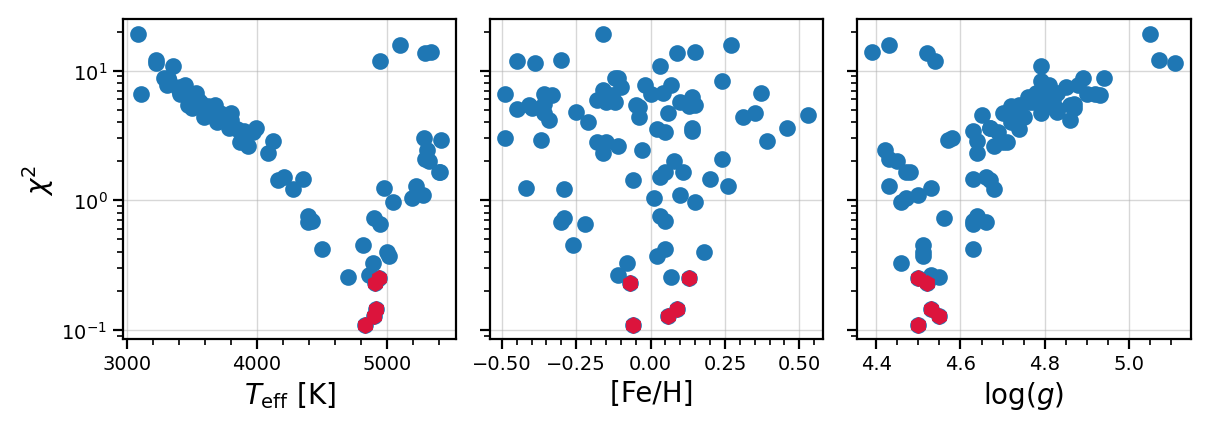

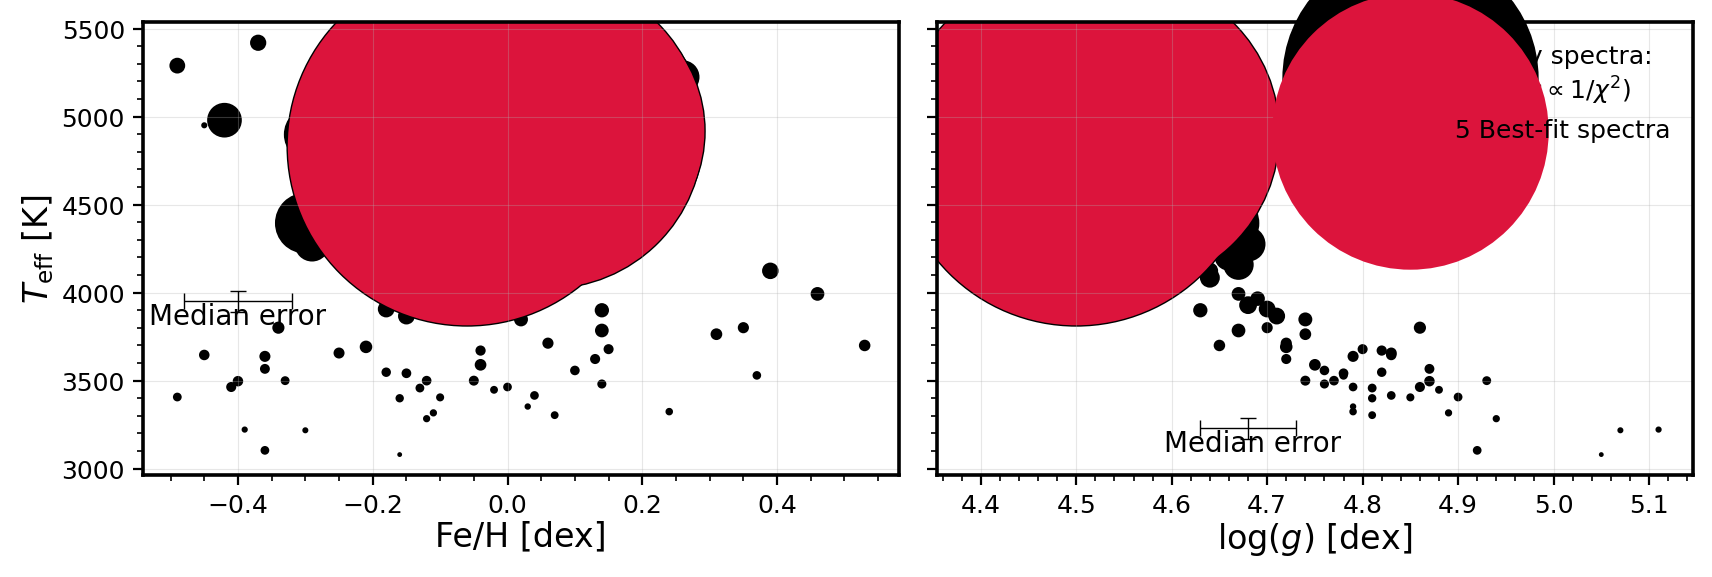

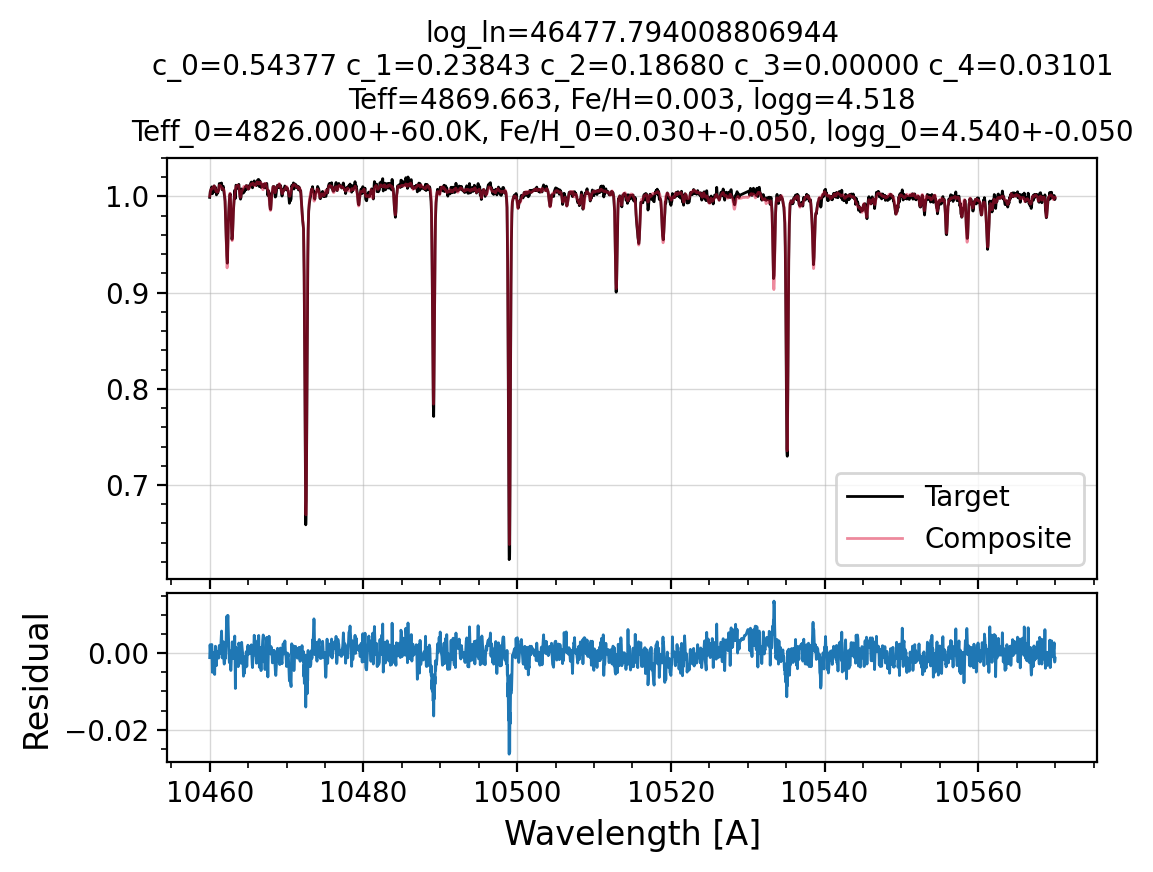

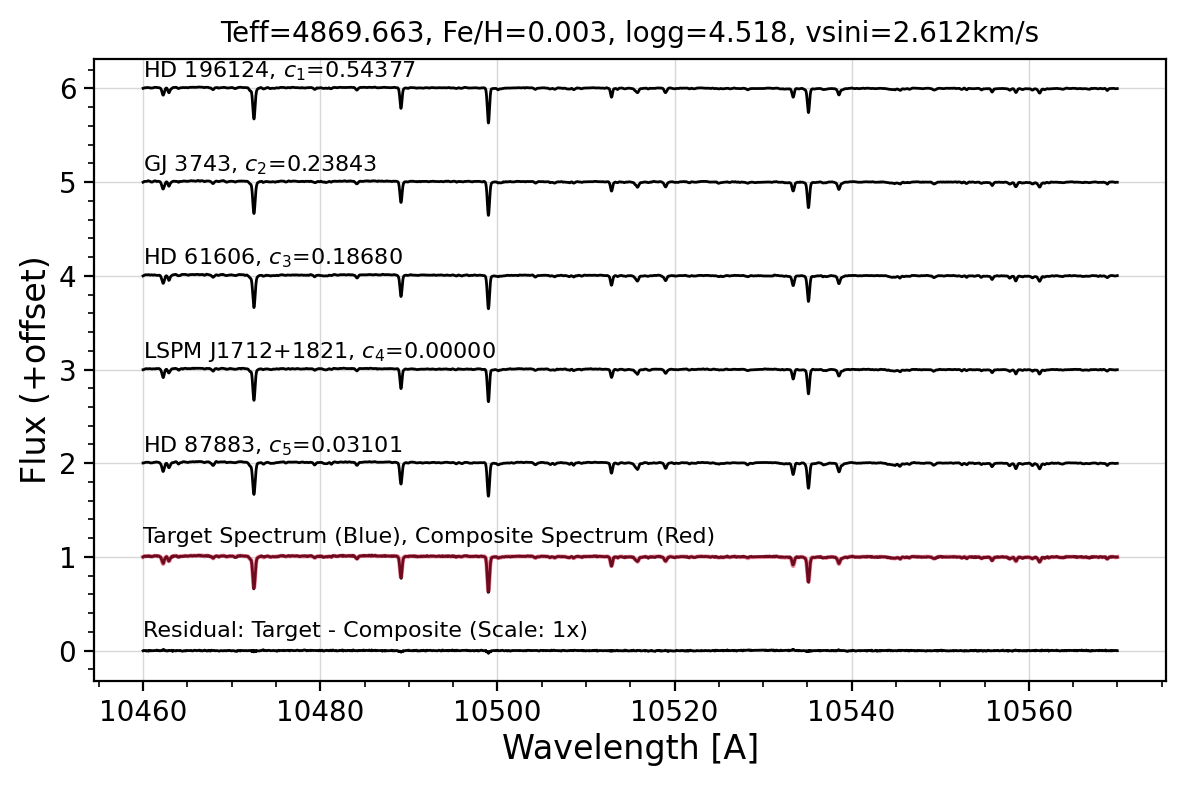

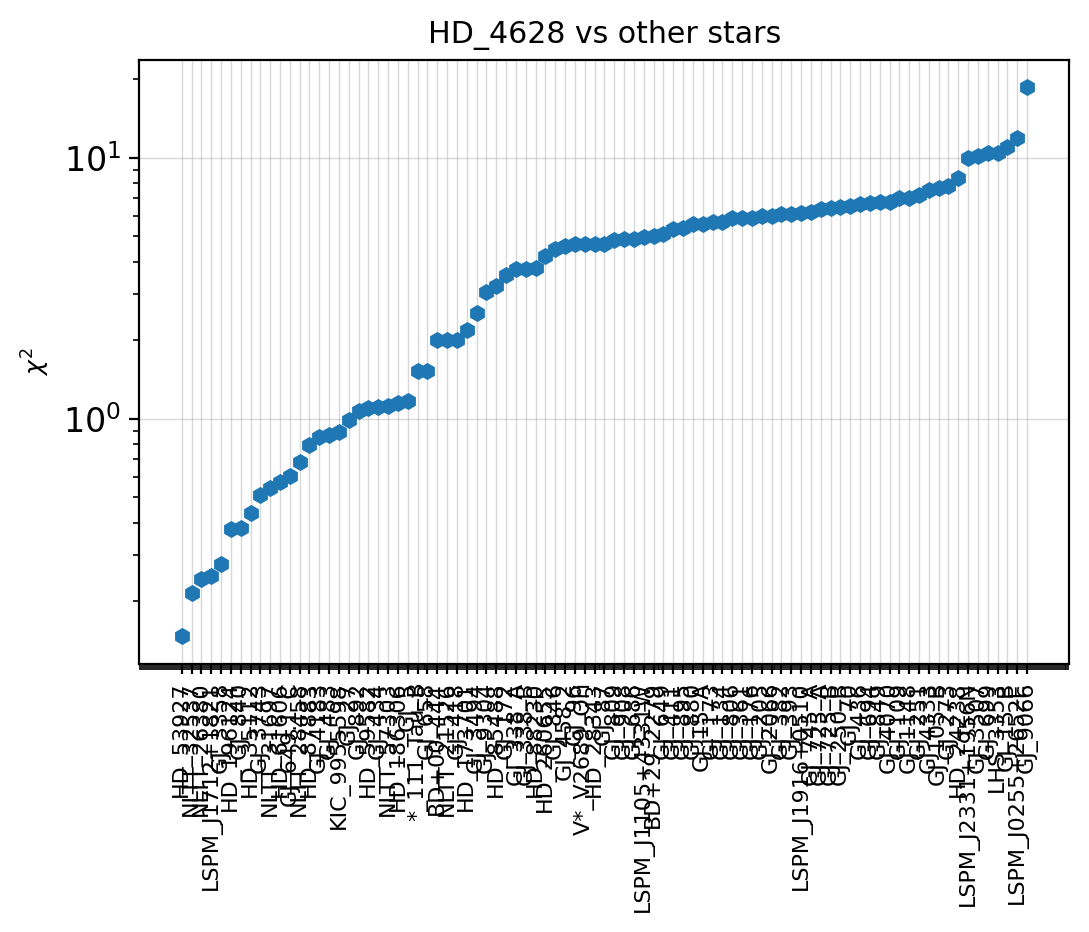

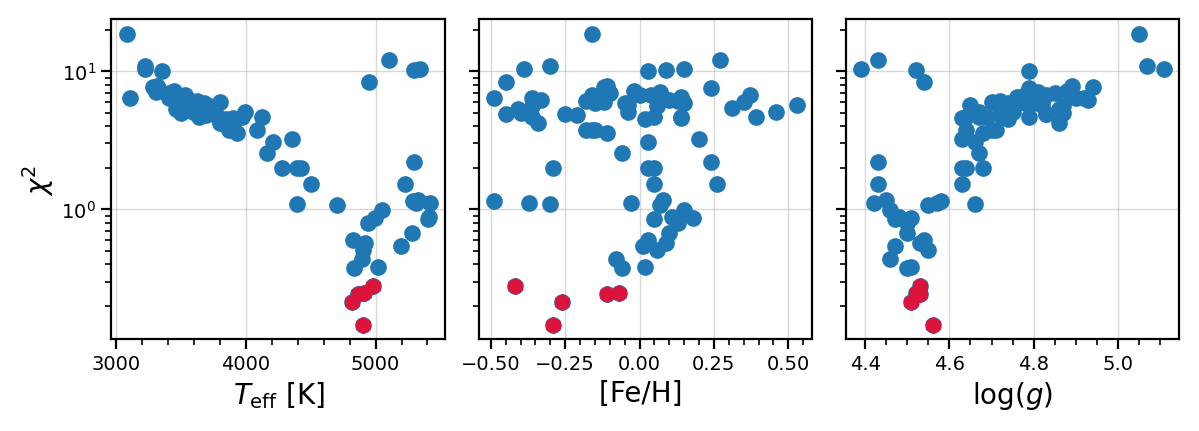

Error in callback <function flush_figures at 0x7fb380854d90> (for post_execute):


KeyboardInterrupt: 

In [31]:
wmin = hpfspecmatch.BOUNDS['17'][0]
wmax = hpfspecmatch.BOUNDS['17'][1]
ww = np.arange(wmin,wmax,0.01)
v = np.linspace(-125,125,1501)
res = []
for i in range(len(df_comb)):
    print(i)
    # Target data
    Htarget = HLS.splist[i]
    df_target = df_comb[df_comb['OBJECT_ID'] == Htarget.object]
    # Reference data
    Hrefs   = np.delete(np.array(HLS.splist),i)
    _res = hpfspecmatch.run_specmatch(Htarget,Hrefs,ww,v,df_comb,df_target,plot=True,
                         savefolder='../library/20201008_specmatch_nir/crossval/o17_crossval/',)
    res.append(_res)

In [33]:
df_lib_compare = pd.DataFrame(res,columns=['teff','feh','logg','vsini','d_teff','d_feh','d_logg','_','__'])
df_lib_compare

teff       feh      logg      vsini      d_teff     d_feh  \
0   4931.898710 -0.244517  4.605251   2.693552  -48.101290  0.175483   
1   3608.702308 -0.335924  4.830906   1.675123  144.702308  0.074076   
2   5378.577016 -0.072596  4.496943   2.057041   69.577016 -0.042596   
3   4869.662934  0.002523  4.517525   2.612134   43.662934 -0.027477   
4   4918.438162 -0.249606  4.536144   2.414616  -31.561838 -0.029606   
5   5336.193441  0.055164  4.466445   3.972866    9.193441 -0.024836   
6   3318.249951 -0.005242  4.851383   1.767122   34.249951  0.114758   
7   3238.739314 -0.321656  5.074278  16.501307 -114.260686 -0.351656   
8   3894.784400 -0.144077  4.700202   2.232884  -34.215600 -0.034077   
9   5307.538796  0.054376  4.469715   1.685444  -93.461204  0.004376   
10  4315.350073  0.151755  4.635612   1.192221  -41.649927 -0.048245   
11  4170.812903 -0.059731  4.662674   2.434293   11.812903  0.000269   
12  3606.533707 -0.285077  4.831274   1.349502  -50.466293 -0.035077   
13  5292.790069  0.089640  4.519970   0.040012  191.790069 -0.180360   
14  4887.371577  0.036402  4.522533   2.173142  -18.628423 -0.023598   
15  3351.225074 -0.006174  4.881810   0.845430   34.225074  0.103826   
16  3452.586161  0.092856  4.805527   1.326162  -11.413839  0.092856   
17  5294.291500 -0.325048  4.522436   2.969301 -125.708500  0.044952   
18  5303.643289  0.037504  4.468336   2.020782 -106.356711 -0.072496   
19  3774.319235  0.511183  4.655293   1.142584  -26.680765  0.161183   
20  3909.341791  0.317649  4.660730   1.752885  -83.658209 -0.142351   
21  3562.476222 -0.002452  4.764887   1.430056   62.476222  0.047548   
22  3679.520350 -0.029357  4.742883   2.229512   89.520350  0.010643   
23  3801.260349  0.307505  4.706478   1.157493  101.260349 -0.222495   
24  3882.207000 -0.059896  4.693067   1.392013  -24.793000  0.120104   
25  3675.769272  0.171627  4.698175   1.651659  -37.230728  0.111627   

      d_logg                                                  _  \
0   0.075251      index         OBJECT_ID       chi2  \
0   ...   
1  -0.029094      index         OBJECT_ID       chi2  \
0   ...   
2   0.076943      index         OBJECT_ID       chi2  \
0   ...   
3  -0.022475      index         OBJECT_ID       chi2  \
0   ...   
4  -0.093856      index         OBJECT_ID       chi2  \
0   ...   
5   0.016445      index         OBJECT_ID       chi2  \
0   ...   
6  -0.088617      index         OBJECT_ID       chi2  \
0   ...   
7   0.284278      index         OBJECT_ID       chi2  \
0   ...   
8   0.020202      index         OBJECT_ID       chi2  \
0   ...   
9  -0.000285      index         OBJECT_ID       chi2  \
0   ...   
10  0.005612      index         OBJECT_ID       chi2  \
0   ...   
11 -0.007326      index         OBJECT_ID       chi2  \
0   ...   
12  0.001274      index         OBJECT_ID       chi2  \
0   ...   
13  0.089970      index         OBJECT_ID       chi2  \
0   ...   
14 -0.027467      index         OBJECT_ID       chi2  \
0   ...   
15 -0.008190      index         OBJECT_ID       chi2  \
0   ...   
16  0.015527      index         OBJECT_ID       chi2  \
0   ...   
17 -0.047564      index         OBJECT_ID       chi2  \
0   ...   
18 -0.011664      index         OBJECT_ID       chi2  \
0   ...   
19 -0.044707      index         OBJECT_ID       chi2  \
0   ...   
20 -0.009270      index         OBJECT_ID       chi2  \
0   ...   
21  0.024887      index         OBJECT_ID       chi2  \
0   ...   
22 -0.007117      index         OBJECT_ID       chi2  \
0   ...   
23  0.056478      index         OBJECT_ID       chi2  \
0   ...   
24 -0.006933      index         OBJECT_ID       chi2  \
0   ...   
25 -0.021825      index         OBJECT_ID       chi2  \
0   ...   

                                                   __  
0   <hpfspecmatch.hpfspecmatch.hpfspecmatch.FitLin...  
1   <hpfspecmatch.hpfspecmatch.hpfspecmatch.FitLin...  
2   <hpfspecmatch.hpfspecmatch.hpfspecmatch.FitLin...  
3   <hpfspecmatch.hpfspecmatch.h

std=77.69K
std=0.12dex
std=0.07dex


Text(0.5, 1.0, 'Library Performance (HPF Order 17)')

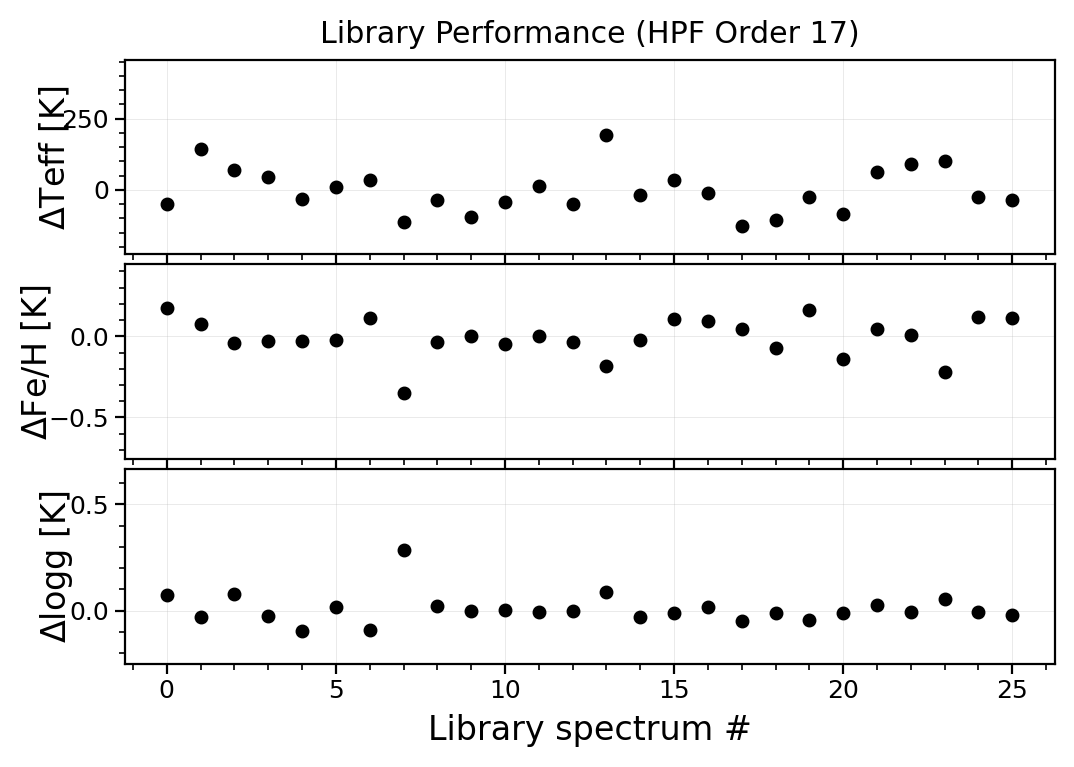

In [37]:
import matplotlib.pyplot as plt
import astropylib.gkastro

df_lib_compare = pd.DataFrame(res,columns=['teff','feh','logg','vsini','d_teff','d_feh','d_logg','_','__'])
fig, (ax,bx,cx) = plt.subplots(nrows=3,sharex=True,dpi=200)
x =range(len(df_lib_compare))
label = 'std={:0.2f}K'.format(np.std(df_lib_compare.d_teff))
print(label)
ax.plot(df_lib_compare.d_teff,'k.',markersize=8)
ax.set_ylim(ax.get_ylim()[0]*1.6,ax.get_ylim()[1]*2.2)

label = 'std={:0.2f}dex'.format(np.std(df_lib_compare.d_feh))
print(label)
bx.plot(df_lib_compare.d_feh,'k.',markersize=8)
bx.set_ylim(bx.get_ylim()[0]*2.0,bx.get_ylim()[1]*2.2)

label = 'std={:0.2f}dex'.format(np.std(df_lib_compare.d_logg))
print(label)
cx.plot(df_lib_compare.d_logg,'k.',markersize=8)
cx.set_ylim(cx.get_ylim()[0]*2.2,cx.get_ylim()[1]*2.2)

for xx in (ax,bx,cx):
    astropylib.gkastro.ax_apply_settings(xx)
    xx.tick_params(labelsize=9,pad=2)
    xx.grid(lw=0.3)
    #xx.legend(bbox_to_anchor=(1.,1.),fontsize=12)
fig.subplots_adjust(hspace=0.05)
ax.set_ylabel('$\Delta$Teff [K]',fontsize=12,labelpad=-4)
bx.set_ylabel('$\Delta$Fe/H [K]',fontsize=12,labelpad=-2)
cx.set_ylabel('$\Delta$logg [K]',fontsize=12,labelpad=-2)
cx.set_xlabel('Library spectrum #',fontsize=12)
ax.set_title('Library Performance (HPF Order 17)')

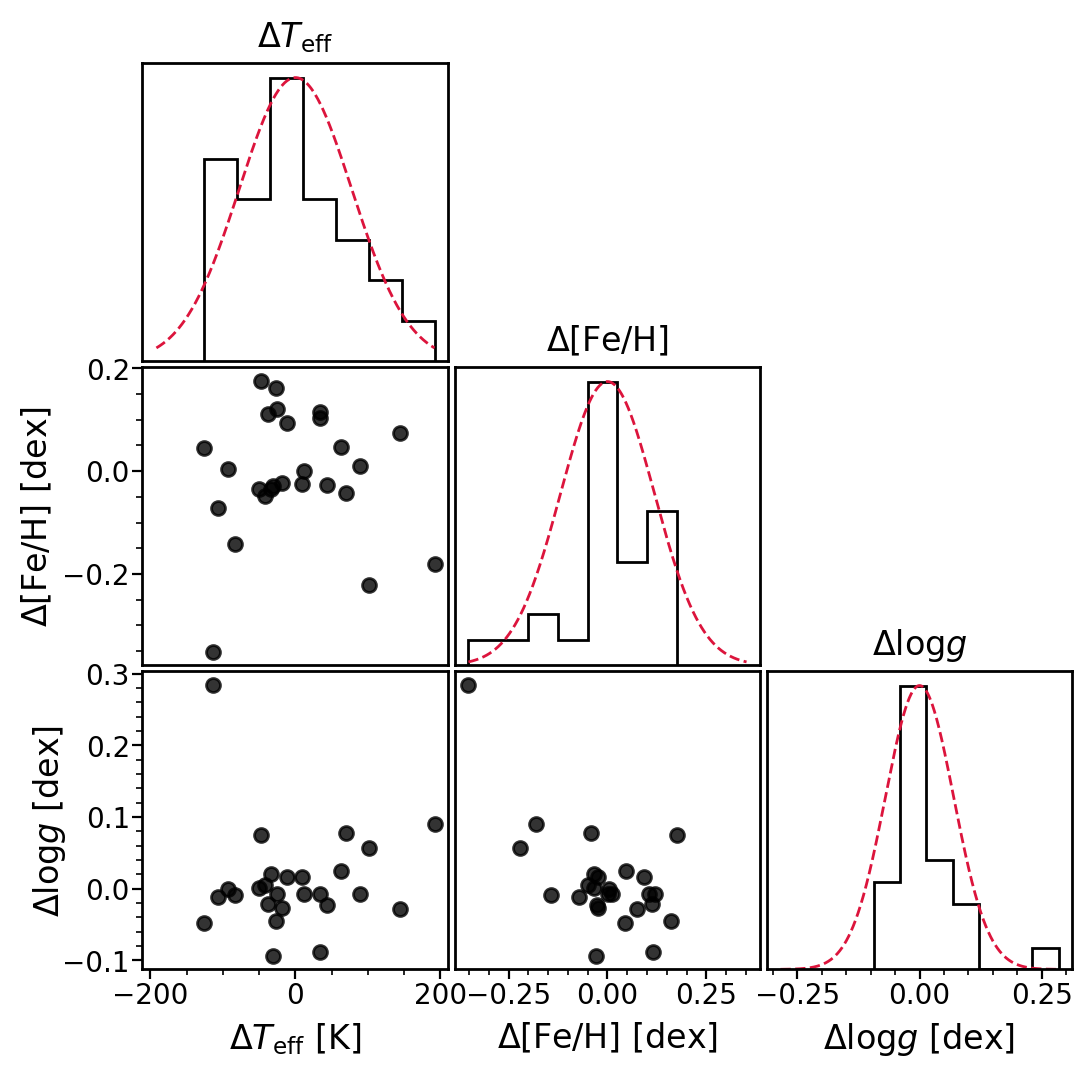

In [38]:
import astropy.modeling
dd = df_lib_compare[["d_teff","d_feh","d_logg"]]
fig, axx = plt.subplots(nrows=3,ncols=3,dpi=200,figsize=(6,6))

for xx in [axx[0,1],axx[0,2],axx[1,2]]:
    xx.axes.set_axis_off()
    
labels = ["$\Delta T_{\mathrm{eff}}$","$\Delta$[Fe/H]","$\Delta \log g$"]
xlabels = ["$\Delta T_{\mathrm{eff}}$ [K]","$\Delta$[Fe/H] [dex]","$\Delta \log g$ [dex]"]

#xlims = [xx.get_xlim() for xx in [axx[1,0],axx[2,0],axx[2,1]]]
xlims = []
diag = [axx[0,0],axx[1,1],axx[2,2]]
for i,xx in enumerate(diag):
    xx.set_title(labels[i],fontsize=12)
    _y, _x,_ = xx.hist(dd.iloc[:,i].values,color="black",histtype="step",bins=7,
                       range=[dd.iloc[:,i].values.min(),dd.iloc[:,i].values.max()])
    g = astropy.modeling.models.Gaussian1D(stddev=np.std(dd.iloc[:,i].values))
    xmax = np.max(np.abs(dd.iloc[:,i].values))
    x = np.linspace(-xmax,xmax,1000)
    y = (g(x)/(np.max(g(x))))*(np.max(_y))
    #print(np.max(y))
    xx.plot(x,y,color="crimson",lw=1,ls="--")
    #s = np.random.normal(0.,np.std(dd.iloc[:,i].values,),10000)
    #xx.hist(s,histtype="bar",normed=True,facecolor=cp[0],alpha=0.5,bins=100)
    if i == 0: 
        xx.xaxis.set_visible(False)
        xx.yaxis.set_visible(False)    
        #xx.set_xlim(xlims[0][0],xlims[0][1])
    if i == 1: 
        xx.xaxis.set_visible(False)
        xx.yaxis.set_visible(False)
        #xx.set_xlim(xlims[2][0],xlims[2][1])
    if i == 2: 
        xx.yaxis.set_visible(False)
    xlims.append(xx.get_xlim())

axx[1,0].plot(df_lib_compare.d_teff.values,df_lib_compare.d_feh.values,marker="o",lw=0,color="k",alpha=0.8)
axx[1,0].set_xlim(xlims[0][0],xlims[0][1])
axx[2,0].plot(df_lib_compare.d_teff.values,df_lib_compare.d_logg.values,marker="o",lw=0,color="k",alpha=0.8)
axx[2,0].set_xlim(xlims[0][0],xlims[0][1])
axx[2,1].plot(df_lib_compare.d_feh.values,df_lib_compare.d_logg.values,marker="o",lw=0,color="k",alpha=0.8)
axx[2,1].set_xlim(xlims[1][0],xlims[1][1])

axx[2,1].yaxis.set_visible(False)
axx[1,0].xaxis.set_visible(False)

axx[1,0].set_ylabel(xlabels[1],fontsize=12,labelpad=3)
axx[2,0].set_ylabel(xlabels[2],fontsize=12,labelpad=-2)
axx[2,0].set_xlabel(xlabels[0],fontsize=12)
axx[2,1].set_xlabel(xlabels[1],fontsize=12)
axx[2,2].set_xlabel(xlabels[2],fontsize=12)

#astropylib.gkastro.ax_axes_off()
for xx in axx.flatten():
    astropylib.gkastro.ax_apply_settings(xx,ticksize=10)
    xx.grid(lw=0)
    astropylib.gkastro.ax_set_linewidth(xx,1)
    xx.tick_params(pad=1)
    
fig.subplots_adjust(wspace=0.02,hspace=0.02)

In [39]:
np.std(df_lib_compare.d_teff.values)

77.69398023466658

In [40]:
np.std(df_lib_compare.d_logg)

0.06988338144021532

In [41]:
np.std(df_lib_compare.d_feh)

0.11857054099383246